# Métodos numéricos para Shallow Water Equations 2D e aplicações em dinâmica atmosférica

---

**Como entregar:** Enviar o seu jupyter notebook (.ipynb) pelo próprio Classroom.


**Leia com atenção:**


*   Os exercícios que valem nota estão todos marcados uma exclamação❗.
*   Atividades marcadas com 🧩 são opcionais.
*   Use o Google Colab para executar o notebook e fazer a tarefa, ou baixe no seu computador e faça na API que preferir, mas lembre-se de entregar no Classroom a versão final.
*   Há questões dissertativas e questões computacionais! Responda com códigos e texto, nos campos indicados.
*   Entregue o notebook completo, com todo conteúdo original e mais os seus códigos e textos.
*   ❗Exercício 00:❗ Para mostrar que você leu até aqui, escreva seu nome completo (assinatura) na linha a seguir:




*Assinatura:*



---



## Preliminares



---





Parte teórica:
- Vallis, Geoffrey K. Atmospheric and oceanic fluid dynamics. Cambridge University Press, 2017.
- Durran, Dale R. Numerical methods for fluid dynamics: With applications to geophysics. Vol. 32. Springer Science & Business Media, 2010.
- Isla Simpson. Lecture Notes on Atmospheric Dynamics, 2010. https://staff.cgd.ucar.edu/islas/teaching/PHY2504HS.html (https://staff.cgd.ucar.edu/islas/teaching/4_Shallow_water.pdf)
- Dave Randall. Lecture Notes 2006. https://hogback.atmos.colostate.edu/group/dave/pdf/ShallowWater.pdf

Parte aplicada/numérica:
- Sadourny, Robert. "The dynamics of finite-difference models of the shallow-water equations." Journal of Atmospheric Sciences 32, no. 4 (1975): 680-689.
- Randall, David A. "Geostrophic adjustment and the finite-difference shallow-water equations." Monthly Weather Review 122, no. 6 (1994): 1371-1377.




---



## Introdução e Motivação

A dinâmica horizontal da atmosfera, sob certas hipóteses, pode ser expressa por equações muito mais simples que as 3D, constituindo as chamadas equações de águas rasas (Shallow Water Equations). Geralmente, os núcleos dinâmicos de modelos completos começam a partir desse tipo de equações, ou mais ainda, são formados por diversas camadas de águas rasas. Essas equações também são um protótipo ideal para testar métodos numéricos.

Nesta aula vamos trabalhar com uma versão 2D dessas equações, no plano, mas em breve as veremos na esfera...




---



## Equações da Dinâmica


Para as equações primitivas, assumimos que a atmosfera/oceano está em equilibrio hidrostático, isto é, a pressão atmosférica ($p$) está em balanço de forças com a gravidade ($g$). Na prática, isso implica que
$$
\frac{\partial p}{\partial z}=-\rho g,  \,\text{ (Hydrostatic)}
$$
onde $ρ$ é a desnidade do ar, $g$ é aceleração da gravidade e $z$ a coordenada vertical (no sentido radial em relação à esfera). Com isso, a advecção/aceleração de velocidade vertical dos ventos é desprezada.

A velocidade horizontal dos ventos (para $\mathbf{u}=(u,v,0)$) é regida pela equação do momento
$$
 \frac{D \mathbf{u}}{Dt}+ \boldsymbol{ f } \times \mathbf{u} = - \frac{1}{\rho} \nabla_H p  \,\text{ (Momentum)}
 $$
 onde
* $\mathbf{u}=(u,v,0)$: velocidade dos ventos horizontais
* $D/Dt=\partial/\partial t + \mathbf{u}\cdot \nabla $: derivada material/total
*  $
\nabla_{H}  =(\partial_x , \partial_y, 0 )
$ : Gradiente horizontal
* $\mathbf{f} = f \mathbf{k}$: Termo de Coriolis (leva em conta a rotação da Terra, e está direcionado radialmente), onde $f=2\Omega \sin \theta $, com $\Omega$ sendo a velocidade angular de rotação da Terra e $\theta$ a latitude.
* $\mathbf{k}\times\mathbf{v}$ : Produto cruzado entre $\mathbf{k}$ e $\mathbf{v}$ (rotate $\mathbf{v}$ ccw 90 degrees).
* $\mathbf{k}\times (u,v)= (-v, u)$

Adicionalmente, temos uma equação de conservação de massa,
$$
 \frac{\partial \rho}{\partial t}   =  -\nabla \cdot (\rho \mathbf{v}) \,\text{ (Continuity)},
$$
onde
* $\mathbf{v}=(u,v,w)$: velocidade dos ventos em 3D
* $\nabla \cdot  =(\partial_x , \partial_y, \partial_y ) \cdot $ : Divergente total

Note que a densidade é essencialmente modelado no tempo a partir do divergente (convergência, neste caso) de fluxo.

Vamos omitir a parte termodinâmica das equações primitivas, por hora, mas elas serão importantes para o caso 3D.

## Shallow Water Equations

Relembramos brevemente algumas informações chaves das equações de águas rasas.

Assumimos que a desidade do ar é constante ($\rho=\rho_0$), e que o fluido tem uma altura $h$, com altura de referência altura $H$, constante, e $\eta$ a medida de altura livre, variável, conforme indicado na figura abaixo.

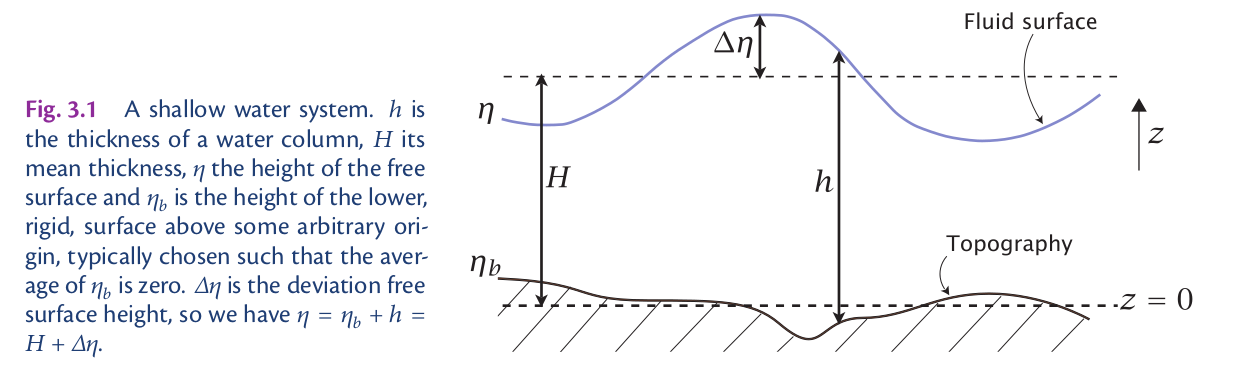


As equações de momento horizontal, em $(x,y)$, com ($\vec{v}=(u,v)$) são dadas por

$$ \frac{\partial \vec{v}}{\partial t} + \underbrace{(\vec{v}\cdot\nabla_H)\vec{v}}_{\text{nonlinear advection}} = \underbrace{-f \vec{k}\times \vec{v}}_{\text{Coriolis}}\,\,- \,\,\underbrace{g\nabla (h +\eta_b)}_{\text{Pressure}}, $$

onde usamos que a altura $\eta = h + \eta_b$, onde $h$ é a altura total do fluido (a ser encontrada) e $\eta_b$ a altura da topografia (conhecida) e
* $\nabla  =(\partial_x , \partial_y ) $ : Gradiente horizontal.

* $D/Dt=\partial/\partial t + \vec{v}\cdot \nabla $: derivada material/total

*  $f=2\Omega \sin \theta $, com $\Omega$ sendo a velocidade angular de rotação da Terra e $\theta$ a latitude. No plano, vamos assumir que $f$ é constante!! Escolhemos um $\theta$ de referência e nosso modelo imita localmente o que acontece em um plano tangente a esfera na região (aproximação de plano-f).
* $\vec{k}\times\vec{v}$ : Produto cruzado entre $\vec{k}$ e $\vec{v}$ (rotate $\vec{v}$ ccw 90 degrees).
* $\vec{k}\times (u,v)= (-v, u)$


A equação da continuidade (conservação de massa) é dada por
$$
\frac{\partial h }{\partial t} = - \nabla_H\cdot (h\vec{v}).
$$





---

### Forma Euleriana

> Equações de águas rasas (assumindo operadores sempre horizontais)
$$
\frac{\partial h }{\partial t} = - \nabla\cdot (h\vec{v}), \quad \text{(Continuidade)}
$$
$$ \frac{\partial \vec{v}}{\partial t} + (\vec{v}\cdot\nabla)\vec{v} = -f \vec{k}\times \vec{v}- g\nabla (h +\eta_b), \quad \text{(Momento)}$$






---



### Forma de Vetor Invariante

Split nonlinear advection ($\vec{v}=(u,v)$):

$$ (\vec{v}\cdot\nabla)\vec{v} = (\nabla \times \vec{v})\times \vec{v} + \frac{1}{2}\nabla \left( \vec{v}\cdot\vec{v}\right)  $$

Relative and absolute  vorticities:
$$\zeta = \vec{k}\cdot(\nabla\times\vec{v}) = (\partial_xv-\partial_yu), \quad\quad \omega_a = \zeta+f $$

Kinetic energy:
$$ K= \frac{1}{2} \left( \vec{v}\cdot\vec{v}\right) = \frac{1}{2}(u^2+v^2)$$

Bernoulli potential:
$$B=K+g(h+\eta_b)$$

> SWE na forma de Vetor Invariante:
$$ \frac{\partial \vec{v}}{\partial t} + \omega_a \vec{k}\times \vec{u} =-\nabla B$$



Explicitly include the potential vorticity:
$$q=\omega_a/h$$
into SWE:
> $$ \frac{\partial h }{\partial t} + \nabla \cdot(h\vec{v})=0$$
$$ \frac{\partial \vec{v}}{\partial t} + q \vec{k}\times (h\vec{v}) =-\nabla B $$

### Propriedades

* Energia:
$$
E=(h\vec{v}\cdot\vec{v}+gh^2)/2
$$
Fluxo de Energia:
$$
\mathbf{F}=\vec{v}(h\vec{v}\cdot\vec{v}/2+gh^2)
$$
Conservação de energia:
$$
\frac{\partial E}{\partial t}=-\nabla \cdot \mathbf{F}
$$
* Vorticidade Potencial:
$$
\frac{Dq}{Dt}=0
$$
* Ondas de gravidade e Rossby



---





## 2D SWE

Equações na forma vetor Euleriana:
>$$ \frac{\partial h }{\partial t} + u \frac{\partial h}{\partial x} + v \frac{\partial h}{\partial y} = h \, (\nabla \cdot\vec{v})$$

>$$ \frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} -fv =-g \frac{\partial (h +\eta_b)}{\partial x} $$

>$$ \frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} +fu =-g \frac{\partial (h +\eta_b)}{\partial y} $$


Equações na forma vetor invariante:
>$$ \frac{\partial h }{\partial t} + \nabla \cdot(h\vec{v})=0$$

>$$ \frac{\partial u}{\partial t} - q\, (hv) =-\frac{\partial B}{\partial x} $$

>$$ \frac{\partial v}{\partial t} + q\, (hu) =-\frac{\partial B}{\partial y} $$




 onde as voriticidades relativas, absolutas e potencial são dadas por, respectivamente,
$$\zeta = (\partial_xv-\partial_yu), \quad\quad \omega_a = \zeta+f, $$

$$q=\omega_a/h,$$

a energia cinética é dada por
$$ K = \frac{1}{2}(u^2+v^2)$$

e o potencial de Bernoulli
$$B=K+g(h+\eta_b).$$


As equações acima descritas estão pensadas para valeram no plano. Vamos ver mais adiante que na esfera são muito similares na formulação de vetor invariante. Por hora, vamos focar no caso planar. Para imitar a periodicidade da esfera, vamos considerar um plano bi-periódico. Assim, o domínio das equações será

$$
\Omega = [x_{\text{ini}}, x_{\text{fim}}] \times [y_{\text{ini}}, y_{\text{fim}}]
$$

e assumimos que os campos são bi-periódicos (periódicos em $x$ e em $y$),

$$
h(t, x_{\text{ini}}, y) = h(t, x_{\text{fim}}, y),\\
h(t, x, y_{\text{ini}}) = h(t, x, y_{\text{fim}}).
$$

Assumimos dadas condições iniciais para os campos $h$, $u$ e $v$.

Para boa colocação do problema (para ter existência e unicidade da solução), vamos assumir que o termo de Coriolis é constante $f=$constante. Isso é equivalente a aproximação do plano $f$ em meteorologia/oceanografia. Trata-se de uma boa aproximação para latitudes médias e regiões limitadas. Aqui, para efeitos de testes numéricos apenas, vamos abusar um pouco desse conceito de plano $f$ e assumir um domínio grande, com dimensões da Terra.



---



## Discretização 2D

### A malha computacional

De forma análoga ao feito para o caso 1D, agora discretizamos o domínio 2D em um conjunto discreto de ponto uniformemente espaçados no plano.

Vamos considerar um conjunto de pontos discreto
$$
\Omega_D = \{ (x_j, y_i)\} \quad i=0, 1, .. m_y, \,\,j=0, 1, .. m_x,
$$

com
$$
x_j = x_{\text{ini}}+j \Delta x, \\
y_i = y_{\text{ini}}+i \Delta y, \\
$$
onde
$$
\Delta x = \frac{x_{\text{fim}}- x_{\text{ini}}}{m_x}, \\
\Delta y = \frac{y_{\text{fim}}- y_{\text{ini}}}{m_y}. \\
$$

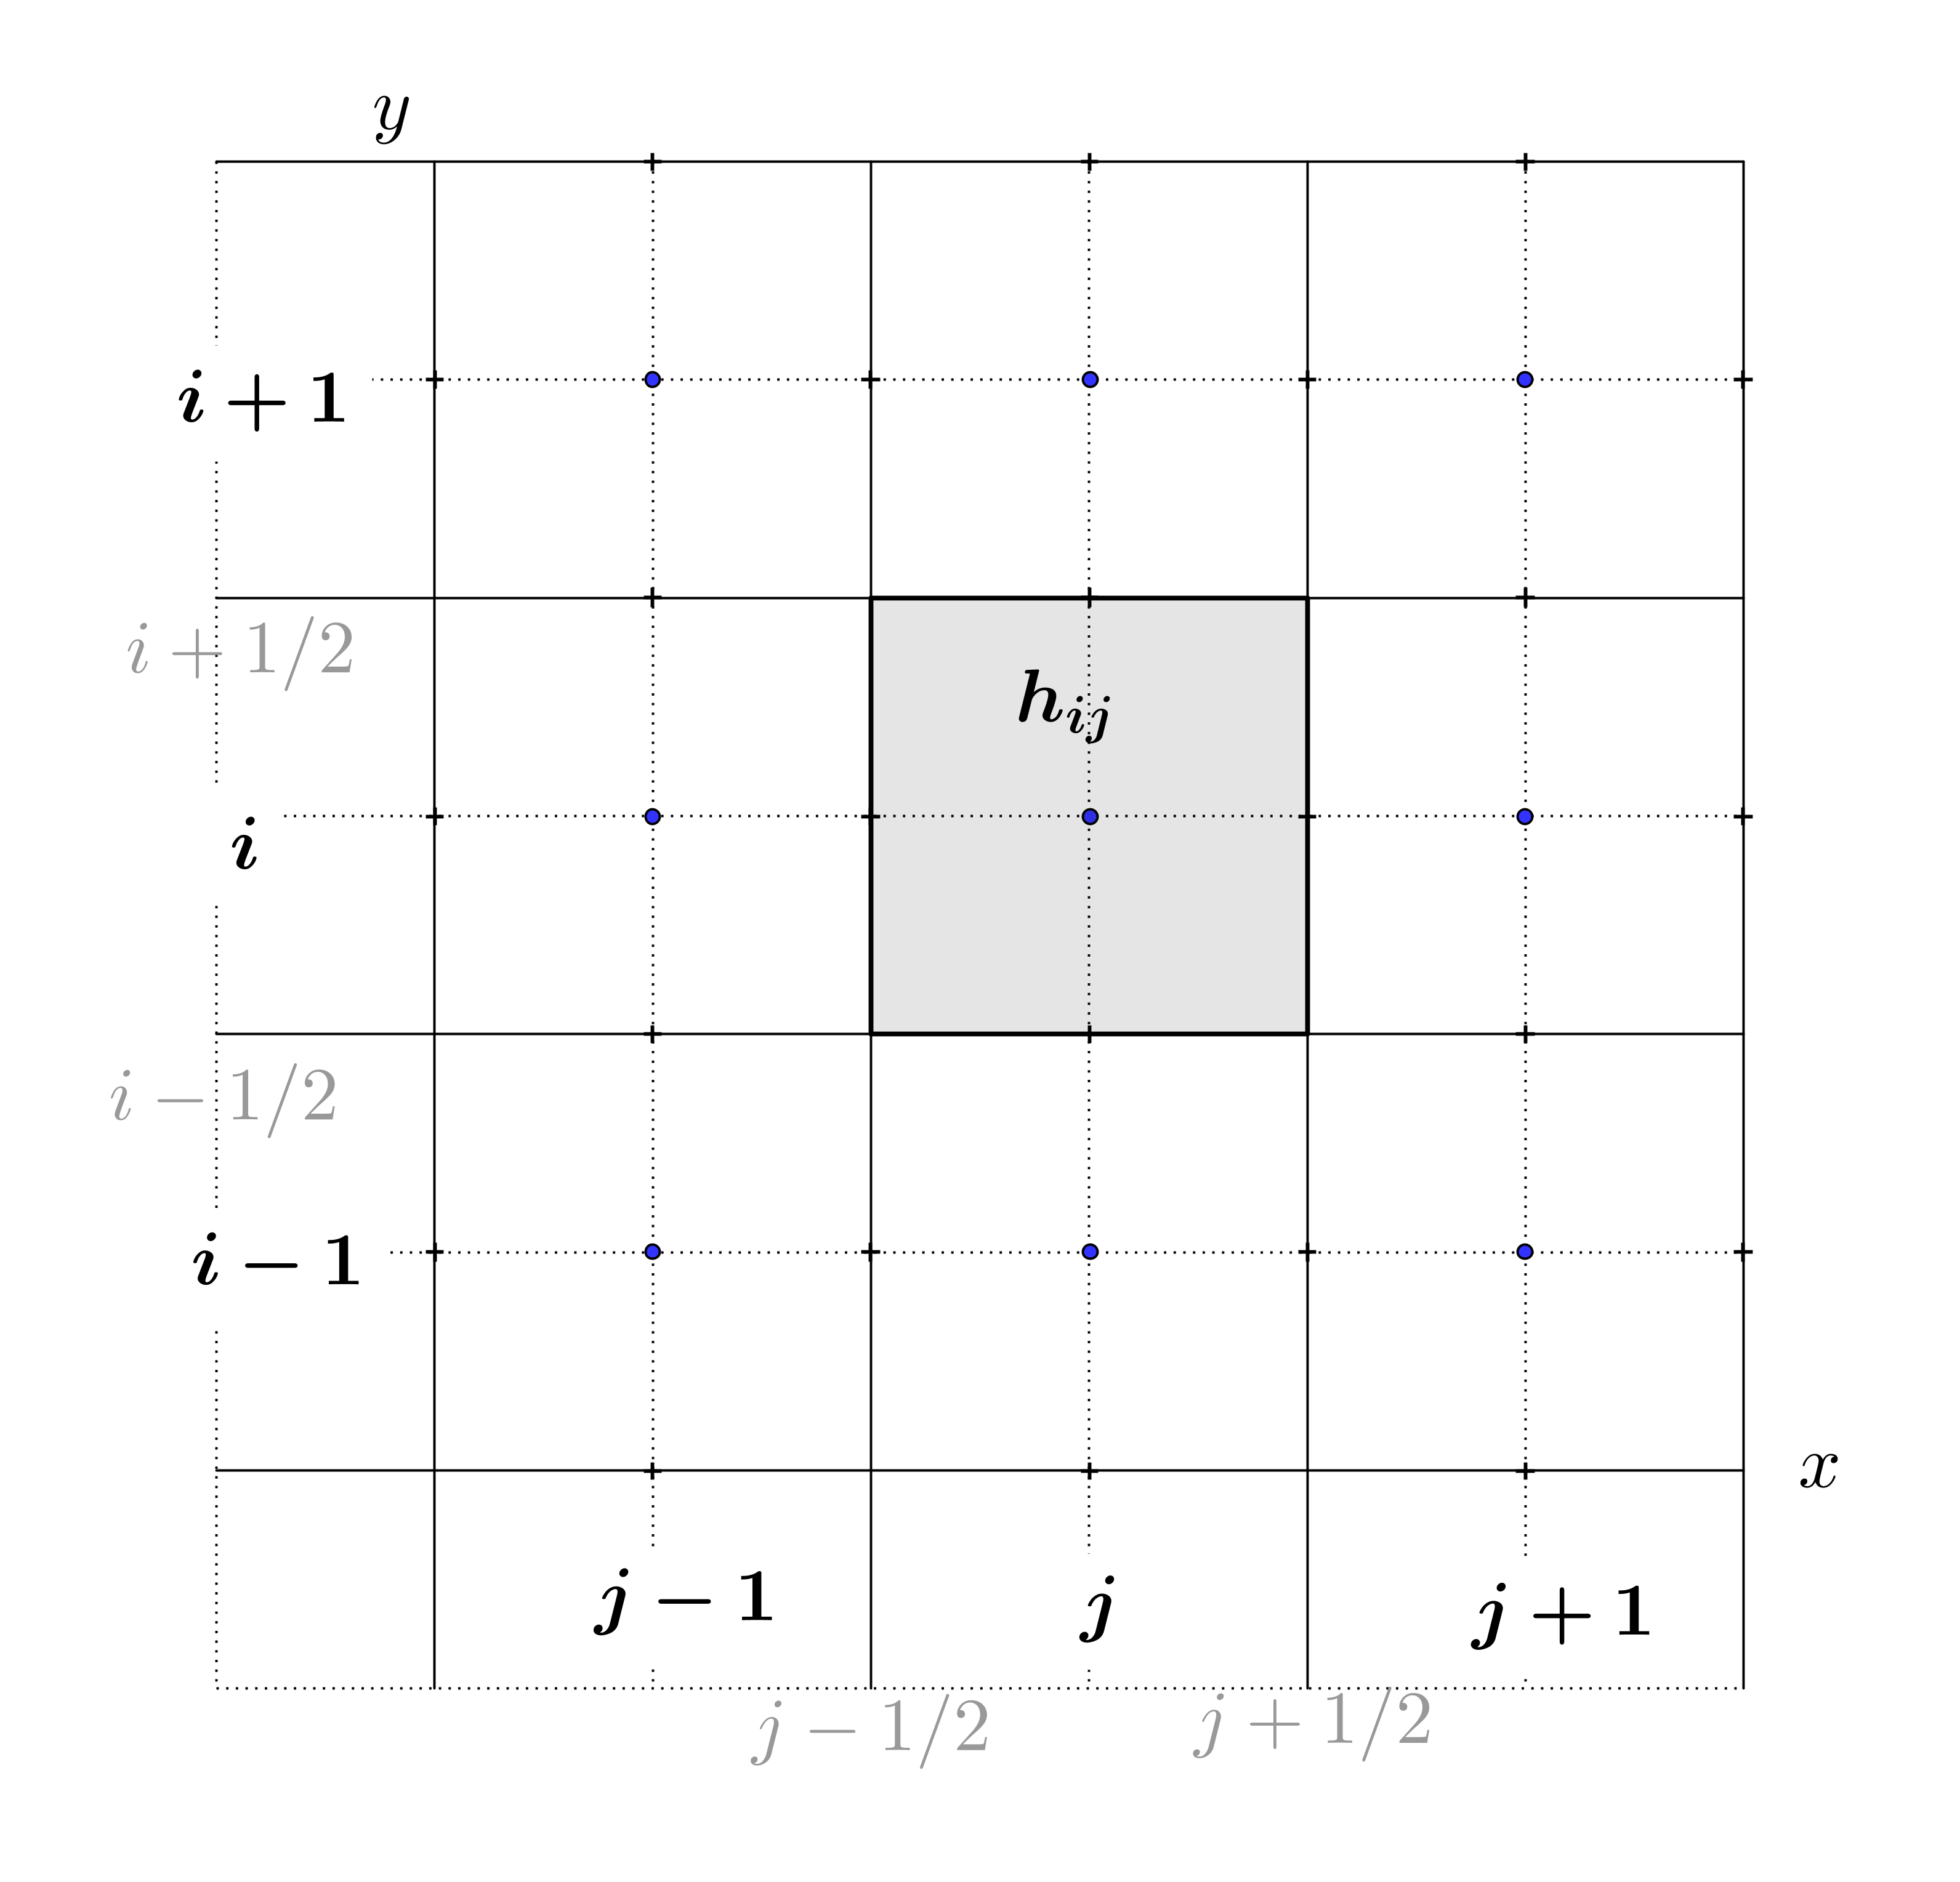

👉 Por que colocamos o índice $i$ no $y$ e não no $x$?


> Vamos querer representar esse pontos na forma de uma matrix, onde naturalmente o índice $j$ refere-se às colunas (logo valores de $x$ diferentes) e o índice $i$ refere-se às linhas (logo a diferentes $y$).

veja como fica a indexação da malha dos pontos com $(j,i)$ representando os pontos $(x_j, y_i)$.

Isso é quase a representação de uma matriz, com a exceção de em matrizes enumeramos as linhas de cima para baixo. Logo, no código, teremos que inverter a ordem dos indices de $y$ quando quisermos usar notação matricial.

👉 Por que é interessante usar a notação matricial para uma grade numérica?

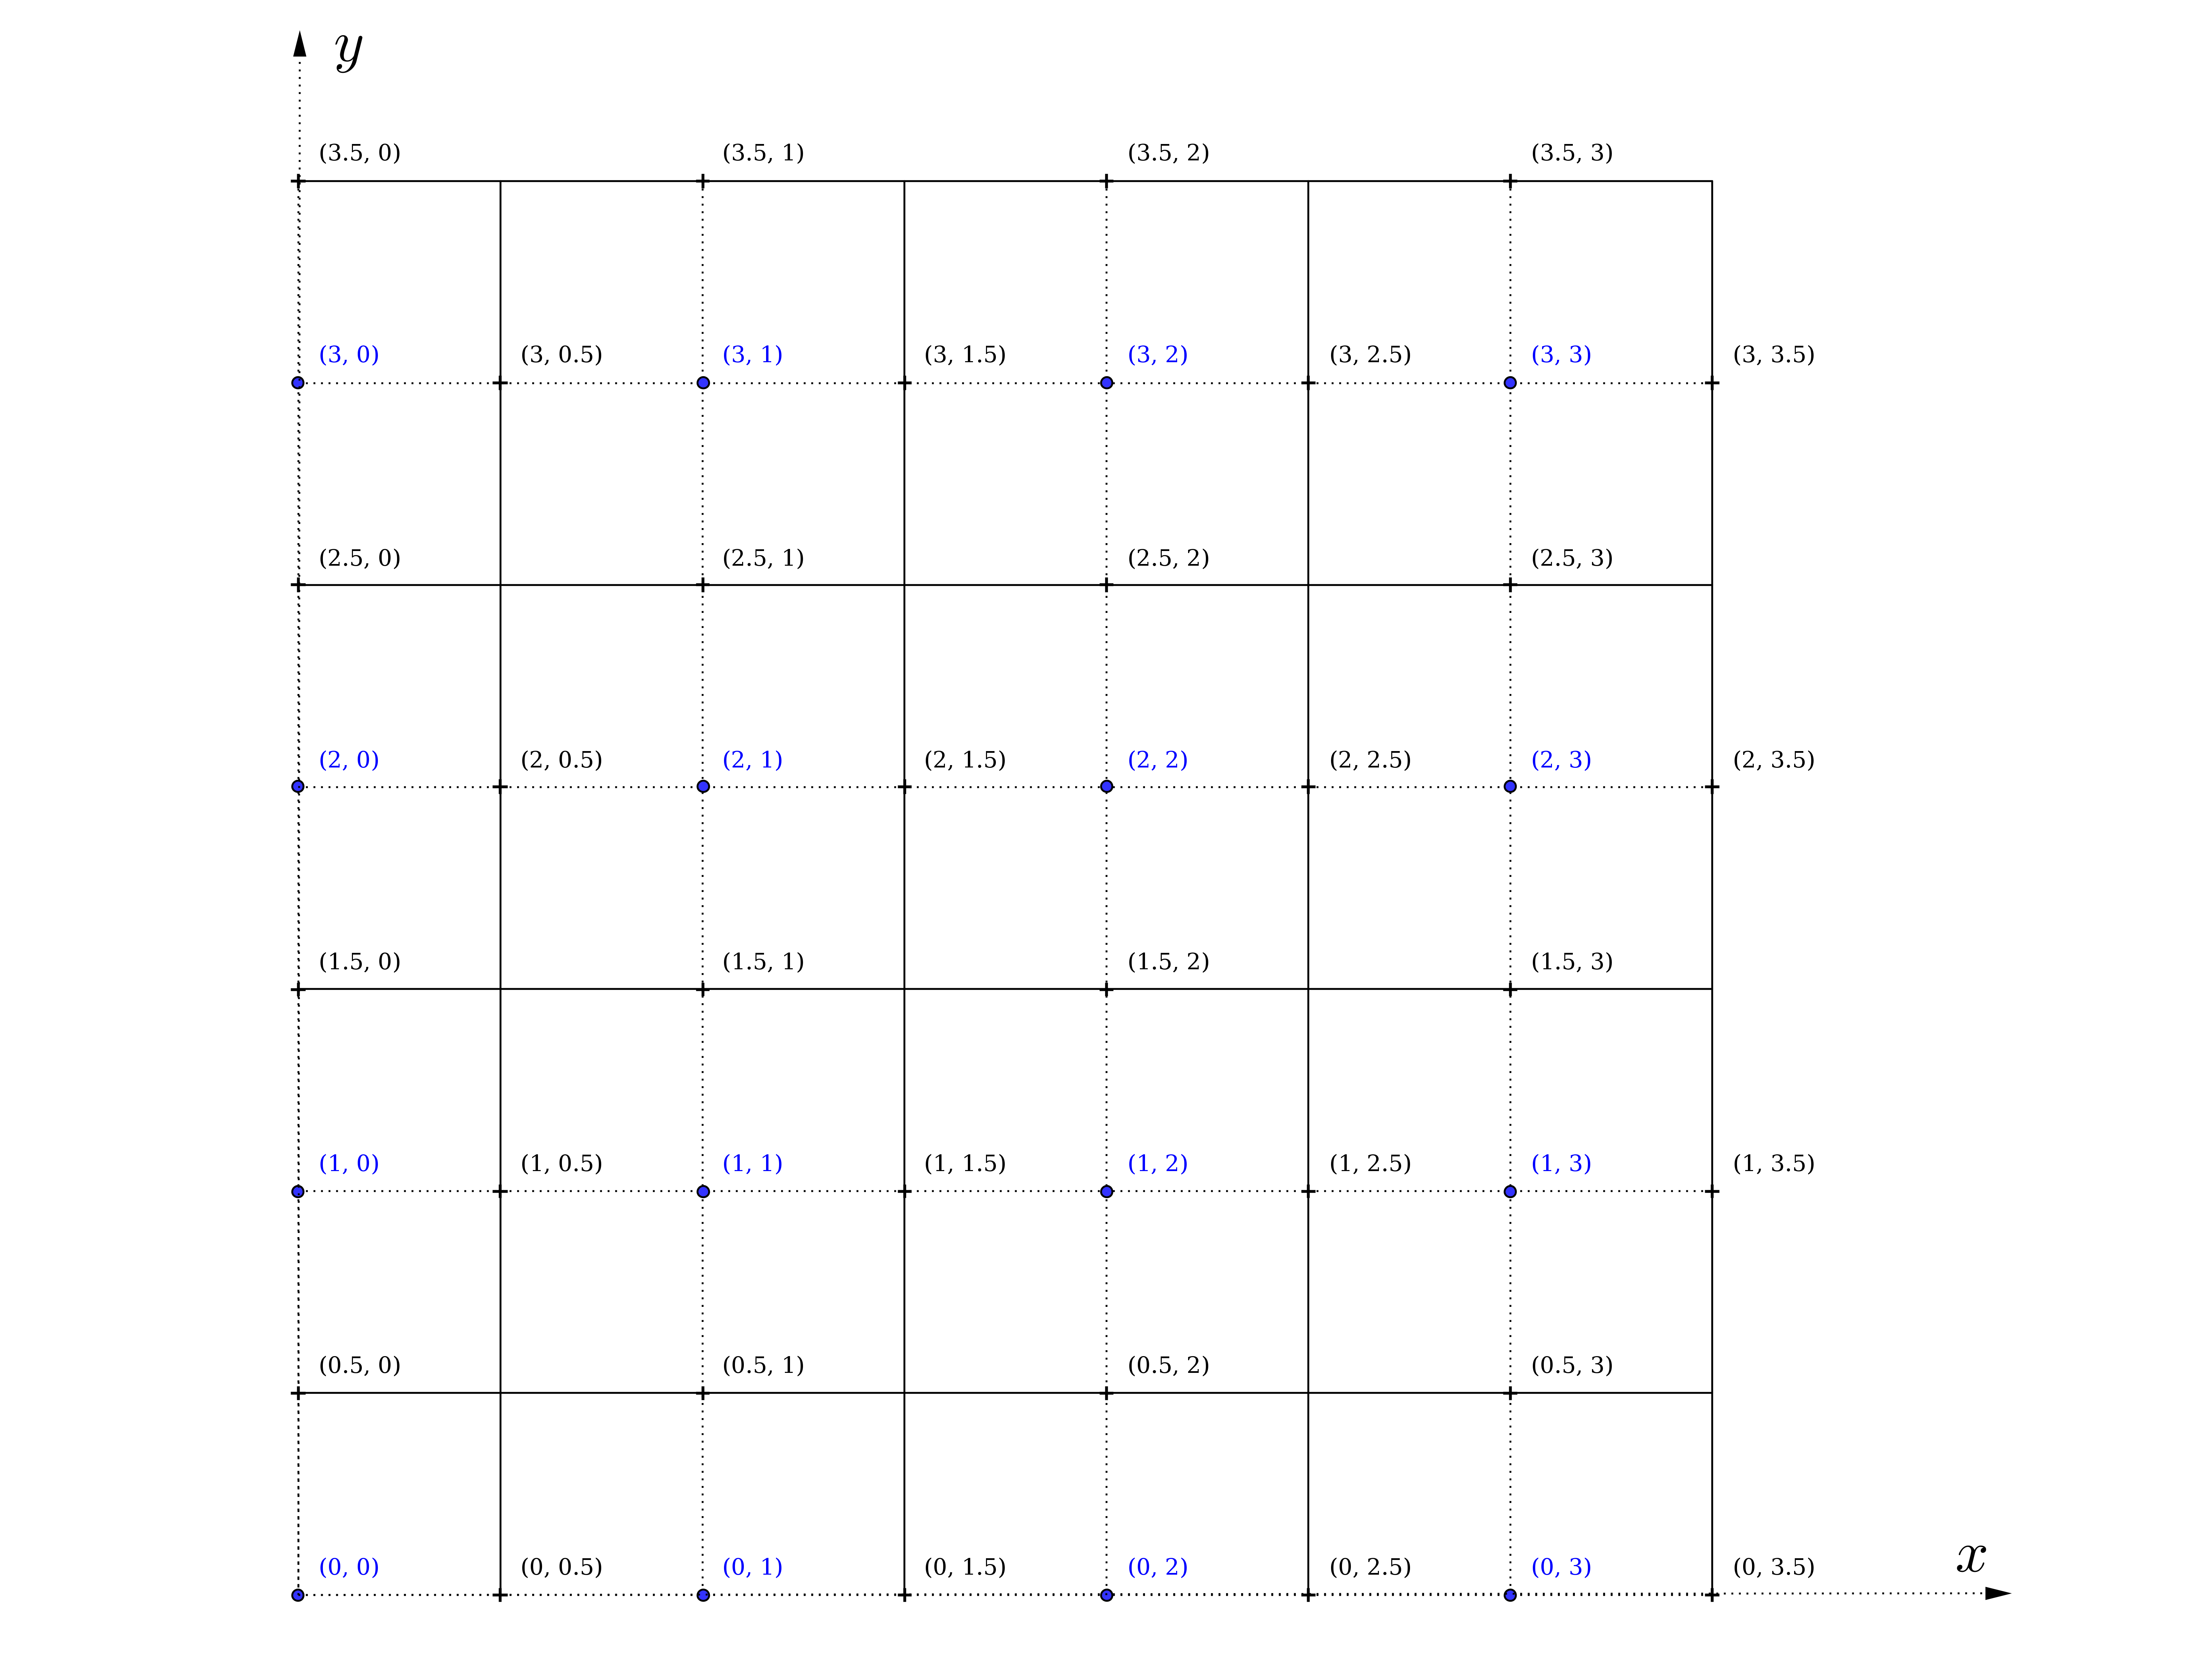

Como vamos usar volumes finitos, seguiremos a ideia de que o campo de altura do fluido está no centro de uma célula, e as velocidades estão nas fronteiras da células, conforme a figura a seguir. Isso é o equivalente a uma malha deslocada (malha tipo C) em diferenças finitas.

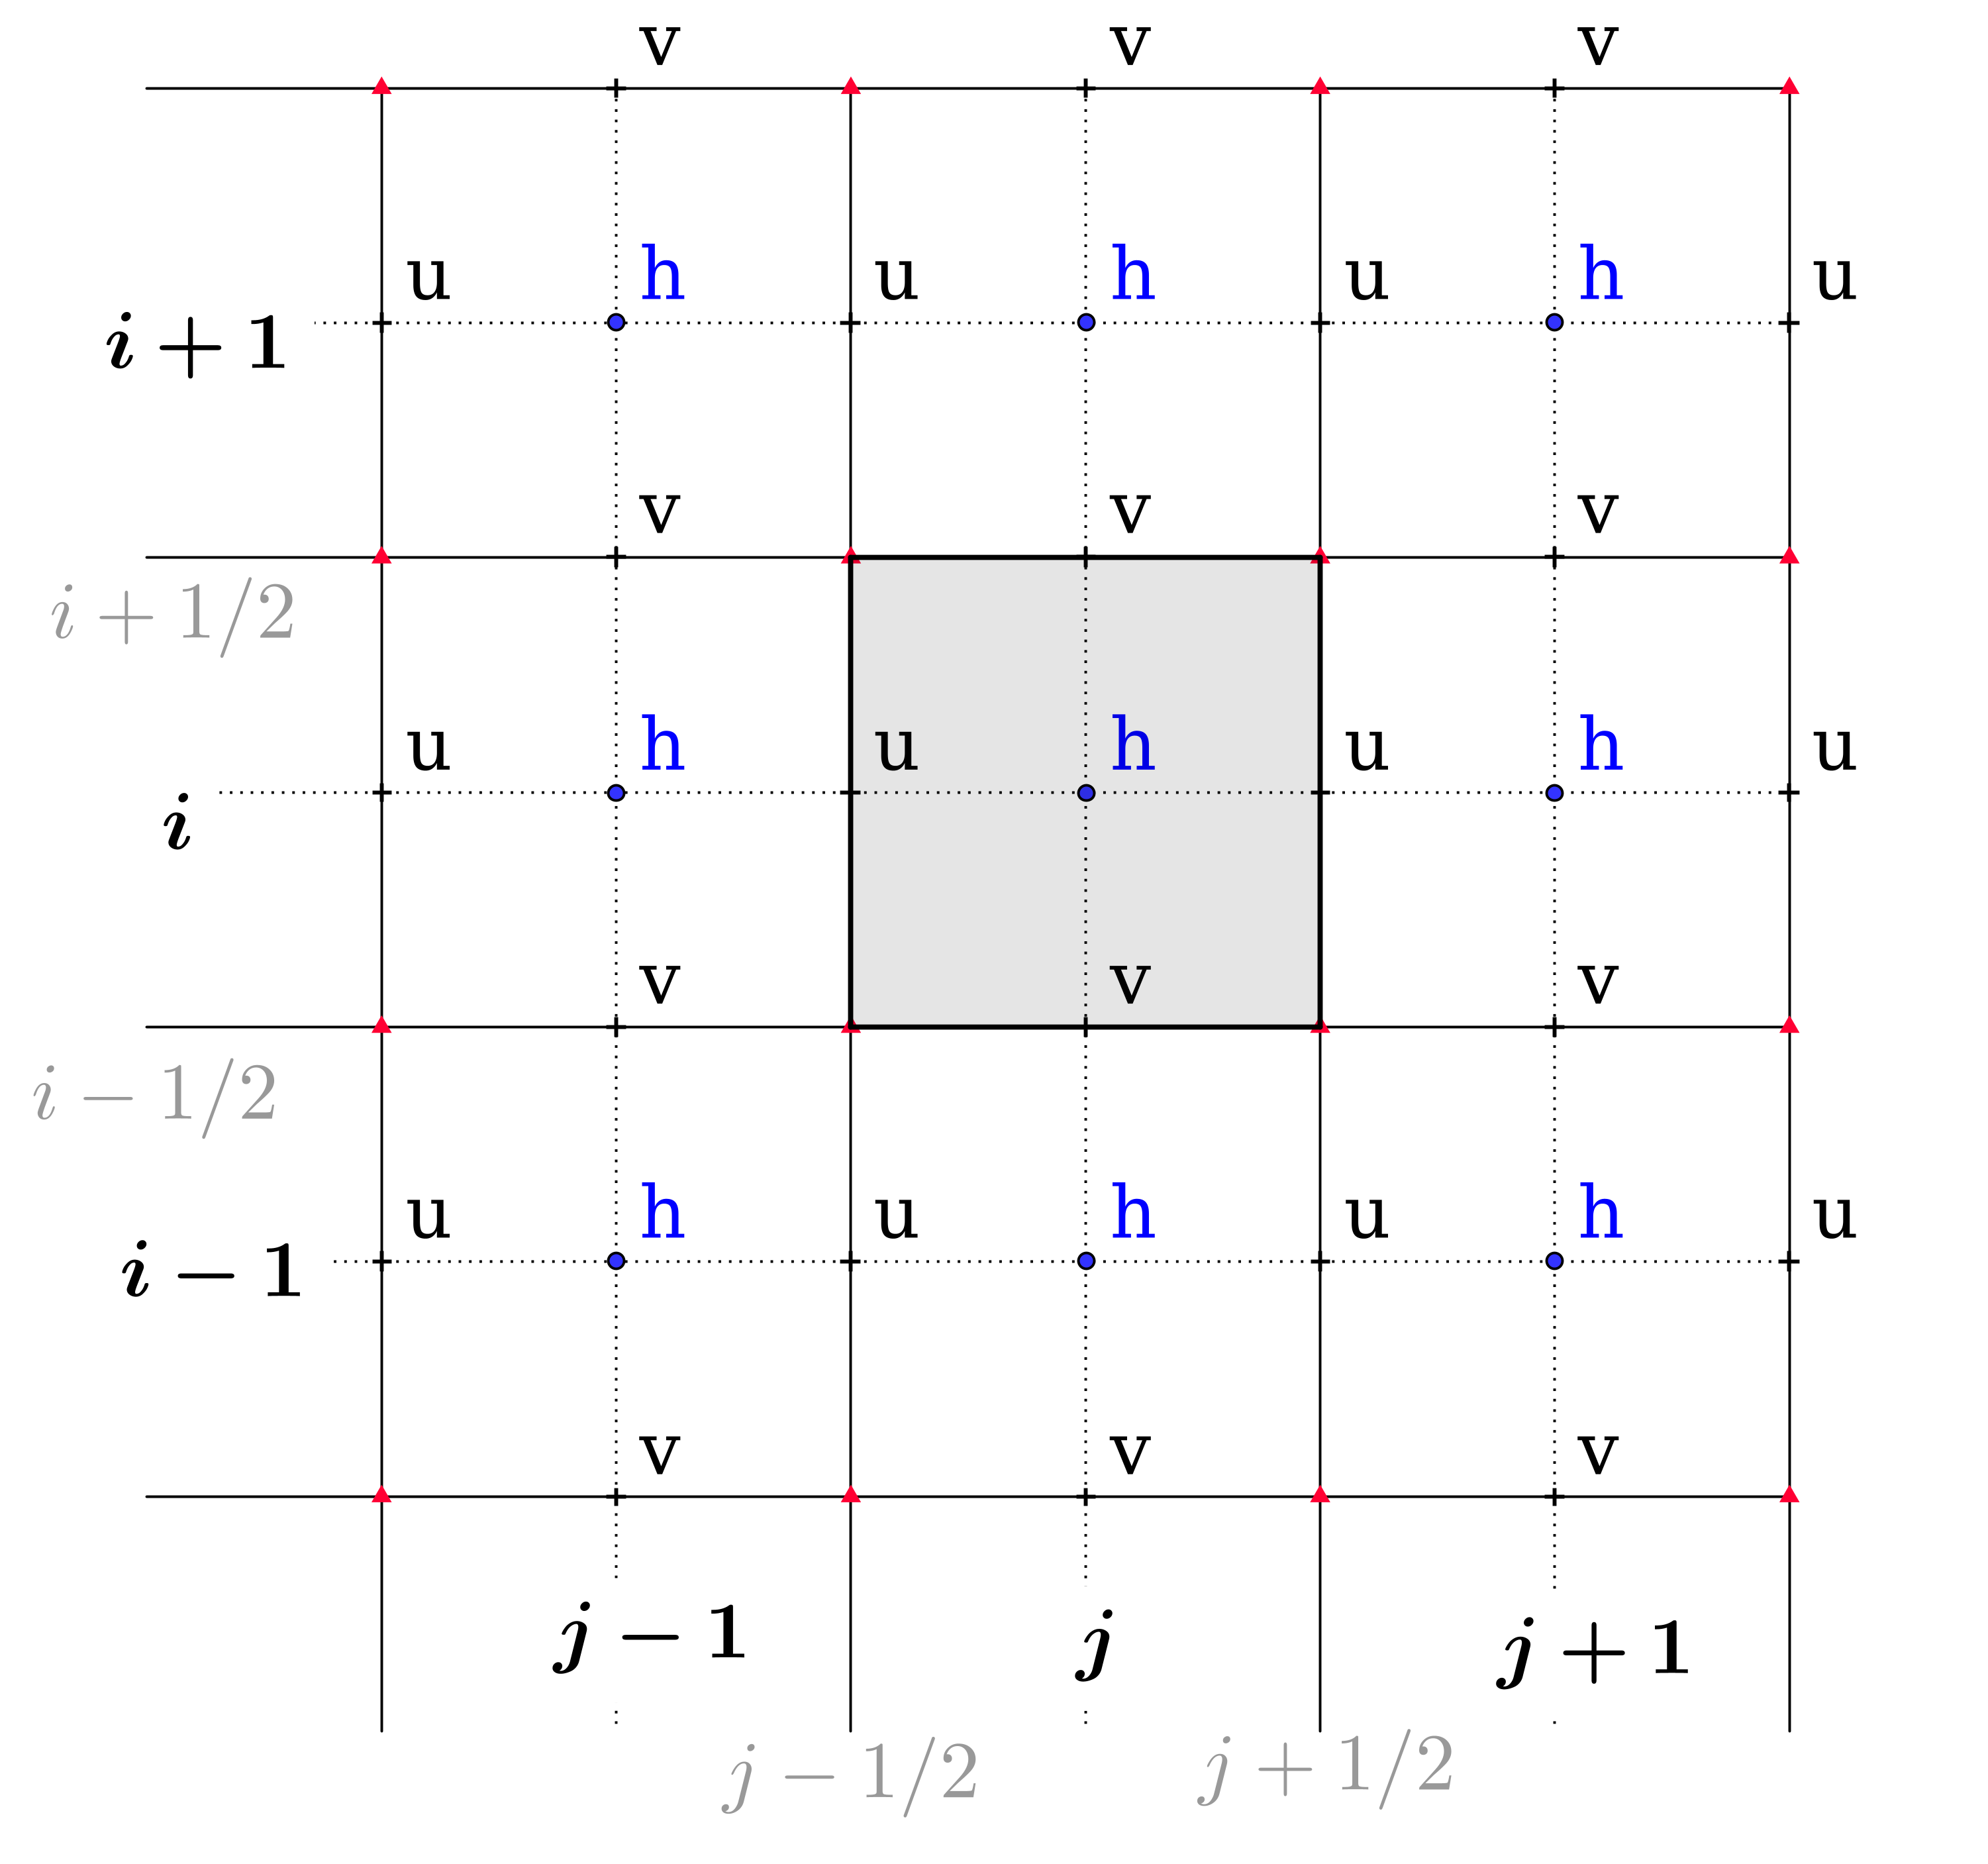

Vejamos o código que gera essa malha a seguir.

In [ ]:
import numpy as np                  # Numpy
import matplotlib.pyplot as plt     # Figures
import matplotlib.colors            # Colors
from prettytable import PrettyTable # Tables
import sympy as sp                  # Sympy

In [ ]:
#Domain definition
#---------------------

#global constants
erad = 6371220 #Earth Radius - global constant!
oneday = 3600*24  # One day in seconds
omega = 7.292e-05 # Earth rate of rotation
grav = 9.80616    # gravity constant

 # Units are associated with Earth dimensions
class Domain2D:
  def __init__(self, t0=0.0, T=oneday, xi=-np.pi*erad, xf=np.pi*erad, yi=-np.pi*erad, yf=np.pi*erad, dt=60.0, dx=2*np.pi*erad/100.0, dy=2*np.pi*erad/100.0,
               nt=None, mx=None, my=None):

    self.t0 = t0     # Initial time (seconds)
    self.T = T       # Final time (seconds)
    self.xi = xi     # Leftmost position in space (meters)
    self.xf = xf     # Rightmost position in space (meters)
    self.yi = yi     # Bottom position in space (meters)
    self.yf = yf     # Top position in space (meters)
    self.Lx = xf-xi  # Length of x range
    self.Ly = yf-yi  # Length of y range

    #If Earth scale, add factor for plotting in 1000x km
    self.to_kkm = 1.0
    if self.Lx > 1000:
      self.to_kkm = 1.0/(1000*1000)

    #Time discretization
    if nt==None:
      nt = (T-t0)/dt
      if not nt.is_integer():
        print( "Warning! This dt does not allow integer number of timesteps!! Original dt: ", dt)
        dt = (T-t0)//(int((T-t0)/dt))
        print("   new dt:", dt)
    else:
      dt = (T-t0)/nt
      print("Calculating dt based on given nt. dt = ", dt)

    self.nt = int((T-t0)/dt)                # Number of timesteps
    self.t = np.linspace(t0, T, self.nt+1)  # Discrete times (includes endpoints!)

    # Space discretization (x) - j indexing
    if mx==None:
      mx = (xf-xi)/dx
      if not mx.is_integer():
        print("Warning! This dx does not allow integer number of space volumes!! Original dx=", dx)
        dx = (xf-xi)/(int((xf-xi)/dx))
        print("   new dx=", dx)
    else:
      dx = (xf-xi)/mx
      print("Calculating dx based on given mx. dx = ", dx)

    self.mx = int((xf-xi)/dx)                 # Number of points in space (x)
    self.x = np.linspace(xi, xf-dx, self.mx)  # Points in space (x)
    self.x_half = np.linspace(xi+dx/2.0, xf-dx/2.0, self.mx)  # Half points in space (x)
    self.indj = np.arange(0, self.mx, 1)                #Indexing range for j
    self.indj_p1 = np.arange(1, self.mx+1, 1)%self.mx   #Indexing range for j+1 (circular)
    self.indj_m1 = np.arange(-1, self.mx-1, 1)%self.mx   #Indexing range for j-1 (circular)

    # Space discretization (y) - i indexing
    if my==None:
      my = (yf-yi)/dy
      if not my.is_integer():
        print("Warning! This dy does not allow integer number of space volumes!! Original dx=", dy)
        dy = (yf-yi)/(int((yf-yi)/dy))
        print("   new dy=", dy)
    else:
      dy = (yf-yi)/my
      print("Calculating dy based on given my. dy = ", dy)

    self.my = int((yf-yi)/dy)                 # Number of points in space (y)
    self.y = np.linspace(yi, yf-dy, self.my)  # Points in space (y)
    self.y_half = np.linspace(yi+dy/2.0, yf-dy/2.0, self.my)  # Half points in space (y)

    self.indi = np.arange(0, self.my, 1)  # Indexing range for i
    self.indi_p1 = (self.indi+1)%self.my  # Indexing range for i+1 (circular)
    self.indi_m1 = (self.indi-1)%self.my  # Indexing range for i-1 (circular)

    self.dt = dt   # Timestep (sec)
    self.dx = dx   # Space step (meters) - x
    self.dy = dy   # Space step (meters) - y

    # 2D grids for staggering - used for ploting later
    # Notice the y-axis is flipped!!!!
    # ---------------------------
    #
    #   y_my
    #   |
    #   yi          (xj, yi)
    #   |
    #   |
    #   y0
    #  i/j x0------- xj ------- x_mx
    #
    # Xh, Yh : x,y poins for depth/height h - centers/primal grid (j, i)
    self.Xh, self.Yh = np.meshgrid(self.x, self.y[::-1], indexing='xy')
    self.h_ext = ((self.x[0]-self.dx/2)*self.to_kkm, (self.x[-1]+self.dx/2)*self.to_kkm, (self.y[0]-self.dy/2)*self.to_kkm, (self.y[-1]+self.dy/2)*self.to_kkm)

    # Xu, Yu : x,y poins for zonal velocity u - East/West Edges (j+1/2, i)
    self.Xu, self.Yu = np.meshgrid(self.x_half, self.y[::-1], indexing='xy')
    self.u_ext = ((self.x[0])*self.to_kkm, (self.x[-1]+self.dx)*self.to_kkm, (self.y[0]-self.dy/2)*self.to_kkm, (self.y[-1]+self.dy/2)*self.to_kkm)
    #self.u_ext = (self.x_half[0]*self.to_kkm, self.x_half[-1]*self.to_kkm, self.y[0]*self.to_kkm, self.y[-1]*self.to_kkm)

    # Xv, Yv : x,y poins for meridional velocity v - North/South Edges (j, i+1/2)
    self.Xv, self.Yv = np.meshgrid(self.x, self.y_half[::-1], indexing='xy')
    self.v_ext = ((self.x[0]-self.dx/2)*self.to_kkm, (self.x[-1]+self.dx/2)*self.to_kkm, (self.y[0])*self.to_kkm, (self.y[-1]+self.dy)*self.to_kkm)
    #self.v_ext = (self.x[0]*self.to_kkm, self.x[-1]*self.to_kkm, self.y_half[0]*self.to_kkm, self.y_half[-1]*self.to_kkm)

    # Xq, Yq : x,y poins for vorticity q - Dual cells (corners) (j+1/2, i+1/2)
    self.Xq, self.Yq = np.meshgrid(self.x_half, self.y_half[::-1], indexing='xy')
    self.q_ext = ((self.x[0])*self.to_kkm, (self.x[-1]+self.dx)*self.to_kkm, (self.y[0])*self.to_kkm, (self.y[-1]+self.dy)*self.to_kkm)
    #self.q_ext = (self.x_half[0]*self.to_kkm, self.x_half[-1]*self.to_kkm, self.y_half[0]*self.to_kkm, self.y_half[-1]*self.to_kkm)

    #Display variables
    if False:
      print("Domain set up:")
      print(" > dt = ", self.dt)
      print(" > nt = ", self.nt)
      print(" > T-T0 = ", self.T-self.t0)
      print(" > dx = ", self.dx)
      print(" > mx = ", self.mx)
      print(" > Lx = ", self.Lx)
      print(" > dy = ", self.dy)
      print(" > my = ", self.my)
      print(" > Ly = ", self.Ly)


Como vamos usar volumes finitos, seguiremos a ideia de que o campo de altura do fluido está no centro de uma célula, e as velocidades estão nas fronteiras da células, conforme a figura a seguir. Isso é o equivalente a uma malha deslocada (malha tipo C) em diferenças finitas.

👉 Importante: por conta da inversão dos índices do eixo y, quando construimos as malhas numéricas para cada variável $h$, $u$, $v$, invertemos também a definição de $y$, varrendo de trás para frente.

Vajamos como chamar essa instância dessa classe, criando portanto um domínio discreto específico:

In [ ]:
# Discrete domain construction
dom = Domain2D(t0=0.0, T=12*oneday, xi=-np.pi*erad, xf=np.pi*erad, yi=-np.pi*erad, yf=np.pi*erad, dt=360.0, mx=200, my=200)


Calculating dx based on given mx. dx =  200157.7794640436
Calculating dy based on given my. dy =  200157.7794640436




---

### O problema



Para definir o problema precisamos dos parâmetros, da topografia e das condições iniciais. Para as condições iniciais, temos que tomar cuidado para alimentarmos as compos iniciais levando em conta suas respectivas posições na malha.

👉 Esse preenchimento das condições iniciais é chamado de preenchimento pontual (grid-point evaluation), mas em Volumes Finitos muitos pesquisadores usam também um preenchimento com valores médios ou integrais dos campos. Aqui vamos seguir o que é feito no modelo MPAS e usar avaliações pontuais.

Vejamos um exemplo com condições iniciais clássicas para esse tipo de equação: condições em balanço geostrófico. Neste caso, o campo dos ventos está balanço com o efeito de Coriolis.

O campo velocidades é dado por ventos zonais periódicos com velocidade meriodinal nula, em balanço com um campo de altura.

Definimos primeiro o campo de altura
$$
h^0(x,y)=H_0 \sin (2\pi y/L_y) + \bar{h}
$$
onde o $\bar{h}$ é nossa altura média do fluido, $H_0$ uma constante arbitrária e $L_y$ a dimensão (comprimento) do domínio na direção $y$.

Para o fluido ficar em equilíbrio, precisamos que
$$\frac{\partial h}{\partial t} = 0,$$
$$\frac{\partial u}{\partial t} = 0,$$
$$\frac{\partial v}{\partial t} = 0,$$
logo, podemos tomar $u$ e $v$ tais que

$$
-fv = -\frac{\partial h}{\partial x} \\
fu = -\frac{\partial h}{\partial y}
$$
assim
$$
u^0(x,y)=-\frac{g}{f}  \frac{2 \pi}{L_y} H_0 \cos(2 \pi y / L_y) ,\\
v^0(x,y) = 0.
$$

No código a seguir, essa condição é escolhida pela opção "ini = 1".


In [ ]:
# SWE problem definition
#-----------------------

class SWE_2D:
  def __init__(self, hbar = 10000.0, f = 2*omega, g = grav, ini = 0, dom = Domain2D()):
    self.hbar = hbar # Mean depth/height (meters)
    self.f = f       # Coriolis frequency - constant - f-plane (1/s)
    self.g = g       # Gravity acceleration (m/s^2)

    self.dom = dom    # Domain instance
    self.ini = ini    # Initial condition
                      #        0 - Constant wind for advection of hill
                      #        1 - Geostrophic balance
                      #        2 - Unstable jet - steady - See Peixoto & Schreiber 2019 SIAM paper
                      #        3 - Unstable jet - with perturbation - See Peixoto & Schreiber 2019 SIAM paper
                      #        4 - Playground
    self.H0 = 100.0   # Constant for initial contions
    self.U0 = 50.0    # Constant for initial contions

    self.eta_b = self.topo() #Topography (pre-calculated)

    #Display variables
    if True:
      print("Domain set up:")
      print(" > f = ", self.f)
      print(" > g = ", self.g)
      print(" > ini = ", self.ini)

  def u0(self):  #Initial condition in u
    if self.ini == 0:
      # Constant
      u0 = 2*np.pi*erad/(12*oneday) #Full rotation in 12 days
      return u0*np.ones_like(self.dom.Xu)

    elif self.ini == 1:
      #Geostrophic balance
      return -(self.g/self.f)*self.H0*np.cos(2*np.pi*self.dom.Yu/(self.dom.Ly))*2*np.pi/(self.dom.Ly)

    elif self.ini == 2 or self.ini == 3:
      #Unstable jet - see Peixoto & Schreiber 2019 SIAM paper
      return self.U0*np.power(np.sin(2*np.pi*self.dom.Yu/(self.dom.Ly)), 81)

    elif self.ini == 4:
      #Rest
      return self.U0*np.power(np.sin(2*np.pi*self.dom.Yu/(self.dom.Ly)), 17)
      #np.zeros_like(self.dom.Xu)

    else:
      #Rest
      return np.zeros_like(self.dom.Xu)

  def v0(self):  #Initial condition in v

    if self.ini == 0:
      #rest
      return np.zeros_like(self.dom.Xv)

    elif self.ini == 1:
      #rest
      return np.zeros_like(self.dom.Xv)

    elif self.ini == 2 or self.ini == 3:
      #rest - see Peixoto & Schreiber 2019 SIAM paper
      return np.zeros_like(self.dom.Xv)

    if self.ini == 4:
      #rest
      return np.zeros_like(self.dom.Xv)

    else:
      #rest
      return np.zeros_like(self.dom.Xv)

  def h0(self):  #Initial condition in h

    if self.ini == 0:
      #Bump

      k = 1000
      p1_x = 0.10*self.dom.Lx+self.dom.xi
      p1_y = 0.70*self.dom.Ly+self.dom.yi

      d1 = (self.dom.Xh-p1_x)**2/(self.dom.Lx**2) + (self.dom.Yh-p1_y)**2/(self.dom.Ly**2)

      bump = 0.1*self.hbar*(np.exp(-k*d1))

      return self.hbar*np.ones_like(self.dom.Yh) + bump

    elif self.ini == 1:
      #Geostrophic balance
      return self.H0*np.sin(2*np.pi*self.dom.Yh/(self.dom.Ly)) + self.hbar*np.ones_like(self.dom.Yh)

    elif self.ini == 2 or self.ini == 3:
      # Unstable jet - see Peixoto & Schreiber 2019 SIAM paper
      z = sp.Symbol('z')
      y = sp.Symbol('y')
      h_f = sp.integrate(sp.sin(2.0*sp.pi*z/self.dom.Ly)**(81), (z, self.dom.yi, y))
      h_f = sp.lambdify(y, h_f)

      pert = np.zeros_like(self.dom.Yh)

      if self.ini == 3:
        #add perturbation
        hpert = 0.01
        k = 1000.0
        p1_x = 0.15*self.dom.Lx+self.dom.xi
        p1_y = 0.75*self.dom.Ly+self.dom.yi
        p2_x = 0.85*self.dom.Lx+self.dom.xi
        p2_y = 0.25*self.dom.Ly+self.dom.yi
        d1 = (self.dom.Xh-p1_x)**2/(self.dom.Lx**2) + (self.dom.Yh-p1_y)**2/(self.dom.Ly**2)
        d2 = (self.dom.Xh-p2_x)**2/(self.dom.Lx**2) + (self.dom.Yh-p2_y)**2/(self.dom.Ly**2)
        pert = hpert*self.hbar*(np.exp(-k*d1)+np.exp(-k*d2))

      return self.hbar*np.ones_like(self.dom.Yh) - (self.U0*self.f/self.g)*h_f(self.dom.Yh) - pert


    elif self.ini == 4:
      # 2 Bumps
      k = 1000
      p1_x = 0.10*self.dom.Lx+self.dom.xi
      p1_y = 0.70*self.dom.Ly+self.dom.yi
      p2_x = 0.55*self.dom.Lx+self.dom.xi
      p2_y = 0.25*self.dom.Ly+self.dom.yi
      d1 = (self.dom.Xh-p1_x)**2/(self.dom.Lx**2) + (self.dom.Yh-p1_y)**2/(self.dom.Ly**2)
      d2 = (self.dom.Xh-p2_x)**2/(self.dom.Lx**2) + (self.dom.Yh-p2_y)**2/(self.dom.Ly**2)
      pert = 0.1*self.hbar*(np.exp(-k*d1)+np.exp(-k*d2))

      return self.hbar*np.ones_like(self.dom.Yh) + pert

    else:
      # constant
      return self.hbar*np.ones_like(self.dom.Xh)

  def topo(self): #Topography
    if self.ini == 0 :
      return np.zeros_like(self.dom.Xh)

    elif self.ini == 1:
      return np.zeros_like(self.dom.Xh)

    else:
      return np.zeros_like(self.dom.Xh)


Esse tipo de definição de condições iniciais idealizadas é muito comum em modelos de previsão do tempo. No MPAS isso entra como uma opção na inicialização do modelo (init_atmosphere).

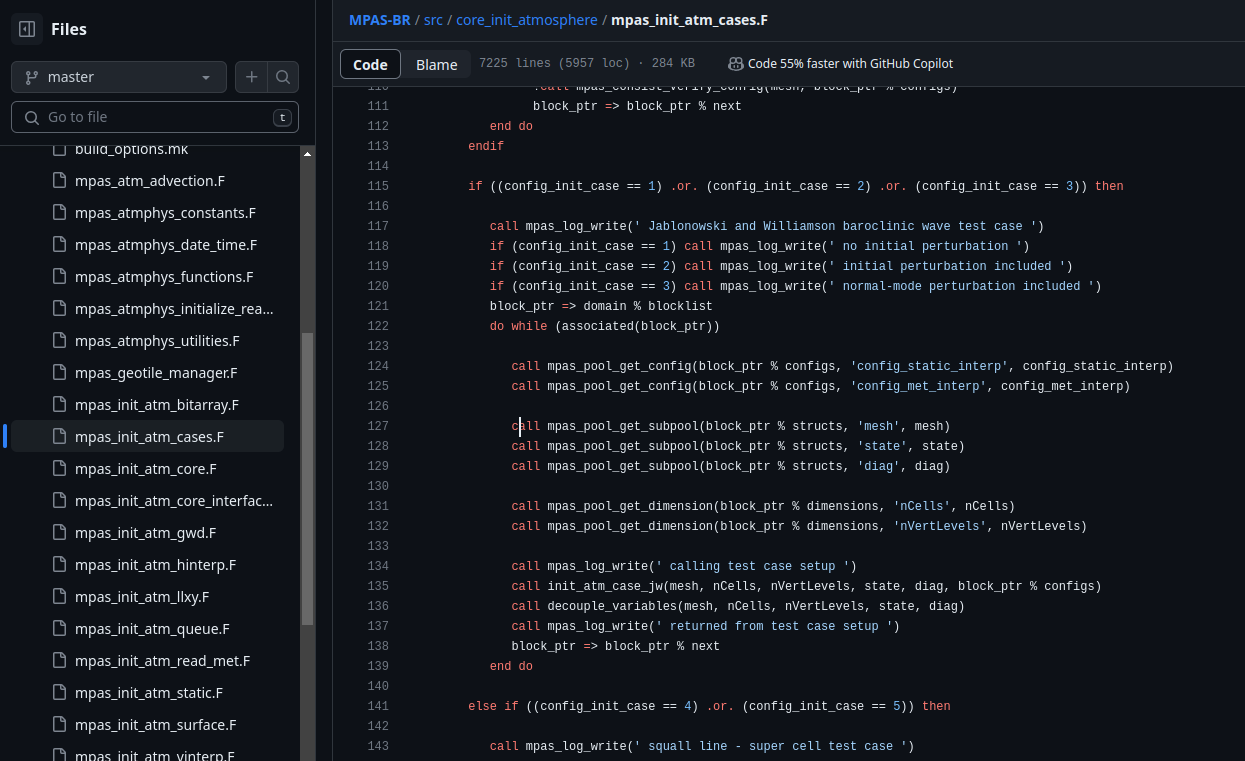

Uma das vantagens de usarmos notação matricial para os campos aparece na hora de fazer gráficos dos campo. Podemos representar como se fosse uma "imagem" da matrix (usando o imshow do matplotlib diretamente). Mas lembre-se de que o eixo $y$ esta invertido, então na nossa definição do domínio invertemos os indices eixo $y$ (note isso em dom.h_ext).

In [ ]:
def plot2D_panel(u, v, h, z, dom = Domain2D()):

  # Important remark: matplotlib imshow plots the matrix as we see it printed on the screen
  #      so that is why we reverted the Y axis in the definition of our 2D grid, so that the initial Y is at the bottom
  #      aligned with our indexing (j,i) that starts in the lower corner of the plane

  fontsize=14
  figsize=(14, 10)
  fig, axs = plt.subplots(2,2,figsize=figsize)

  #Plot u (edges)
  axs[0,0].set_title("Zonal Velocity (u)", fontsize=fontsize)
  cmin = np.amin(u)
  cmax = np.amax(u)
  cref=max(abs(cmin),abs(cmax))
  im = axs[0,0].imshow(u, interpolation='nearest', extent=dom.u_ext, aspect='auto', vmin=-cref, vmax=+cref, cmap=plt.get_cmap('seismic'))
  cbar = plt.colorbar(im)
  if dom.Lx > 1000: #Earth scale
    cbar.set_label('m/s', rotation=270, labelpad=+20, size=fontsize)
    axs[0,0].set_ylabel("y (1000 km)", fontsize=fontsize)


  # Plot v (edges)
  axs[0,1].set_title("Meridional Velocity (v)", fontsize=fontsize)
  cmin = np.amin(v)
  cmax = np.amax(v)
  cref=max(abs(cmin),abs(cmax))
  im = axs[0,1].imshow(v, interpolation='nearest', extent=dom.v_ext, aspect='auto', vmin=-cref, vmax=+cref, cmap=plt.get_cmap('seismic'))
  cbar = plt.colorbar(im)
  if dom.Lx > 1000: #Earth scale
    cbar.set_label('m/s', rotation=270, labelpad=+20, size=fontsize)


  #Plot h
  axs[1,0].set_title("Height/Depth (h)", fontsize=fontsize)
  if dom.Lx > 1000: #Earth scale
    im = axs[1,0].imshow(h/1000, interpolation='nearest', extent=dom.h_ext, aspect='auto', cmap=plt.get_cmap('jet'))
    axs[1,0].set_xlabel("x (1000 km)", fontsize=fontsize)
    axs[1,0].set_ylabel("y (1000 km)", fontsize=fontsize)
    cbar = plt.colorbar(im)
    cbar.set_label('km', rotation=270, labelpad=+20, size=fontsize)
  else:
    im = axs[1,0].imshow(h, interpolation='nearest', extent=dom.h_ext, aspect='auto', cmap=plt.get_cmap('jet'))
    axs[1,0].set_xlabel("x", fontsize=fontsize)
    axs[1,0].set_ylabel("y", fontsize=fontsize)
    cbar = plt.colorbar(im)

  #Plot vorticity
  axs[1,1].set_title("Vorticity ($\zeta$)", fontsize=fontsize)
  cmin = np.amin(z)
  cmax = np.amax(z)
  cref=max(abs(cmin),abs(cmax))
  #im = axs[1,1].imshow(q, interpolation='nearest', extent=dom.q_ext, aspect='auto', vmin=-cref, vmax=+cref, cmap=plt.get_cmap('seismic'))
  im = axs[1,1].imshow(z, interpolation='nearest', extent=dom.q_ext, aspect='auto', cmap=plt.get_cmap('seismic'))
  if dom.Lx > 1000: #Earth scale
    axs[1,1].set_xlabel("x (1000 km)", fontsize=fontsize)
  cbar = plt.colorbar(im)
  cbar.set_label('1/s', rotation=270, labelpad=+20, size=fontsize)

  #plt.grid(True)
  #cbar.ax.tick_params(labelsize=fontsize)


  fig.tight_layout()
  plt.show()
  return fig

def plot2D(data, pos="h", dom = Domain2D()):

  # Important remark: matplotlib imshow plots the matrix as we see it printed on the screen
  #      so that is why we reverted the Y axis in the definition of our 2D grid, so that the initial Y is at the bottom
  #      aligned with our indexing (j,i) that starts in the lower corner of the plane

  fontsize=14
  figsize=(8, 6)
  fig, ax = plt.subplots(1,1,figsize=figsize)

  #ax.set_title("Zonal Velocity (u)", fontsize=fontsize)

  if pos == "u":
    #Plot on u edges
    im = ax.imshow(data, interpolation='nearest', extent=dom.u_ext, aspect='auto', cmap=plt.get_cmap('seismic'))
  elif pos == "v":
    #Plot on v edges
    im = ax.imshow(data, interpolation='nearest', extent=dom.v_ext, aspect='auto', cmap=plt.get_cmap('seismic'))
  elif pos == "h":
    #Plot on h points
    im = ax.imshow(data, interpolation='nearest', extent=dom.h_ext, aspect='auto', cmap=plt.get_cmap('seismic'))
  else : #pos == "q":
    #Plot on q points
    im = ax.imshow(data, interpolation='nearest', extent=dom.q_ext, aspect='auto', cmap=plt.get_cmap('seismic'))

  cbar = plt.colorbar(im)
  #cbar.set_label('m/s', rotation=270, labelpad=+20, size=fontsize)
  if dom.Lx > 1000: #Earth scale
    ax.set_xlabel("x (1000 km)", fontsize=fontsize)
    ax.set_ylabel("y (1000 km)", fontsize=fontsize)
  else:
    ax.set_xlabel("x", fontsize=fontsize)
    ax.set_ylabel("y", fontsize=fontsize)

  fig.tight_layout()
  plt.show()
  return fig

Vejamos este exemplo na prática:

Calculating dx based on given mx. dx =  200157.7794640436
Calculating dy based on given my. dy =  200157.7794640436
Domain set up:
 > f =  0.00014584
 > g =  9.80616
 > ini =  1


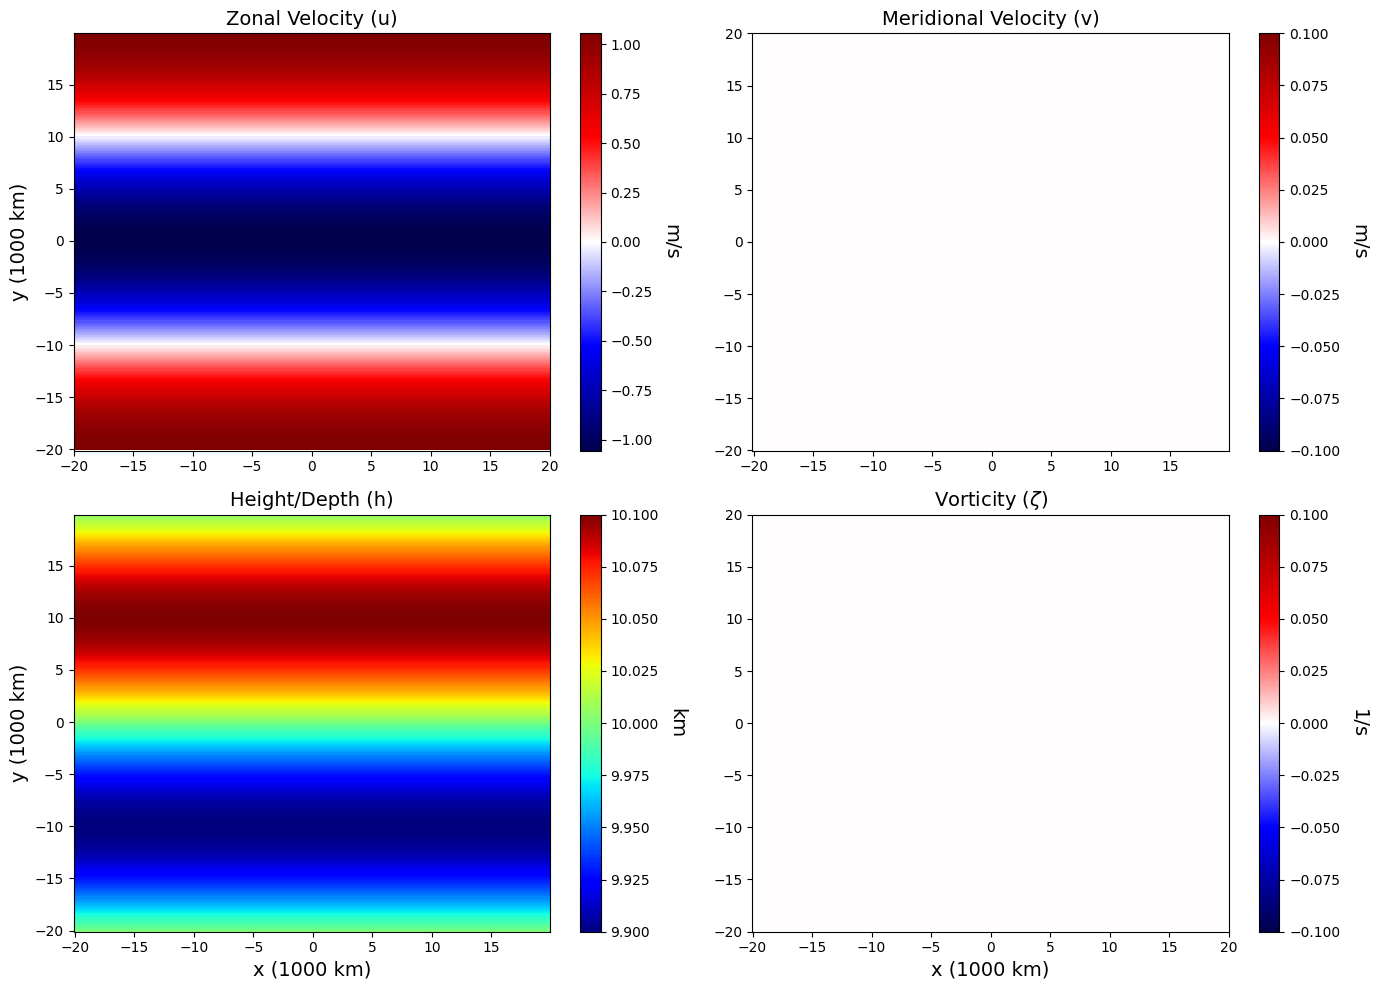

In [ ]:
# Discrete domain construction
dom = Domain2D(t0=0.0, T=12*oneday, xi=-np.pi*erad, xf=np.pi*erad, yi=-np.pi*erad, yf=np.pi*erad, dt=360.0, mx=200, my=200)

# Shallow water 2D problem
sw  = SWE_2D(hbar = 10000.0, f = 2*omega, g = grav, ini = 1, dom = dom)

# Plot initial conditions
q = np.zeros_like(dom.Xh) # just a null matrix, for now
plot2D_panel(sw.u0(), sw.v0(), sw.h0(), q, dom)
plt.show()




---



### Volumes Finitos

Agora vem a parte mais divertida, construir operadores discretos para os operadores contínuos! Vamos começar pela equação da continuidade.

$$
\frac{\partial h }{\partial t} = - \nabla\cdot (h\vec{v}), \quad \text{(Continuidade)}
$$

Vamos integrar essa equação em uma célula computacional $\Omega_{ji}$ conforme a figura abaixo.


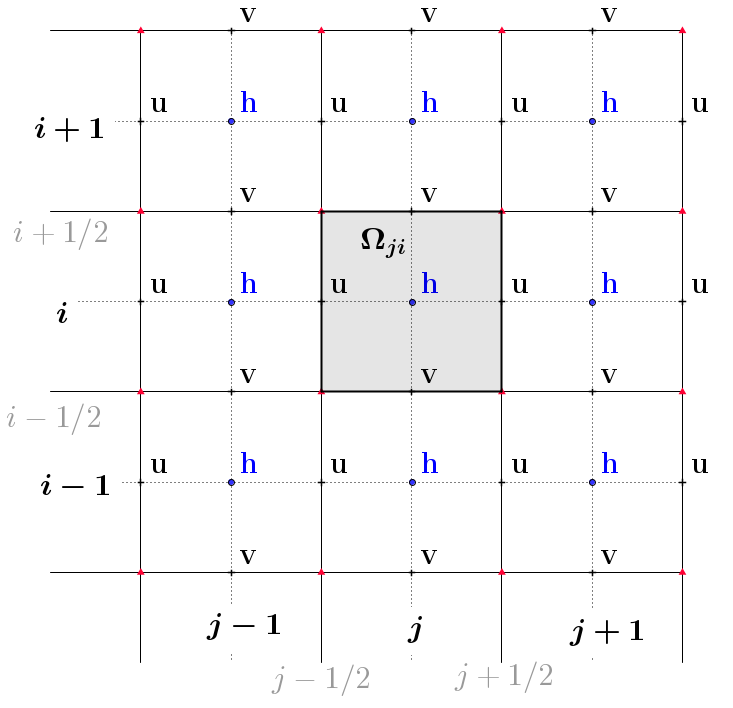

Integramos a equação e dividimos ela pela área do volume de controle,
$$
\frac{1}{|\Omega_{ji}|} \int_{\Omega_{ji}}\frac{\partial h }{\partial t}\, dA = - \frac{1}{|\Omega_{ji}|}\int_{\Omega_{ji}} \nabla\cdot (h\vec{v}) \, dA,
$$
onde $dA$ indica o elemento de área (aqui ele é simplesmente $dx\,dy$, mas estamos nos preparando para estudar isso na esfera!) e $|\Omega_{ji}|$ é a área do volume de controle (aqui simplesmente dado por $\Delta x \Delta y$). Assim, temos que

$$
\frac{\partial H_{ji} }{\partial t} = - \int_{\Omega_{ji}} \nabla\cdot (h\vec{v}) \, dA,
$$
onde
$$
H_{ji}(t) = \frac{1}{|\Omega_{ji}|}\int_{\Omega_{ji}} h(t,x,y) \, dA
$$

👉 Agora vamos invocar um dos principais teoremas usados em Volumes Finitos, que tem muitos nomes, dependendo do contexto :
* Teorema fundamental do cálculo: em 1D
* Teorema da Divergência: em 2D ou em superfícies
* Teorema de Gauss ou Ostrogradsky: em 3D
* Teorema de Stokes: quando usamos formas diferenciais e variadades

Da parte que nos interessa no momento, o Teorema da Divergência diz que
$$
\int_{\Omega_{ji}} \nabla\cdot (h\vec{v}) \, dA = \int_{\partial \Omega_{ji}} h\vec{v}\cdot \vec{n} \, dl,
$$
isto é, a integral de área do divergente de um campo vetorial é equivalente a integral de linha sobre o bordo do domínio do produto do campo com o vetor normal ao bordo ($\partial \Omega$).

Vamos digerir isso, pois no plano, isso ainda é factível.

No plano, temos que
$$
\int_{\Omega_{ji}} \nabla\cdot (h\vec{v}) \, dA = \int_{x_{j-1/2}}^{x_{j+1/2}}\int_{y_{i-1/2}}^{y_{i+1/2}} \left(\frac{\partial  (h u) } {\partial x} + \frac{\partial  (h v) } {\partial y} \right)  dy\, dx,
$$

que pode ser aberto em duas partes, e podemos trocar a ordem das integrais em uma das partes
$$
 \int_{\Omega_{ji}} \nabla\cdot (h\vec{v}) \, dA = \int_{y_{i-1/2}}^{y_{i+1/2}}\int_{x_{j-1/2}}^{x_{j+1/2}} \frac{\partial  (h u) } {\partial x} dx\,dy + \int_{x_{j-1/2}}^{x_{j+1/2}}\int_{y_{i-1/2}}^{y_{i+1/2}} \frac{\partial  (h v) } {\partial y}  dy\, dx
$$
e portanto obtemos, pelo Teorema Fundamental do Cálculo em 1D,
$$
 \int_{\Omega_{ji}} \nabla\cdot (h\vec{v}) \, dA = \int_{y_{i-1/2}}^{y_{i+1/2}}\left( hu(x_{j+1/2}, y) - hu(x_{j-1/2}, y) \right)dy  + \int_{x_{j-1/2}}^{x_{j+1/2}} \left( hv( x, y_{i+1/2}) - hv(x, y_{i-1/2}, y) \right) dx.
$$

Definimos agora o nosso fluxo zonal (assim como tínhamos anteriormente, na equação de advecção!):
$$
U_{j-1/2, i} = \int_{y_{i-1/2}}^{y_{i+1/2}} h(x_{j-1/2}, y) u(x_{j-1/2}, y) dy
$$
(ver figura abaixo, com arestas marcadas em verde), e analogamente nosso fluxo meridional
$$
V_{j, i-1/2} = \int_{x_{j-1/2}}^{x_{j+1/2}} h(x, y_{i-1/2}) v(x, y_{i-1/2}) dx
$$

e portanto chegamos que
$$
 \int_{\Omega_{ji}} \nabla\cdot (h\vec{v}) \, dA = (U_{j+1/2, i} - U_{j-1/2, i}) + (V_{j, i+1/2} - V_{j, i-1/2})
$$





Vamos verificar o outro lado do Teorema, considerando que o vetor normal $\vec{v}$ tem valores dependendo da aresta em questão $\vec{n}_N=(0,1)$, $\vec{n}_E=(1,0)$, $\vec{n}_W=(-1,0)$ e $\vec{n}_S=(0,-1)$, onde os sub-índices indicam Norte, Leste, Oeaste e Sul.

$$
 \int_{\partial \Omega_{ji}} h\vec{v}\cdot \vec{n} \, dl = \int_{\partial \Omega_{ji}} h \, (u,v) \cdot \vec{n} \, dl
$$

$$
  =  
    \int_{y_{i-1/2}}^{y_{i+1/2}} h(x_{j+1/2}, y) u(x_{j+1/2}, y) dy \quad \text {(Leste)} \\
   - \int_{y_{i-1/2}}^{y_{i+1/2}} h(x_{j-1/2}, y) u(x_{j-1/2}, y) dy \quad \text {(Oeste)} \\
   + \int_{x_{j-1/2}}^{x_{j+1/2}} h(x, y_{i+1/2}) v(x, y_{i+1/2}) dx\quad \text {(Norte)} \\
   - \int_{x_{j-1/2}}^{x_{j+1/2}} h(x, y_{i-1/2}) v(x, y_{i-1/2}) dx\quad \text {(Sul)}
$$
logo temos que
$$
 \int_{\partial \Omega_{ji}} h\vec{v}\cdot \vec{n} \, dl = (U_{j+1/2, i} - U_{j-1/2, i}) + (V_{j, i+1/2} - V_{j, i-1/2})
$$

Na prática, geralmente não conseguimos derivar o método a partir da integral de área do divergente, e por isso usamos o Teorema e a integral de linha no bordo.

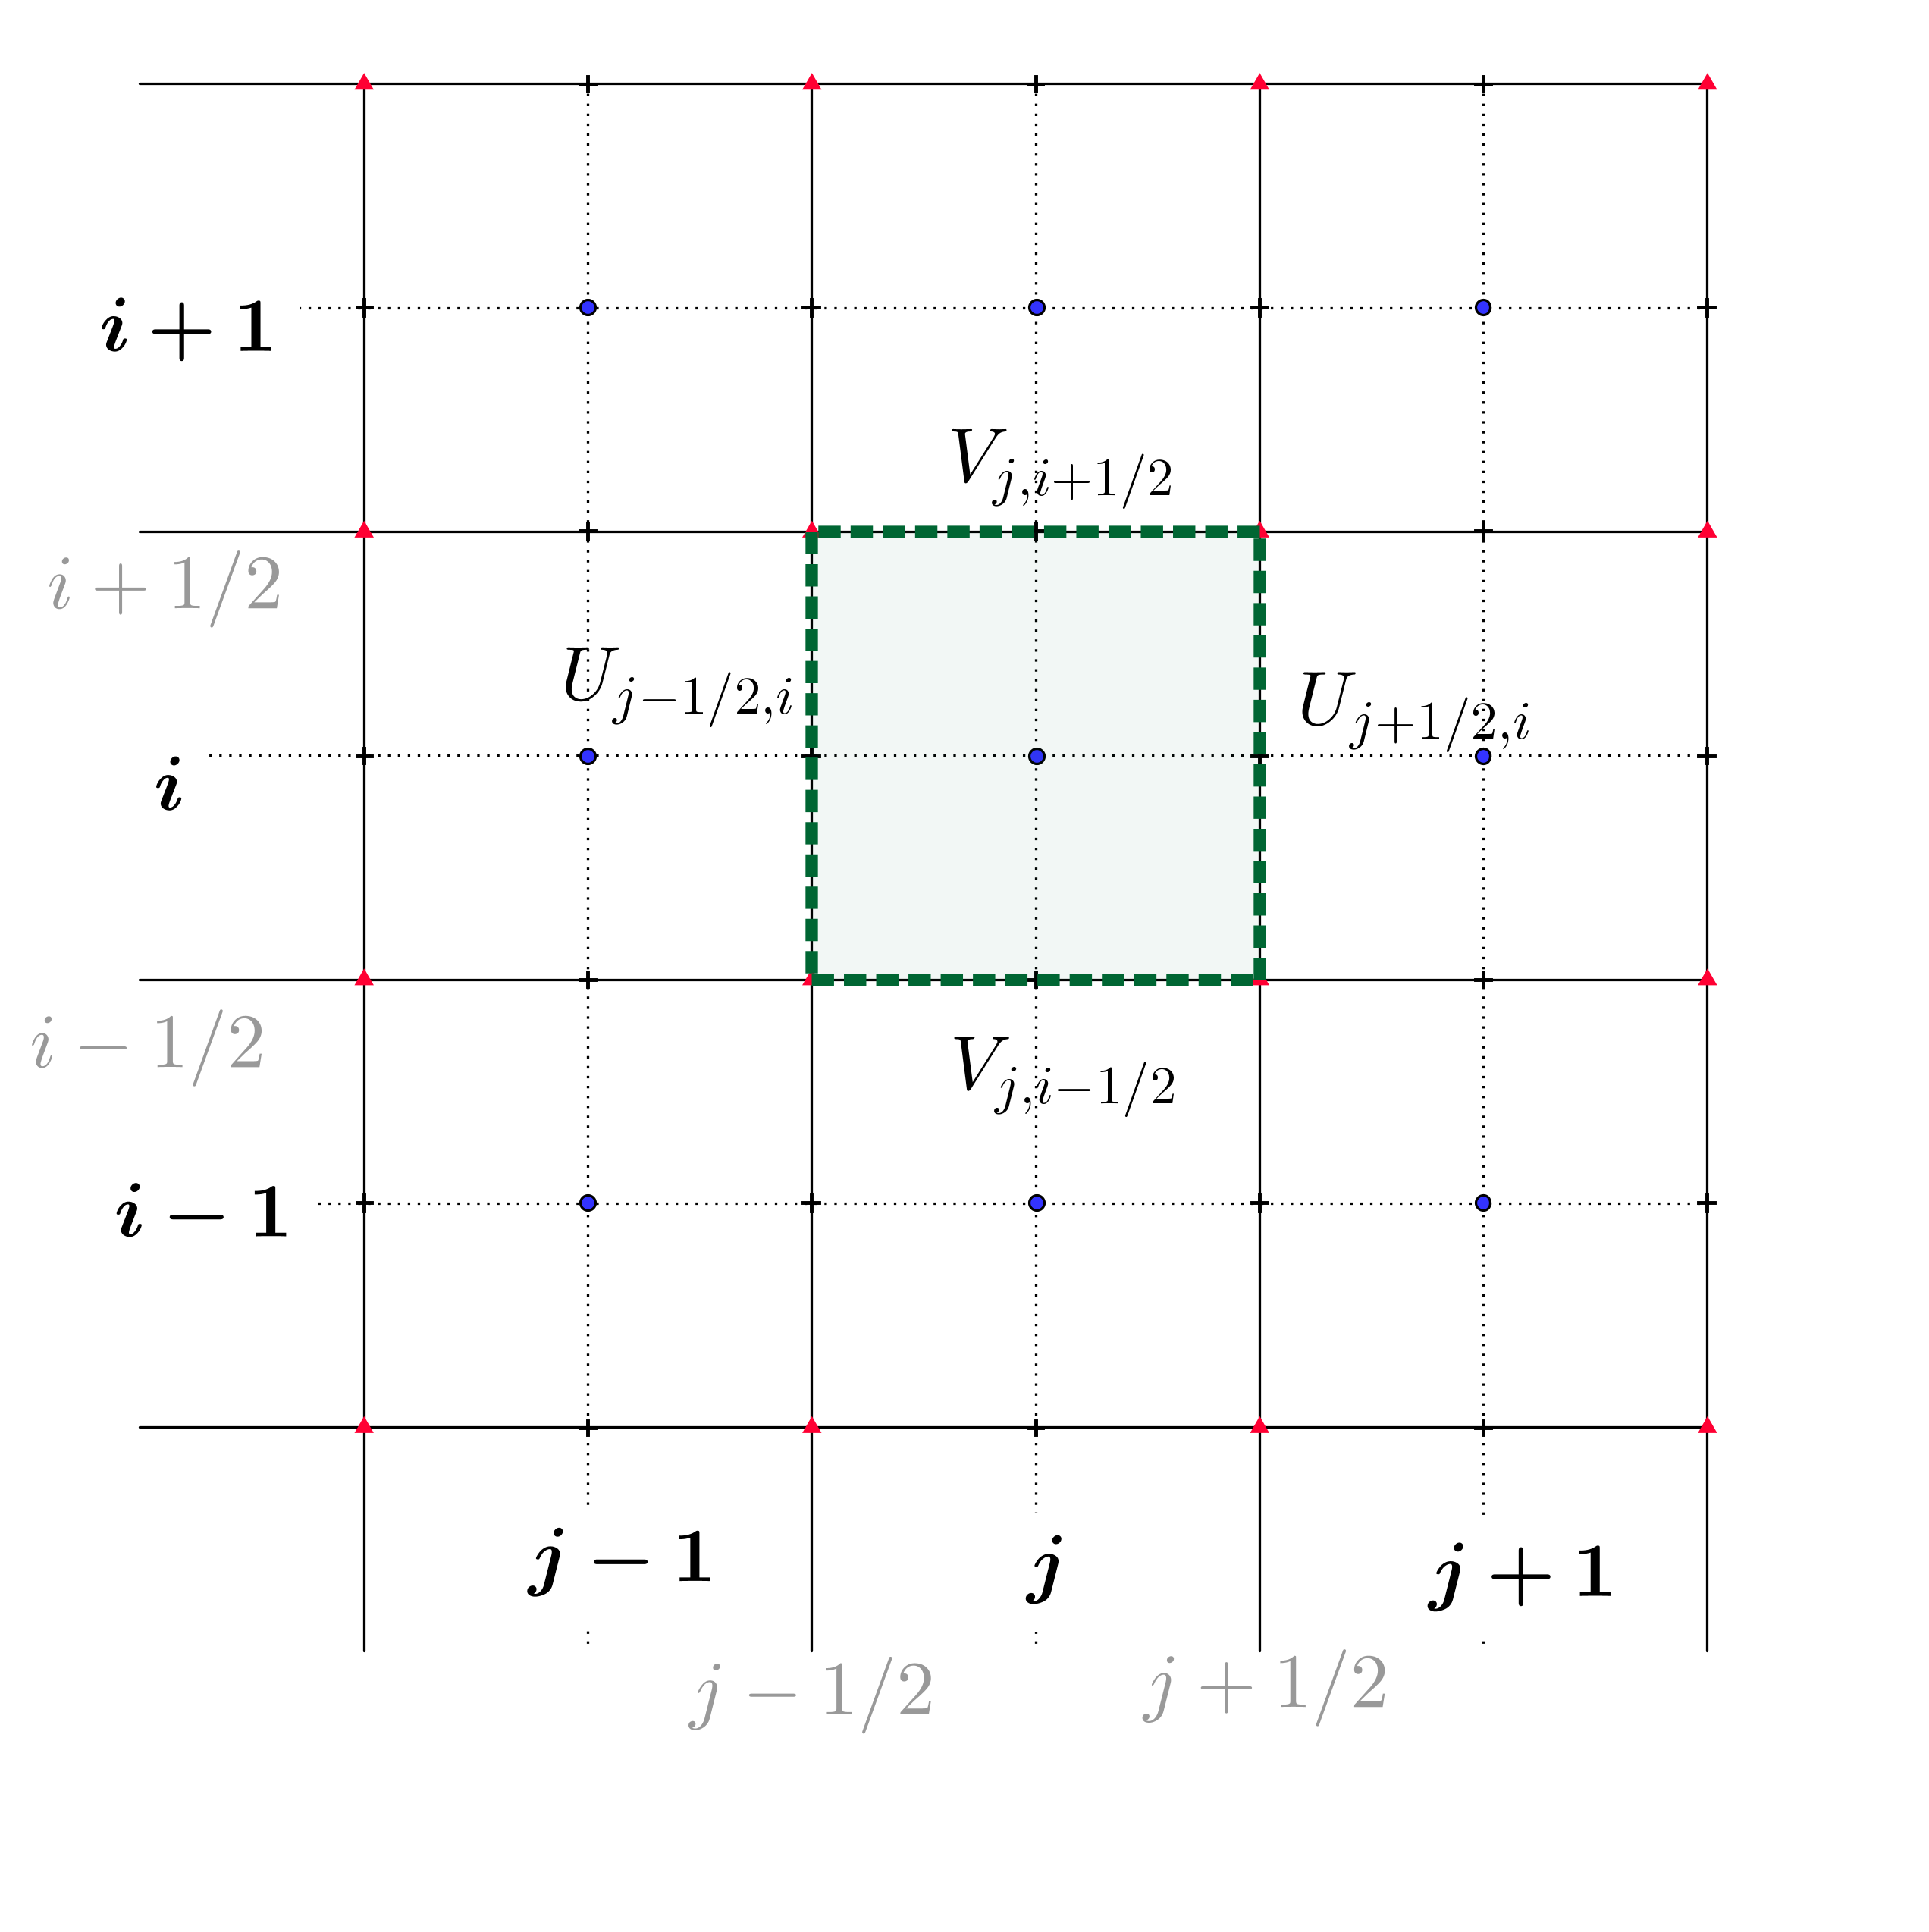

Retornando à equação, temos
$$
\frac{\partial H_{ji} }{\partial t} = - \frac{1}{|\Omega_{ji}|}\int_{\Omega_{ji}} \nabla\cdot (h\vec{v}) \, dA = - \frac{1}{|\Omega_{ji}|}\int_{\partial \Omega_{ji}} h\vec{v}\cdot \vec{n} \, dl \\= \frac{1}{|\Omega_{ji}|}(U_{j+1/2, i} - U_{j-1/2, i}) + \frac{1}{|\Omega_{ji}|}(V_{j, i+1/2} - V_{j, i-1/2}).
$$

A área da célula pode ser expressa como $|\Omega_{ji}|=\Delta x \Delta y$, então nossa equação resulta em

$$
\frac{\partial H_{ji} }{\partial t} =  \frac{1}{\Delta y}\frac{U_{j+1/2, i} - U_{j-1/2, i}}{\Delta x} + \frac{1}{\Delta x}\frac{V_{j, i+1/2} - V_{j, i-1/2}}{\Delta y}.
$$

👉 Até aqui, não há aproximação!!! Essa equação é uma versão exata da evolução da média da altura do fluido em função dos fluxos exatos.

As aproximações:
* $H_{ji}\approx h_{ji}$: A altura média é aproximada pela altura pontual no centro da célula.
* $U_{j\pm 1/2, i} \approx \Delta x \, h_{j\pm 1/2, i} u_{j\pm 1/2, i}$ : O fluxo integrado é aproximado pelo fluxo no meio da aresta, vezes o tamanho da aresta
* $V_{j, i\pm 1/2} \approx \Delta y \, h_{j, i\pm 1/2} v_{j, i\pm 1/2}$ : O fluxo integrado é aproximado pelo fluxo no meio da aresta, vezes o tamanho da aresta

Por fim, chegamos a nossa equação aproximada,
$$
\frac{\partial h_{ji} }{\partial t} =  \frac{h_{j + 1/2, i} u_{j+ 1/2, i} - h_{j- 1/2, i} u_{j- 1/2, i}}{\Delta x} + \frac{h_{j, i + 1/2} v_{j, i + 1/2} - h_{j, i- 1/2} v_{j, i- 1/2}}{\Delta y}.
$$
que pode ser escrita na nossa notação de diferenças finitas, lembrando que

* $$ (\delta_x u)_j = \frac{u_{j+1/2}-u_{j-1/2}}{\Delta x} $$

* $$ (\delta_x h)_{j+ 1/2} = \frac{h_{j+ 1}-h_{j}}{\Delta x} $$

* $$ (\overline u^x)_j = \frac{u_{j+1/2}+u_{j-1/2}}{2} $$

* $$ (\overline   h^x)_{j+ 1/2} = \frac{h_{j+ 1}+h_{j}}{2} $$

com análogos para $y$ (indice $i$), como
$$
\frac{\partial h }{\partial t} =  \delta_x (hu) + \delta_y (hv) .
$$

👉 Há um problema nessa dedução, pois não conhecemos o campo $h$ nas arestas! Portanto, para fazermos o produto $hu$ ou $hv$ temos que interpolar o $h$ para as arestas. Fazemos isso pegando simplesmente a média dos vizinhos.

$$
\frac{\partial h }{\partial t} =  \delta_x (\overline h^x u) + \delta_y (\overline h^y v) .
$$

Essa é nossa discretização da equação de continuidade por Volumes Finitos clássicos. Note que, neste caso, ela coincide com uma discretização clássica de Diferenças Finitas!

Vejamos no paper do Sadourny 1975 o que ele propõe:

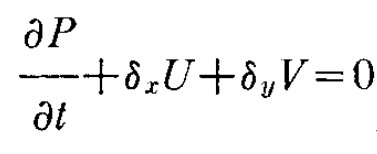

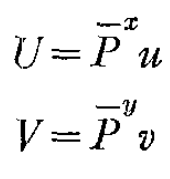

Ressaltando que no paper o $P$ dele é o nosso $h$.



---




Agora precisamos discretizar a equação do momento. Vamos fazer isso na forma de vetor invariante:
> SWE na forma de Vetor Invariante:
$$ \frac{\partial \vec{v}}{\partial t} + q \vec{k}\times (h\vec{u}) =-\nabla B$$

Lembrando que $\vec{v}=(u,v)$,
$$\zeta = \vec{k}\cdot(\nabla\times\vec{v}) = (\partial_xv-\partial_yu), \quad\quad \omega_a = \zeta+f $$

Kinetic energy:
$$ K= \frac{1}{2} \left( \vec{v}\cdot\vec{v}\right) = \frac{1}{2}(u^2+v^2)$$

Bernoulli potential:
$$B=K+g(h+\eta_b)$$




>$$ \frac{\partial u}{\partial t} - q\, (hv) =-\frac{\partial B}{\partial x} $$

>$$ \frac{\partial v}{\partial t} + q\, (hu) =-\frac{\partial B}{\partial y} $$



Vamos seguir a forma de dedução que será depois relevante para o modelo MPAS. Para tanto, vamos fazer o produto da equação vetorial com a normal das arestas. Isso define o que conhecido como malha C, guardando apenas as componentes normais do ventos, nas respectivas arestas.

Porém, para preservar a noção de Volumes Finitos, nosso vento deve ter uma interpretação integral também!!!

Vamos precisar definir o conceito de **"Dual"** de malha. No caso das arestas, definimos uma aresta como a representada abaixo em verde:



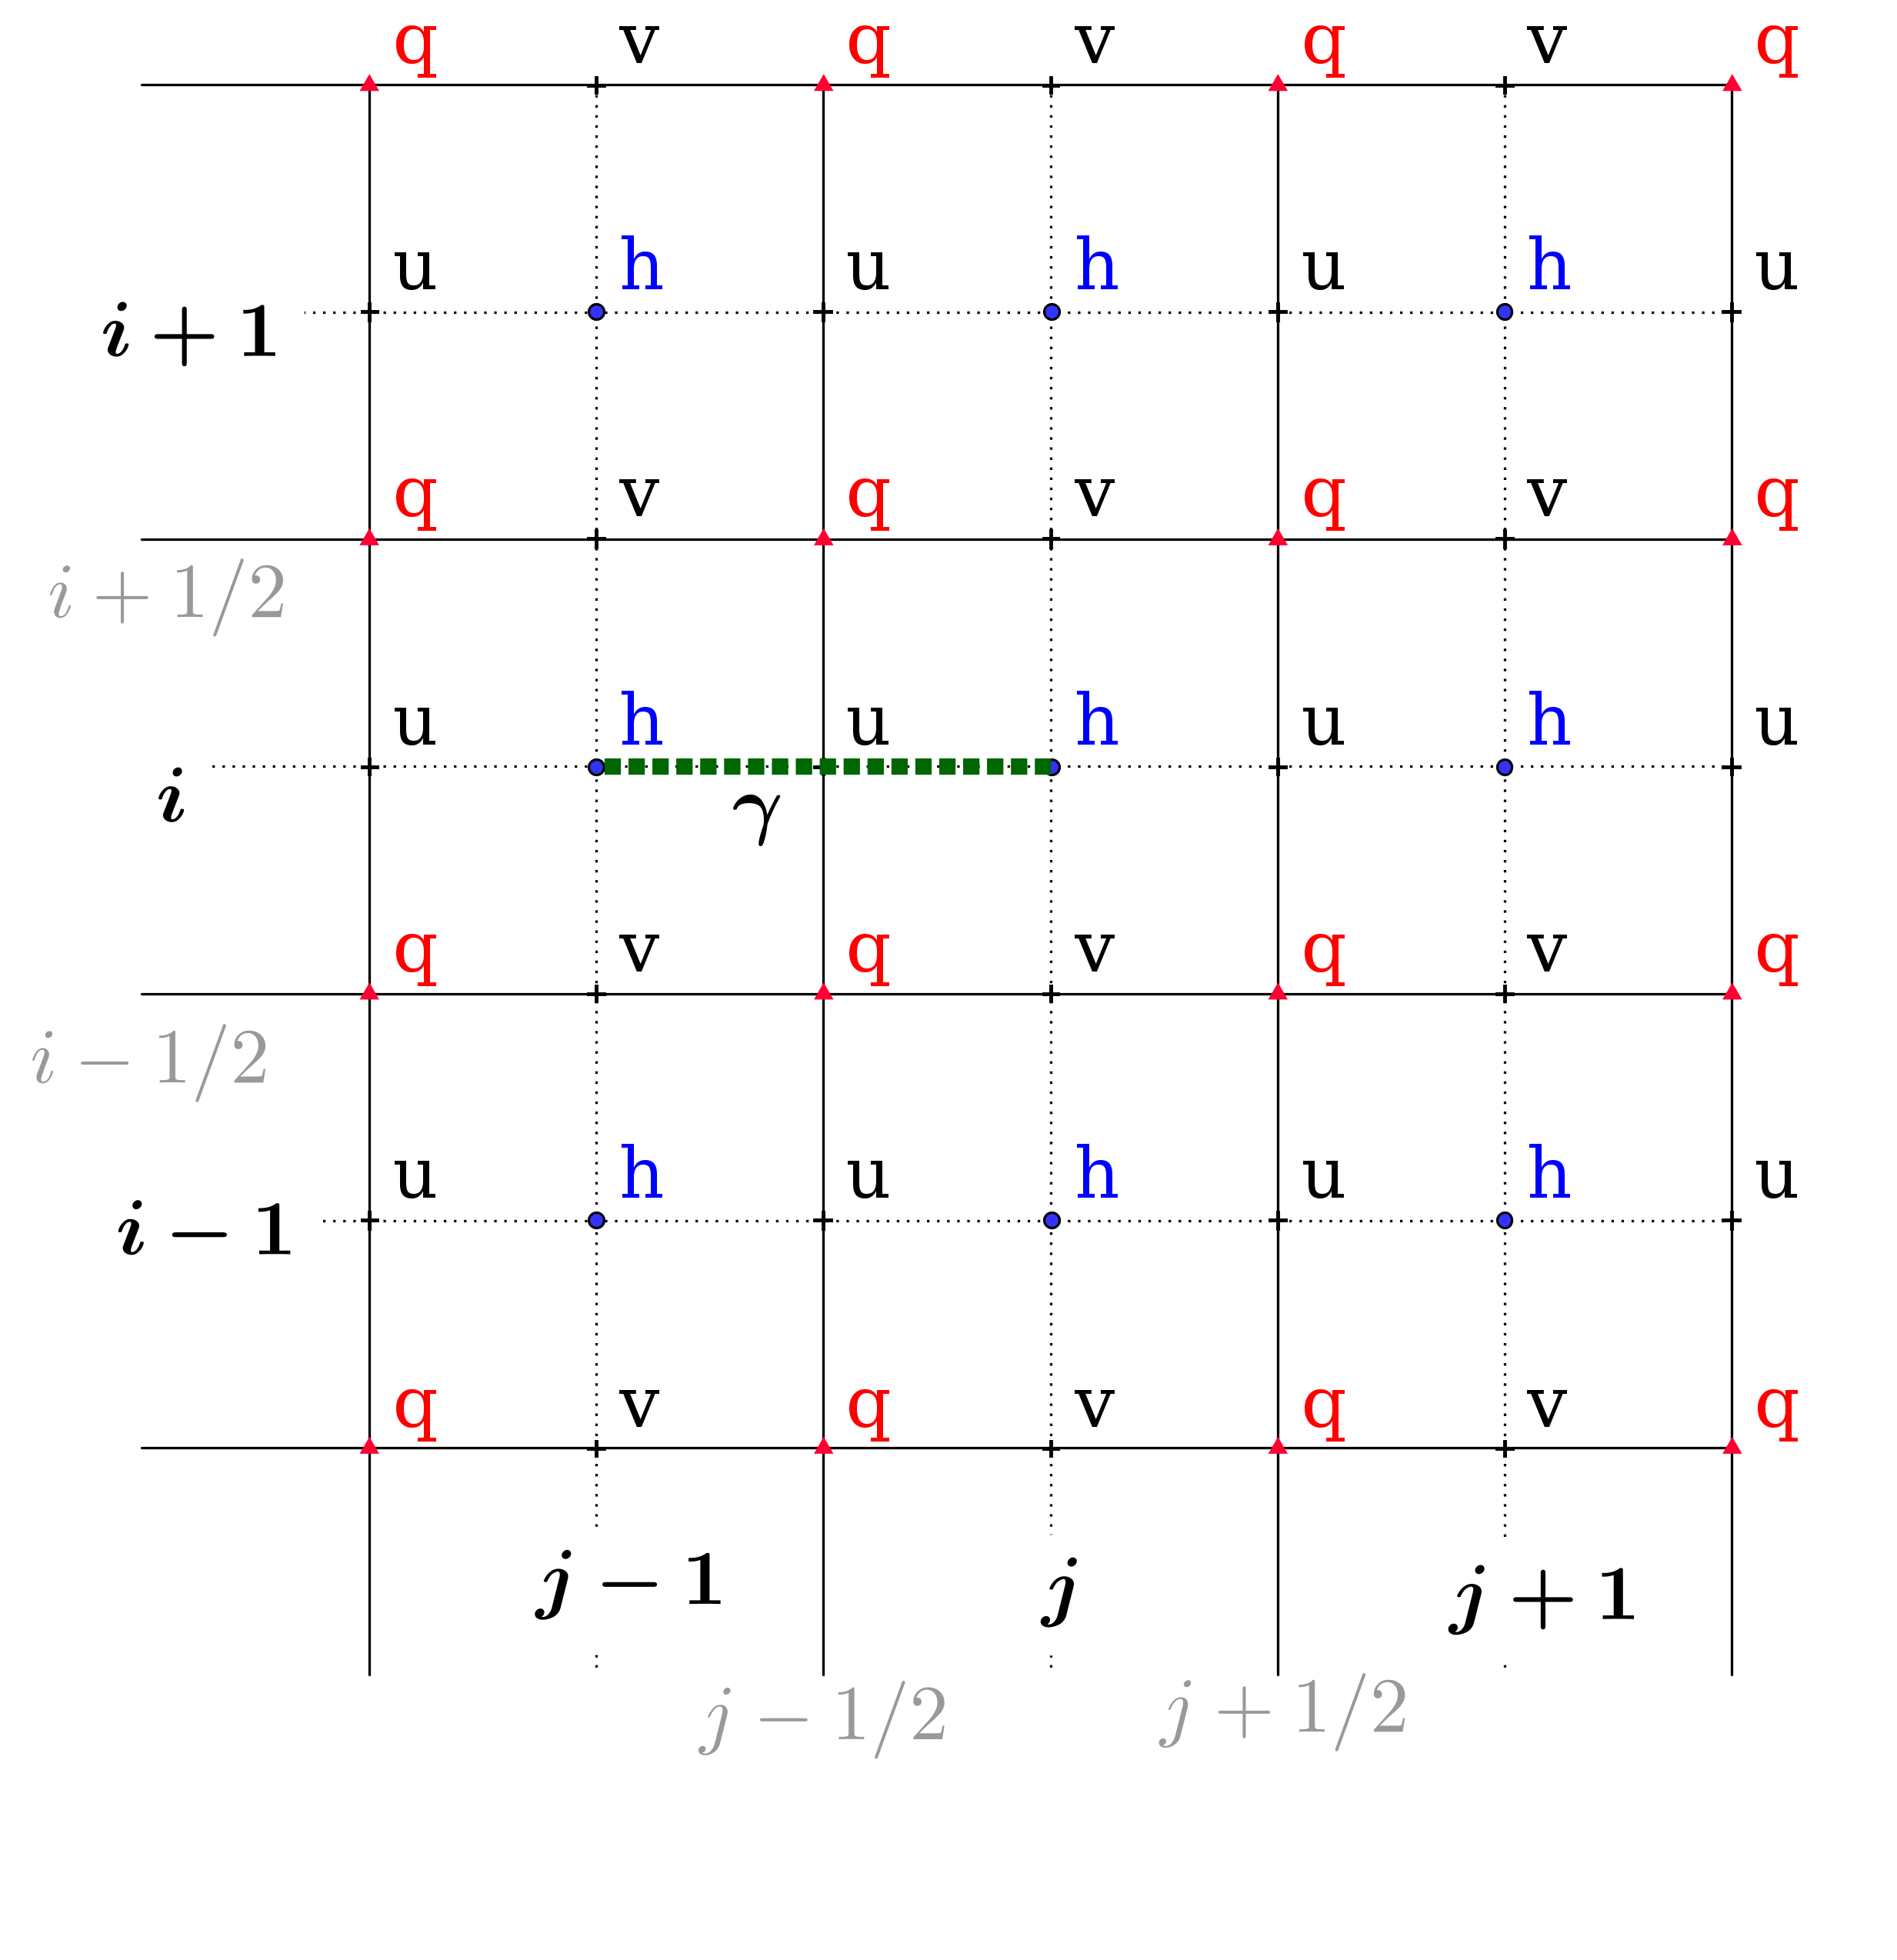

Vamos integrar a equação do momento em relação a arestas duais como essa $\gamma$ representada na figura. A normal em relação a aresta primal é a tangente da aresta dual! Resumindo:
* Multiplicamos a equação pela normal da aresta da célula de Volume Controle (aresta primal). Essa normal é equivalente a tangente da respectiva aresta dual.
* Integramos a equação em relação a aresta dual

Assim, temos


$$ \int_{\gamma} \frac{\partial \vec{v} \cdot \vec{n}}{\partial t}\,dl + \int_{\gamma} q (\vec{k}\times (h\vec{u}) )\cdot \vec{n}\, dl =-\int_{\gamma} \nabla B \cdot \vec{n}\, dl, $$
 Essa forma de representar a equação será importante mais adiante. Aqui, no plano, podemos simplificar muito a equação usando as coordenadas cartesianas.

Considerando as arestas onde moram os ventos zonais, na parte leste do Volume de Controle, temos
$$ \frac{1}{\Delta x}\int_{x_{j-1}}^{x_{j}} \frac{\partial u(t, x, y_i)}{\partial t}dx - \frac{1}{\Delta x}\int_{x_{j-1}}^{x_{j}} q\, (hv) dx =-\frac{1}{\Delta x}\int_{x_{j-1}}^{x_{j}} \frac{\partial B}{\partial x} dx $$
onde mantemos o $y_i$ fixado em todos os campos e também dividimos a equação pelo tamanho da aresta (para ter a noção de média integral).

Agora usamos o Teorema chave de Volumes Finitos no lado direito da equação, aqui expresso pelo Teorema Fundamental do Cálculo, mas que é visto como o Teorema de Gauss para o Gradiente em outros ambientes.

$$ \frac{\partial \frac{1}{\Delta x}\int_{x_{j-1}}^{x_{j}}  u(t, x, y_i) dx}{\partial t} - \frac{1}{\Delta x}\int_{x_{j-1}}^{x_{j}} q\, (hv) dx =-\frac{1}{\Delta x}\left( B_{j, i} - B_{j-1, i} \right).$$

Como antes, agora assumimos que o valor pontual do vento zinal na aresta aproxima a sua média, isto é
$$
u_{j-1/2, i}(t) \approx \int_{x_{j-1}}^{x_{j}}  u(t, x, y_i) dx
$$
e concluímos que
$$ \frac{\partial u_{j-1/2, i}}{\partial t} - \frac{1}{\Delta x}\int_{x_{j-1}}^{x_{j}} q\, (hv) dx =-\frac{1}{\Delta x}\left( B_{j, i} - B_{j-1, i} \right).$$

Nossos próximos desafios:
* Estimar a vorticidade $$\zeta = \vec{k}\cdot(\nabla\times\vec{v}) = (\partial_xv-\partial_yu), \quad\quad \omega_a = \zeta+f $$
* Estimar a vorticidade potencial
$$
q = \omega_a/ h
$$
* Estimar a ernergia cinética
$$ K= \frac{1}{2} \left( \vec{v}\cdot\vec{v}\right) = \frac{1}{2}(u^2+v^2)$$
* Estimar o Bernoulli potential:
$$B=K+g(h+\eta_b)$$

Vamos discutir o caso da Vorticidade, também sob uma ótima de Volumes Finitos.

Considerando que conhecemos os ventos normais às arestas primais, que são ventos tangentes às arestas duais, podemos definir a vorticidade em **Volumes de Controle Duais**. Assim, a vorticidade naturalmente mora nos cantos das células primais, e tem seu prórpio volume de controle, que é uma célula dual. Veja abaixo.

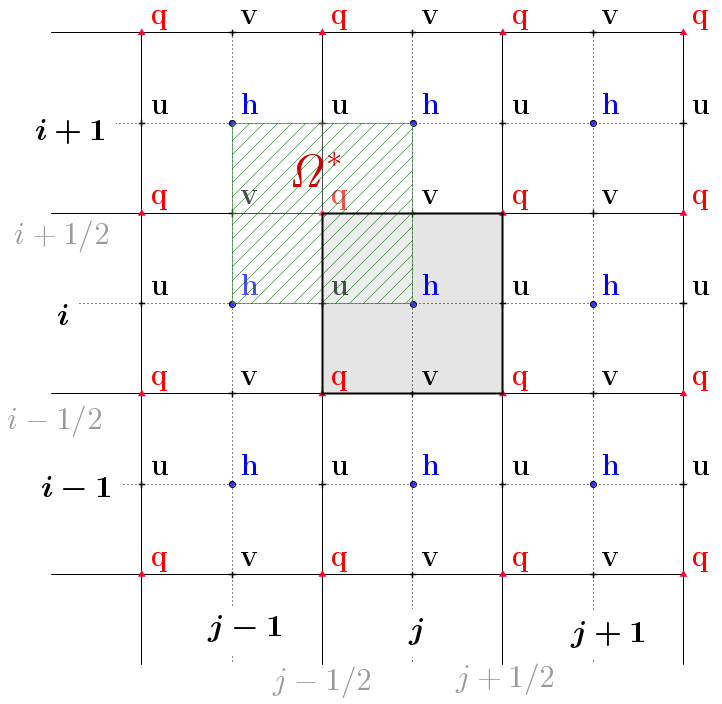

Para estimar a vorticidade, vamos integrá-la na célula dual e dividir pela área dessa célula.
$$\zeta = \vec{k}\cdot(\nabla\times\vec{v})$$
$$\overline \zeta = \frac{1}{|\Omega^*|} \int_{\Omega^*}\zeta\, dA = \frac{1}{|\Omega^*|} \int_{\Omega^*} \vec{k}\cdot(\nabla\times\vec{v}) \, dA,$$
onde $Z$ indica a vorticidade relativa média na célula dual.

Agora podemos usar o Teorema de Gauss para a vorticidade (Teorema da Circulação, ou Stokes para vorticidade https://glossary.ametsoc.org/wiki/Stokes%27s_theorem), que diz que a integral de área pode transformada em uma integral de contorno.
$$\overline \zeta= \frac{1}{|\Omega^*|} \int_{\Omega^*} \vec{k}\cdot(\nabla\times\vec{v}) \, dA = \frac{1}{|\Omega^*|} \int_{\partial \Omega^*} \vec{v}\cdot \vec{t}\, dl , $$
onde $\vec{t}$ é vetor tangente ao bordo no sentido anti-horário.


Na prática, podemos fazer análogo ao feito para o divergente, mas agora com componentes tangentes. Curiosamente, como estamos em uma célula duas, as tangentes são justamente as normais das células primais!

$$\overline \zeta = \frac{1}{|\Omega^*|} \int_{\partial \Omega^*} \vec{v}\cdot \vec{t}\, dl\\
  =  
   \frac{1}{\Delta x\Delta y} \int_{y_{i}}^{y_{i+1}}  v(x_{j}, y) dy \quad \text {(Leste)} \\
   - \frac{1}{\Delta x\Delta y}\int_{y_{i}}^{y_{i+1}} v(x_{j-1}, y) dy \quad \text {(Oeste)} \\
   - \frac{1}{\Delta x\Delta y}\int_{x_{j-1}}^{x_{j}} u(x, y_{i+1}) dx\quad \text {(Norte)} \\
   + \frac{1}{\Delta x\Delta y}\int_{x_{j-1}}^{x_{j}} u(x, y_{i}) dx\quad \text {(Sul)}
$$

Notem os sinais usados na decomposição da integral, por conta da orientação de $u$ e $v$ em relação ao sentido anti-horário de integração de linha.

Se assumirmos que o valor pontual do vento é uma boa aproximação do vento médio nessas arestas, isto é,
$$
v_{j, i+1/2} \approx \frac{1}{\Delta y} \int_{y_{i}}^{y_{i+1}}  v(x_{j}, y) dy,
$$
$$
u_{j-1/2, i} \approx \frac{1}{\Delta x} \int_{x_{j-1}}^{x_{j}}  u(x, y_{i}) dx,
$$
e analogamente para os outros termos, então temos a seguinte aproximação para vorticidade definida nos centros das células duais:
$$\overline \zeta_{j-1/2, i+1/2} \approx
   \frac{1}{\Delta x } \left(v_{j, i+1/2} - v_{j-1, i+1/2}\right) - \frac{1}{\Delta y } \left(u_{j+1/2, i+1} - u_{j+1/2, i}\right).
$$
Em notação de diferenças finitas, temos que
$$
\overline \zeta \approx  \delta_xv - \delta_yu
$$


Vamos ver alguns desses operadores na prática.

In [ ]:

# SWE numerical method definition
#-----------------------
#  Numerical grid : C-Grid
#
#
#    Structure near corner (0,0)
#
#  yi
#
#           |          .          |         .        |
#  y1      h01--------u01--------h11-------u11------h21----
#           |          .          |         .        |
#           |          .          |         .        |
#  y1/2    v00........q00........v10.......q10......u20...
#           |          .          |         .        |
#           |          .          |         .        |
#  y0      h00--------u00--------h10-------u10------h20----
#
#  i/j     x0        x1/2         x1     x3/2        x2     x5/2      x3     ....  xj
#
#  Double Periodiciy implies that
#   hmi = h0i,  hjm = hj0
#   umi = u0i,  ujm = uj0
#   vmi = v0i,  vjm = vj0
#
#---------------------------------------------

class SWE_2D_num_method:
  def __init__(self, equation = "swe", method = "en_cons", dom = Domain2D(), sw = SWE_2D() ):
    self.equation = equation # Equation set: adv, swe, lin_swe
    self.method = method # Method to use: en_cons, ...
    self.dom = dom       # Discrete domain
    self.sw = sw         # SW2D problem

    #Rough estimate of gravity wave Courant number
    self.c = np.sqrt(sw.g*sw.hbar)*dom.dt/np.sqrt(dom.dx**2+dom.dy**2)

    print("Gravity wave Courant number")
    print(self.c)

  # Numerical operators
  # ----------------------------
  # pos = origin of data
  #   u , v, h, q points
  #-----------------------

  # finite difference in x
  def del_x(self, data, pos = "h"):
    if pos == "h" or pos == "v":
      return (data[:, self.dom.indj_p1] - data[:, self.dom.indj])/self.dom.dx

    else : #pos == "u" or pos == "q":
      return (data[:, self.dom.indj] - data[:, self.dom.indj_m1])/self.dom.dx

  # finite difference in y
  def del_y(self, data, pos = "h"):
    # Flip y data, since it is stored in reverse way in matrix
    data_flip = np.flipud(data)
    if pos == "h" or pos == "u":
      d = (data_flip[self.dom.indi_p1, :] - data_flip[self.dom.indi, :])/self.dom.dy
    else : #pos == "v" or pos == "q":
      d = (data_flip[self.dom.indi, :] - data_flip[self.dom.indi_m1, :])/self.dom.dy

    return np.flipud(d) #unflip data

  # average in x
  def bar_x(self, data, pos = "h"):
    if pos == "h" or pos == "v":
      return (data[:, self.dom.indj_p1] + data[:, self.dom.indj])/2.0

    else : #pos == "u" or pos == "q":
      return (data[:, self.dom.indj] + data[:, self.dom.indj_m1])/2.0

  # average in y
  def bar_y(self, data, pos = "h"):
    # Flip y data, since it is stored in reverse way in matrix
    data_flip = np.flipud(data)
    if pos == "h" or pos == "u":
      d = (data_flip[self.dom.indi_p1, :] + data_flip[self.dom.indi, :])/2.0
    else : #pos == "v" or pos == "q":
      d = (data_flip[self.dom.indi, :] + data_flip[self.dom.indi_m1, :])/2.0

    return np.flipud(d) #unflip data

  # Relative vorticity
  def rel_vort(self, u, v):
    return self.del_x(v, "v")-self.del_y(u, "u")

  # Potential vorticity
  def pot_vort(self, abs_vort, h):
    return abs_vort/self.bar_y(self.bar_x(h, "h"), "u")

  # Kinetic Energy
  def KE(self, u, v):
    return 0.5*(self.bar_x(u*u, "u")+self.bar_y(v*v, "v"))

  # Total Mass
  def TotMass(self, h):
    return np.sum(np.sum(h))

  # Total Energy
  def TotEnergy(self, h, K):
    return np.sum(np.sum(sw.g*h*h+2.0*h*K))*0.5

  # Total Enstrophy
  def TotEnst(self, pvort, h):
    return np.sum(np.sum(pvort*pvort*self.bar_y(self.bar_x(h, "h"), "u")))*0.5


  # Tendencies Calculation
  # RHS of SWE
  # Defines spatial numerical discretization
  # -----------------------------------------

  def tend(self, u, v, h):

    #Tendency in h
    #--------------------
    if self.equation == "lin_adv" or self.equation == "adv":
      htend = - u*self.del_x(h, "u") - v*self.del_y(h, "v") #Similar to upwind for u>0, v>0

    elif self.equation == "nlin_adv" or self.equation == "swe" or self.equation == "nlin_swe":
      uh = self.bar_x(h, "h")*u
      vh = self.bar_y(h, "h")*v
      htend = - self.del_x(uh, "u") - self.del_y(vh, "v")

    elif self.equation == "lin_swe":
      htend = - self.hbar*self.del_x(u, "u") - self.del_y(v, "v")

    else :
      print("Error in numerical method: Unknown equation set")
      return -1

    #Tendency in u
    #--------------------
    if self.equation == "lin_adv" or self.equation == "adv" or self.equation == "nlin_adv":
      utend = np.zeros_like(u)

    elif self.equation == "swe" or self.equation == "nlin_swe":
      K = self.KE(u,v)
      H = self.sw.g*(h + self.sw.eta_b) + K
      abs_vort = self.rel_vort(u, v) + self.sw.f
      q = self.pot_vort(abs_vort, h)
      utend = self.bar_y(q * self.bar_x(vh, "v"), "q") - self.del_x(H, "h")

    elif self.equation == "lin_swe":
      H = self.sw.g*(h + self.sw.eta_b)
      utend = self.bar_y(self.sw.f * self.bar_x(v, "v"), "q") - self.del_x(H, "h")

    else :
      print("Error in numerical method: Unknown equation set")
      return -1

    #Tendency in v
    #--------------------
    if self.equation == "lin_adv" or self.equation == "adv" or self.equation == "nlin_adv":
      vtend = np.zeros_like(v) #- self.bar_x( q * self.bar_y(uh, "u"), "q") - self.del_y(H, "h")

    elif self.equation == "swe" or self.equation == "nlin_swe":

      vtend = - self.bar_x( q * self.bar_y(uh, "u"), "q") - self.del_y(H, "h")

    elif self.equation == "lin_swe":

      vtend = - self.bar_x(self.sw.f * self.bar_y(u, "u"), "q") - self.del_y(H, "h")

    else :
      print("Error in numerical method: Unknown equation set")
      return -1

    return utend, vtend, htend



Domain set up:
 > f =  0.00014584
 > g =  9.80616
 > ini =  0


Precisamos ainda definir como discretizaremos outros termos. Estas seguem um raciocíneo similar ao que fizemos até agora, então vamos direto ao ponto e depois explicamos maiores detalhes.

* Continuidade
$$
\frac{\partial h }{\partial t} =  \delta_x (\overline h^x u) + \delta_y (\overline h^y v) .
$$

* Vorticidade relativa numérica e vorticidade absoluta
$$
\zeta =  (\delta_xv-\delta_yu), \quad\quad \omega_a = \zeta+f
$$

* Vorticidade potencial (Como o $h$ mora nos centros das células, ele precisa ser interpolado para existir nos cantos das células, onde mora a vorticidade)
$$
q = \frac{\zeta}{\overline {\overline h^x}^y}
$$

* Energia cinética
$$ K=  \frac{1}{2}(\overline{u^2}^x+\overline{v^2}^y)$$

* Bernoulli potential:
$$B=K+g(h+\eta_b)$$

Logo, nossa equação do momento agora está quase bem definida, mas falta definir uma discretização para o termo de Coriolis,
$$
\frac{1}{\Delta x}\int_{x_{j-1}}^{x_{j}} q\, (hv) dx
$$

A discretização dessa parte vai depender das propriedades que queremos no esquema. Podemos definir um esquema que conserva energia tomando
* Momento Zonal
$$ \frac{\partial u}{\partial t} -  \overline{q\, \overline{\overline h ^y v}^x} ^y  =-\delta_x B .$$

* Momento Meridional
$$ \frac{\partial v}{\partial t} +  \overline{q\, \overline{\overline h ^x u}^y} ^x  =-\delta_y B .$$

Apesar de termos usado formulações integrais, de Volumes Finitos, o resultado é um esquema discreto idêntico a Diferenças Finitas. De fato, esse método é exatamente o método proposto em Sadourny 1975 para conservação de energia (mas usamos uma notação diferente, nosso $B$ é o $H$).

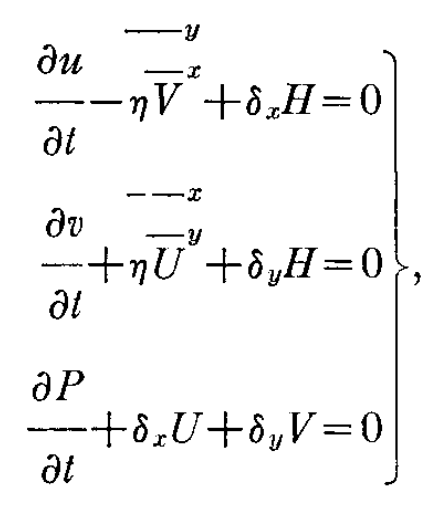

👉 Seria muito mais fácil deduzir diretamente essas equações via diferenças finitas, mas aproveitamos para mostrar os elementos básicos de Volumes Finitos para este caso, onde as coisas simplificam muito e viram diferenças finitas.

In [ ]:
# Validate operators in numerical methods
def validate_numerical_method(nm = SWE_2D_num_method()):

  error_flag = 0

  # Known periodic function
  def f_ref(x,y):
    return np.cos(2*np.pi*x/(nm.dom.Lx))*np.cos(2*np.pi*y/(nm.dom.Ly))

  def del_x_ref(x,y):
    return (f_ref(x+nm.dom.dx/2, y) - f_ref(x-nm.dom.dx/2, y))/nm.dom.dx

  def del_y_ref(x,y):
    return (f_ref(x, y+nm.dom.dy/2) - f_ref(x, y-nm.dom.dy/2))/nm.dom.dy

  def u_ref(x,y):
    return np.cos(2*np.pi*y/(nm.dom.Ly))

  def v_ref(x,y):
    return np.cos(2*np.pi*x/(nm.dom.Lx))

  def h_ref(x,y):
    return 10000*np.power(np.cos(2*np.pi*x/(nm.dom.Lx)), 80)*np.power(np.cos(2*np.pi*y/(nm.dom.Ly)), 80)

  def vort_ref(x,y):
    return (v_ref(x+nm.dom.dx/2, y) - v_ref(x-nm.dom.dx/2, y))/nm.dom.dx - (u_ref(x, y+nm.dom.dy/2) - u_ref(x, y-nm.dom.dy/2))/nm.dom.dy

  #Validate variable in h position
  # Del_x: h -> u positions (equivalent to centred diferences at u points)
  ref_func = f_ref(nm.dom.Xh, nm.dom.Yh)
  delx_ref_func = del_x_ref(nm.dom.Xu, nm.dom.Yu)
  test_func=nm.del_x(ref_func, pos="h")
  if np.max(np.max(np.abs(test_func-delx_ref_func))) > 10e-12:
    error_flag = error_flag + 1
    print("Warning in validation: Del_x operator not matching analytical")
    plot2D(ref_func, pos = "h", dom=dom)
    plot2D(test_func, pos = "u", dom=dom)
    plot2D(test_func-delx_ref_func, pos = "u", dom=dom)

  # Del_y: h -> v positions (equivalent to centred diferences at v points)
  ref_func = f_ref(nm.dom.Xh, nm.dom.Yh)
  dely_ref_func = del_y_ref(nm.dom.Xv, nm.dom.Yv)
  test_func=nm.del_y(ref_func, pos="h")
  if np.max(np.max(np.abs(test_func-dely_ref_func))) > 10e-12:
    error_flag = error_flag + 1
    print("Warning in validation: Del_y operator not matching analytical")
    plot2D(ref_func, pos = "h", dom=dom)
    plot2D(test_func, pos = "v", dom=dom)
    plot2D(test_func-dely_ref_func, pos = "v", dom=dom)

  #Validate variable in u position
  # Del_x: u -> h positions (equivalent to centred diferences at h points)
  ref_func = f_ref(nm.dom.Xu, nm.dom.Yu)
  delx_ref_func = del_x_ref(nm.dom.Xh, nm.dom.Yh)
  test_func=nm.del_x(ref_func, pos="u")
  if np.max(np.max(np.abs(test_func-delx_ref_func))) > 10e-12:
    error_flag = error_flag + 1
    print("Warning in validation: Del_x operator not matching analytical")
    plot2D(ref_func, pos = "u", dom=dom)
    plot2D(test_func, pos = "h", dom=dom)
    plot2D(test_func-delx_ref_func, pos = "h", dom=dom)


  # Del_y: u -> q positions (equivalent to centred diferences at q points)
  ref_func = f_ref(nm.dom.Xu, nm.dom.Yu)
  dely_ref_func = del_y_ref(nm.dom.Xq, nm.dom.Yq)
  test_func=nm.del_y(ref_func, pos="u")
  if np.max(np.max(np.abs(test_func-dely_ref_func))) > 10e-12:
    error_flag = error_flag + 1
    print("Warning in validation: Del_y operator not matching analytical")
    plot2D(ref_func, pos = "u", dom=dom)
    plot2D(test_func, pos = "q", dom=dom)
    plot2D(test_func-dely_ref_func, pos = "q", dom=dom)

  #Validate variable in v position
  # Del_x: v -> q positions (equivalent to centred diferences at q points)
  ref_func = f_ref(nm.dom.Xv, nm.dom.Yv)
  delx_ref_func = del_x_ref(nm.dom.Xq, nm.dom.Yq)
  test_func=nm.del_x(ref_func, pos="v")
  if np.max(np.max(np.abs(test_func-delx_ref_func))) > 10e-12:
    error_flag = error_flag + 1
    print("Warning in validation: Del_x operator not matching analytical")
    plot2D(ref_func, pos = "v", dom=dom)
    plot2D(test_func, pos = "q", dom=dom)
    plot2D(test_func-delx_ref_func, pos = "q", dom=dom)


  # Del_y: v -> h positions (equivalent to centred diferences at h points)
  ref_func = f_ref(nm.dom.Xv, nm.dom.Yv)
  dely_ref_func = del_y_ref(nm.dom.Xh, nm.dom.Yh)
  test_func=nm.del_y(ref_func, pos="v")
  if np.max(np.max(np.abs(test_func-dely_ref_func))) > 10e-12:
    error_flag = error_flag + 1
    print("Warning in validation: Del_y operator not matching analytical")
    plot2D(ref_func, pos = "v", dom=dom)
    plot2D(test_func, pos = "h", dom=dom)
    plot2D(test_func-dely_ref_func, pos = "h", dom=dom)

  # Vorticity
  ref_u = u_ref(nm.dom.Xu, nm.dom.Yu)
  ref_v = v_ref(nm.dom.Xv, nm.dom.Yv)
  vort_func = vort_ref(nm.dom.Xq, nm.dom.Yq)
  test_func=nm.rel_vort(ref_u, ref_v)
  if np.max(np.max(np.abs(test_func-vort_func)))/np.max(np.max(np.abs(vort_func))) > 10e-12:
    error_flag = error_flag + 1
    print("Warning in validation: vort operator not matching analytical")
    plot2D(ref_u, pos = "u", dom=dom)
    plot2D(ref_v, pos = "v", dom=dom)
    plot2D(test_func, pos = "q", dom=dom)
    plot2D(vort_func, pos = "q", dom=dom)

  #Tendency
  #ref_u = u_ref(nm.dom.Xu, nm.dom.Yu)
  #ref_v = v_ref(nm.dom.Xv, nm.dom.Yv)
  #ref_h = h_ref(nm.dom.Xh, nm.dom.Yh)
  #tu, tv, th = nm.tend( ref_u, ref_v, ref_h)
  #plot2D(ref_u, pos = "u", dom=dom)
  #plot2D(ref_v, pos = "v", dom=dom)
  #plot2D(ref_h, pos = "h", dom=dom)
  #plot2D(th, pos = "h", dom=dom)

  if error_flag == 0:
    print("Numerical validation: Passed! ")
    return
  else:
    print("Numerical validation: Failed! ")
    return

Gravity wave Courant number
0.033188167252486446


Vamos validar os operadores que construímos.

Calculating dx based on given mx. dx =  200157.7794640436
Calculating dy based on given my. dy =  200157.7794640436
Domain set up:
 > f =  0.00014584
 > g =  9.80616
 > ini =  1
Gravity wave Courant number
0.3982580070298374
Numerical validation: Passed! 



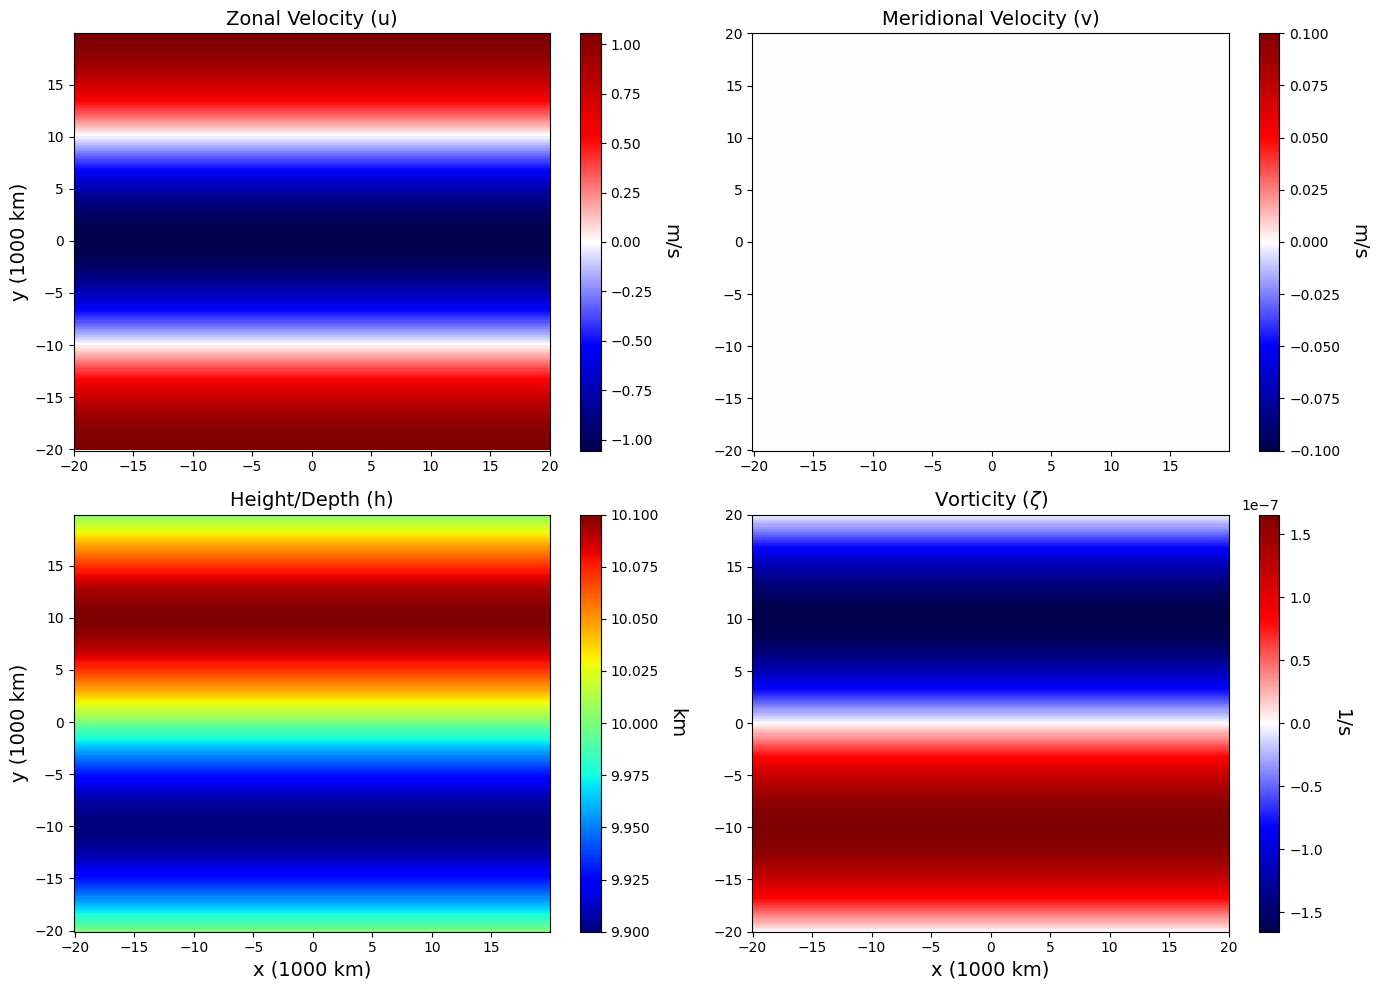

In [ ]:
# Discrete domain construction
dom = Domain2D(t0=0.0, T=12*oneday, xi=-np.pi*erad, xf=np.pi*erad, yi=-np.pi*erad, yf=np.pi*erad, dt=360.0, mx=200, my=200)

# Shallow water 2D problem
sw  = SWE_2D(hbar = 10000.0, f = 2*omega, g = grav, ini = 1, dom = dom)

# Numerical method and operators
p  = SWE_2D_num_method(dom = dom, sw = sw, equation = "swe")

validate_numerical_method(nm = p)
print()
# Plot initial conditions
vort0 = p.rel_vort(sw.u0(),sw.v0())
plot2D_panel(sw.u0(), sw.v0(), sw.h0(), vort0, dom)
plt.show()

### Integração Temporal

Para a integração temporal, vamos usar exatamente o que já tínhamos nas aulas anteriores. Deixamos 2 opções a seguir.

In [ ]:
# Time integration step
#-----------------------

## A single step of the RK33 method
def rk33mpas(u0, v0, h0, num_met):
  # Integrates with RK33 of MPAS - See Wicker & Skamarock 2002
  # Wicker, Louis J., and William C. Skamarock. "Time-splitting methods for elastic models using forward time schemes." Monthly weather review 130, no. 8 (2002): 2088-2097.
  # https://www.atmos.albany.edu/facstaff/rfovell/ATM562/wicker-skamarock-2002.pdf

  #We need this copy as each step uses this baseline
  u = np.copy(u0)
  v = np.copy(v0)
  h = np.copy(h0)

  dt = num_met.dom.dt
  dt_step = [dt/3.0, dt/2.0, dt]
  #dt_step = [dt/2.0, dt] #RK2
  #dt_step = [dt] #euler

  for dts in dt_step: #loop dos estágios RK
    utend, vtend, htend = num_met.tend(u, v, h)
    u = u0 + dts * utend
    v = v0 + dts * vtend
    h = h0 + dts * htend

  return u, v, h #np.copy(u), np.copy(v), np.copy(h)

# A single step of the RK44 method
def rk44(u0, v0, h0, num_met):

  dt = num_met.dom.dt
  utend1, vtend1, htend1 = num_met.tend(u0, v0, h0)
  utend2, vtend2, htend2 = num_met.tend(u0+(dt/2)*utend1, v0+(dt/2)*vtend1, h0+(dt/2)*htend1)
  utend3, vtend3, htend3 = num_met.tend(u0+(dt/2)*utend2, v0+(dt/2)*vtend2, h0+(dt/2)*htend2)
  utend4, vtend4, htend4 = num_met.tend(u0+(dt)*utend3, v0+(dt)*vtend3, h0+(dt)*htend3)

  u = u0 + (dt/6)*(utend1 + 2*utend2 + 2*utend3 + utend4)
  v = v0 + (dt/6)*(vtend1 + 2*vtend2 + 2*vtend3 + vtend4)
  h = h0 + (dt/6)*(htend1 + 2*htend2 + 2*htend3 + htend4)

  return u, v, h

In [ ]:
# Main time integration loop
#-----------------------------

def time_int(num_met, plot_ktimes = [0]):


  u = num_met.sw.u0()
  v = num_met.sw.v0()
  h = num_met.sw.h0()

  # Time loop
  for k in range(num_met.dom.nt):
    if k in plot_ktimes:
      print(" ")
      print(" Time iteration k=", k, " corresponds to time = ", num_met.dom.t[k]/oneday, " days")
      plot2D_panel( u, v, h, num_met.rel_vort(u,v), num_met.dom)

    # Update RK33 step
    u, v, h = rk33mpas(u, v, h, num_met)

    # Update RK44
    #u, v, h = rk44(u, v, h, num_met)

  if len(plot_ktimes) >= 1 :
    print(" ")
    print(" Time final iteration k=", k+1, " corresponds to time = ", num_met.dom.t[k+1]/oneday, " days")
    plot2D_panel( u, v, h, num_met.rel_vort(u,v), num_met.dom)

  return u, v, h


### Exemplo

Vejamos um exemplo com condições iniciais dadas de forma similar ao proposto no artigo Peixoto & Schreiber 2019 (SIAM-Sci Comp.):

O campo velocidades é dado por dois jatos zonais em médias latitudes, um de lest-oeste e outro de oeste-leste, com velocidade meriodinal nula,
$$
u^0(x,y) = U_0 (\sin(2\pi y/L_y))^{81} \\
v^0(x,y) = 0
$$
e o campo de altura do fluido está em equilíbrio geotrófico com os jatos, logo


$$
-fv = \frac{\partial h}{\partial x} \\
fu = \frac{\partial h}{\partial y}
$$

e portanto
$$
h^0(x,y) = H_0+\frac{f}{g}\int_{y_{\text{ini}}}^{y}\, u(x,y) dy.
$$

Adicionamos duas pequenas perturbações Gaussianas na altura do fluido coincidindo com as posições de latitudes dos jatos.

Começamos construindo o domínio, definindo o problema e os métodos numéricos.

Calculating dx based on given mx. dx =  200157.7794640436
Calculating dy based on given my. dy =  200157.7794640436
Domain set up:
 > f =  0.00014584
 > g =  9.80616
 > ini =  3
Gravity wave Courant number
0.3982580070298374


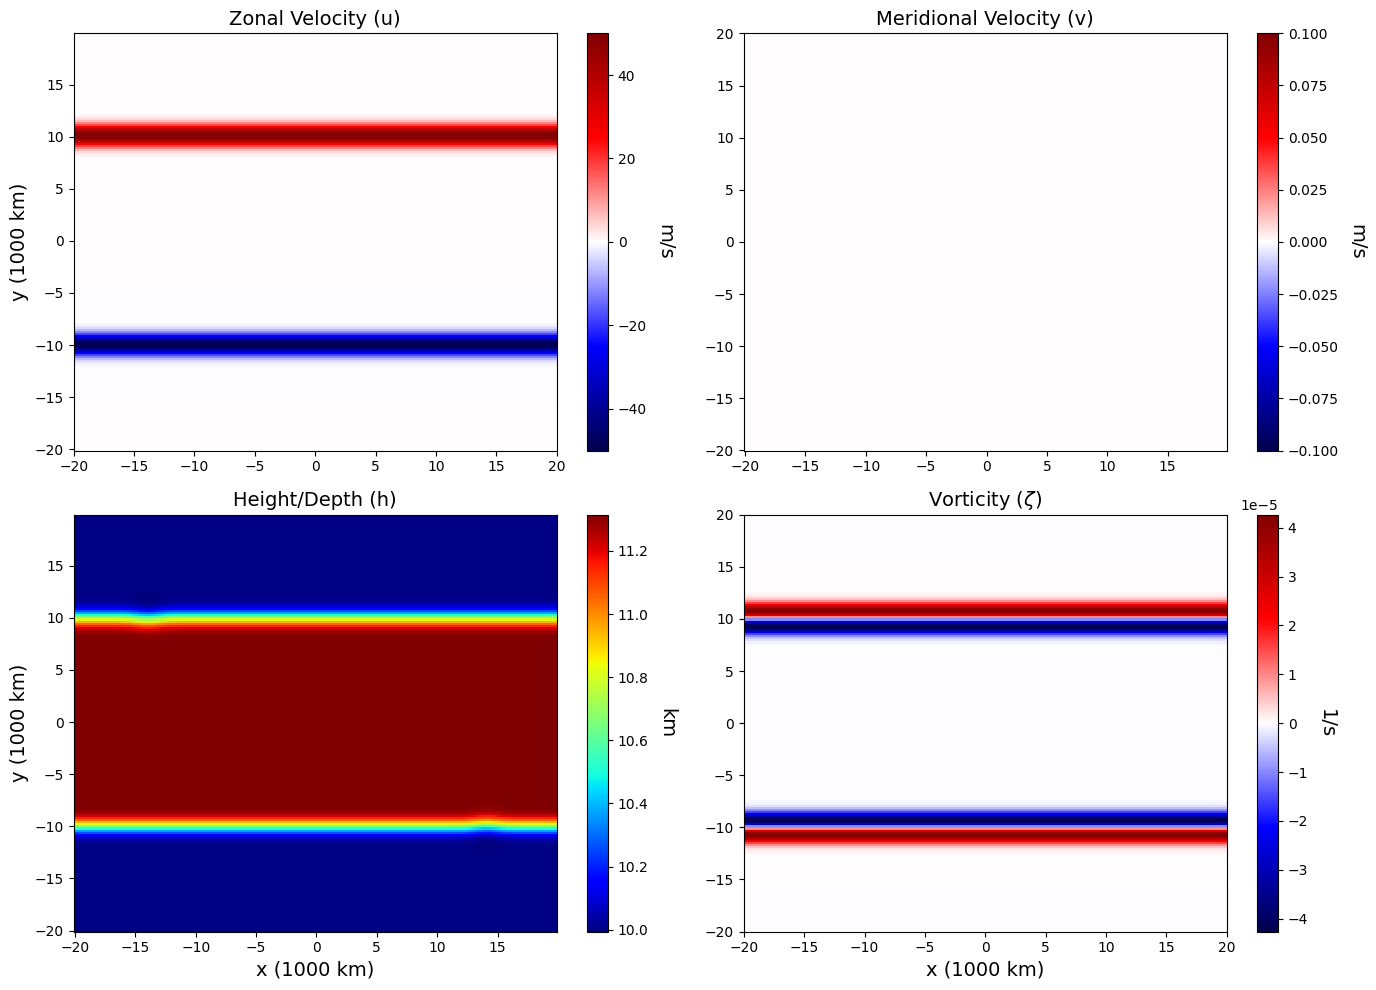

In [ ]:
# Discrete domain construction
dom = Domain2D(t0=0.0, T=12*oneday, xi=-np.pi*erad, xf=np.pi*erad, yi=-np.pi*erad, yf=np.pi*erad, dt=360.0, mx=200, my=200)

# Shallow water 2D problem
sw  = SWE_2D(hbar = 10000.0, f = 2.0*omega, g = grav, ini = 3, dom = dom)

# Numerical method and operators
p  = SWE_2D_num_method(dom = dom, sw = sw, equation = "swe")

# Plot initial conditions
vort0 = p.rel_vort(sw.u0(),sw.v0())
plot2D_panel(sw.u0(), sw.v0(), sw.h0(), vort0, dom)
plt.show()

Agora vamos rodar a simulação com o método de integração temporal!

[   0.  240.  480.  720.  960. 1200. 1440. 1680. 1920. 2160. 2400. 2640.] 2880
 
 Time iteration k= 0  corresponds to time =  0.0  days


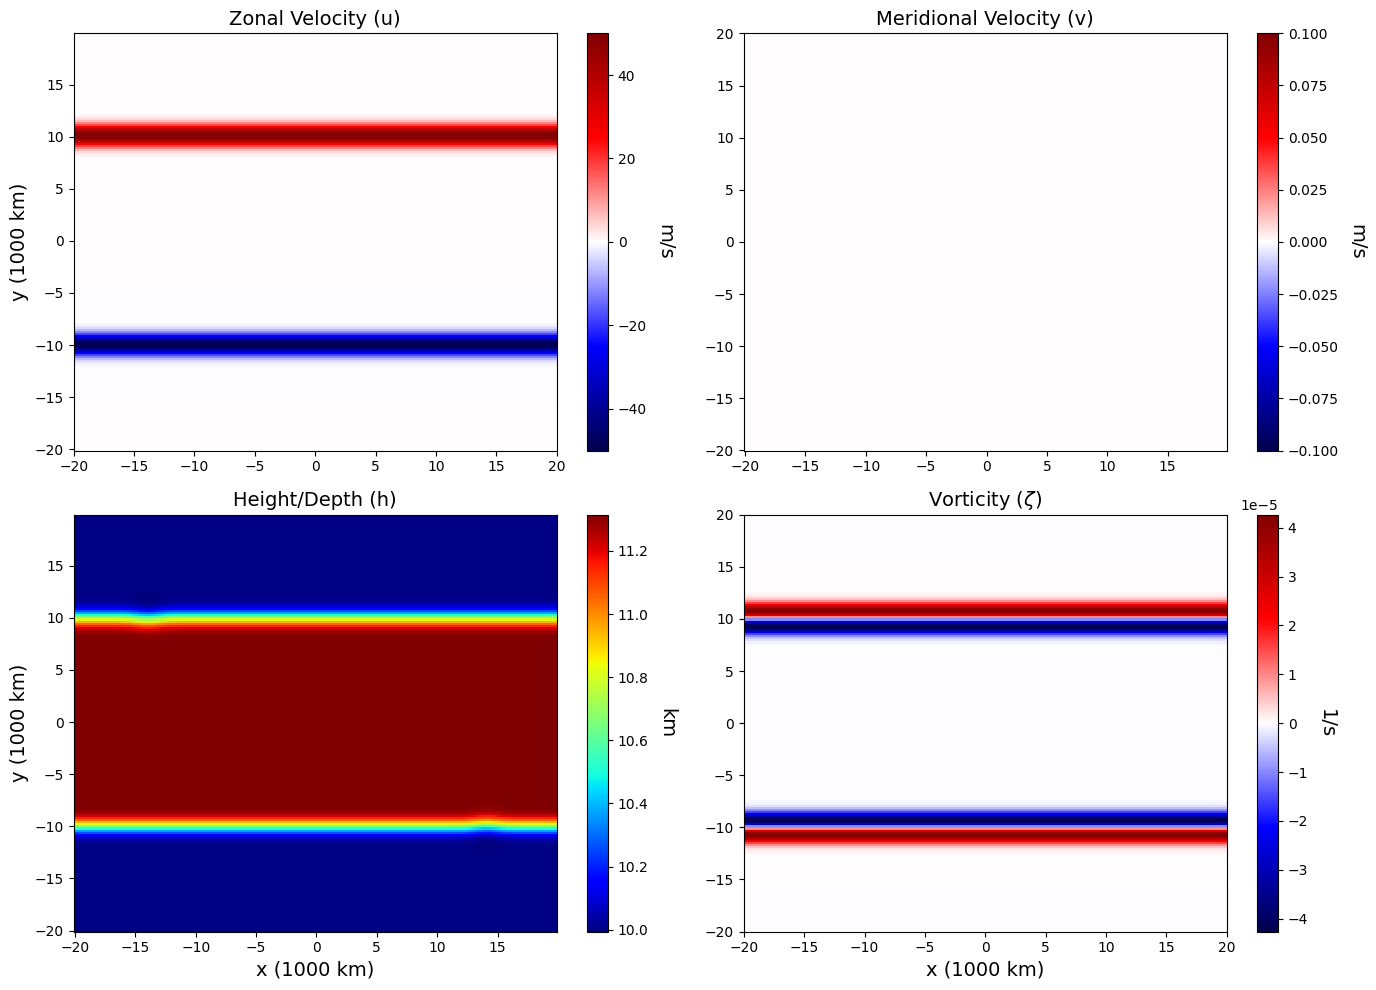

 
 Time iteration k= 240  corresponds to time =  1.0  days


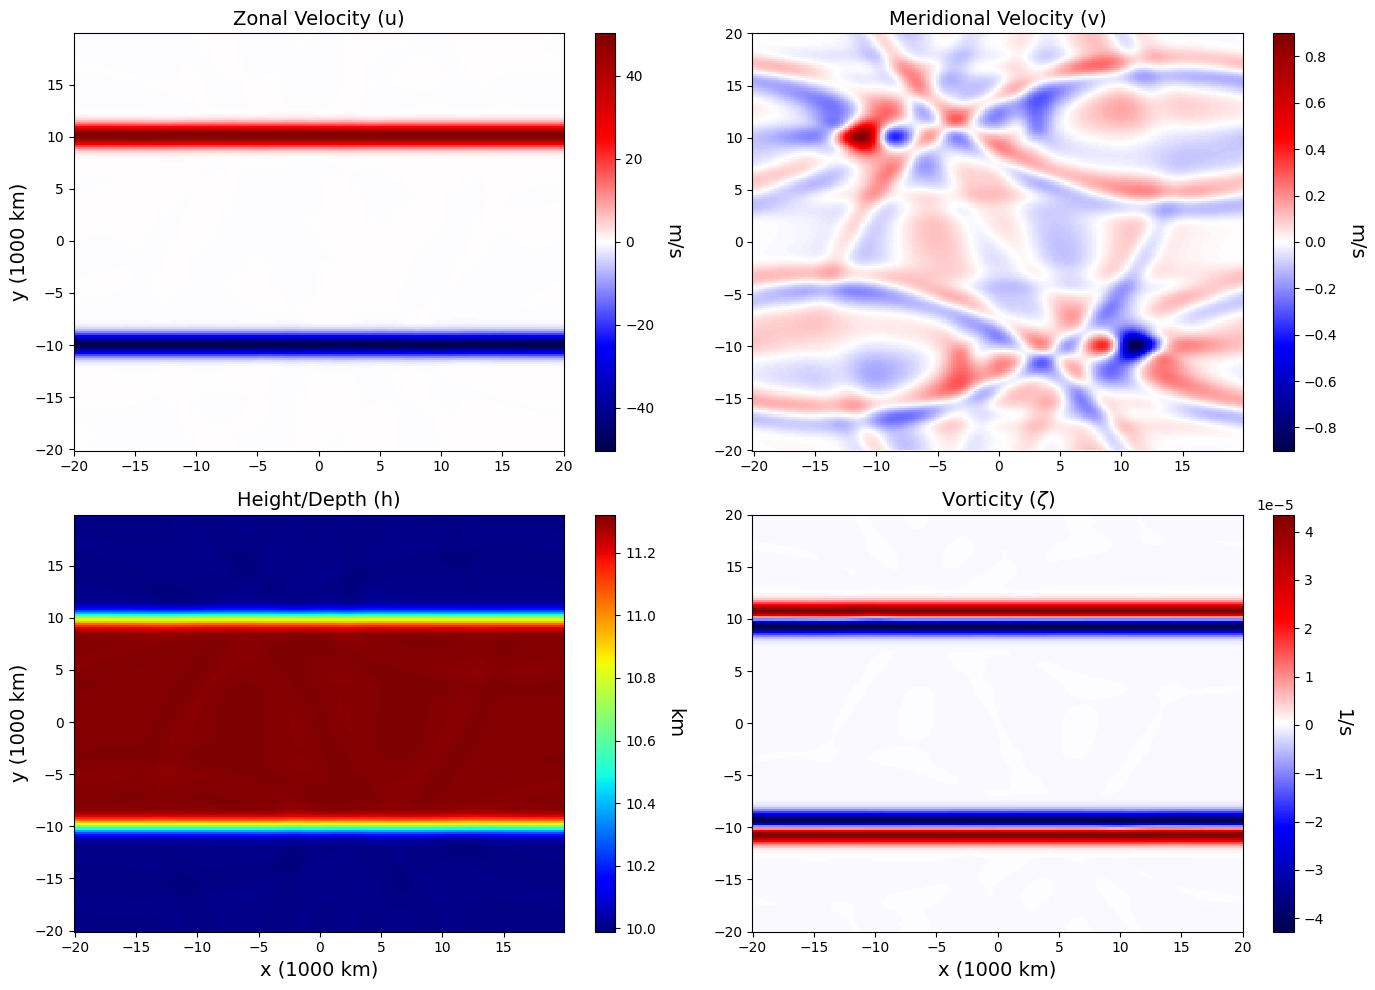

 
 Time iteration k= 480  corresponds to time =  2.0  days


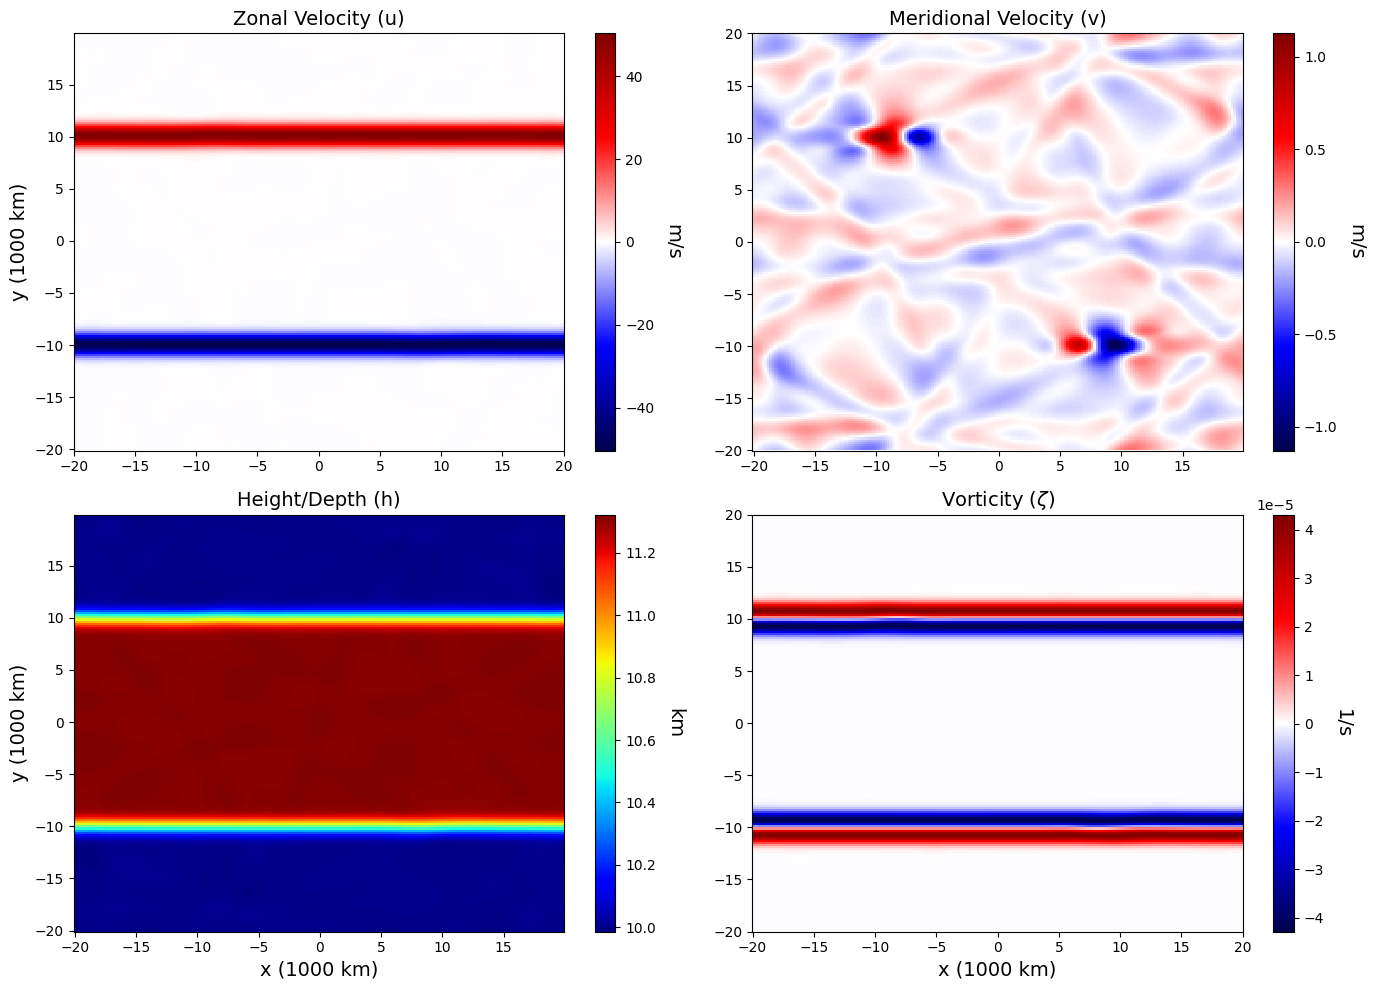

 
 Time iteration k= 720  corresponds to time =  3.0  days


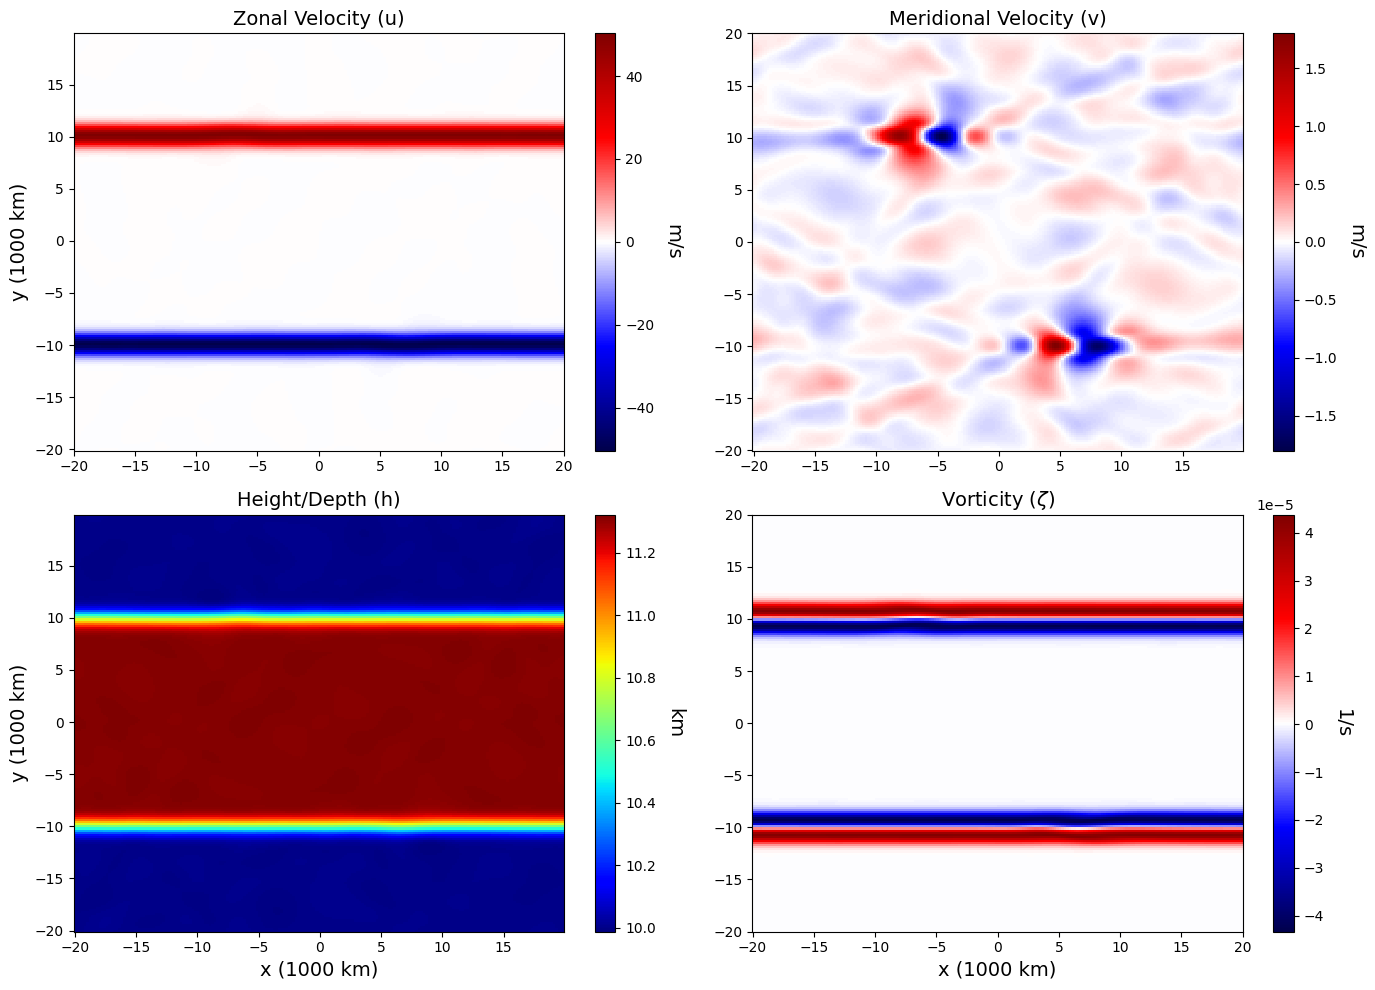

 
 Time iteration k= 960  corresponds to time =  4.0  days


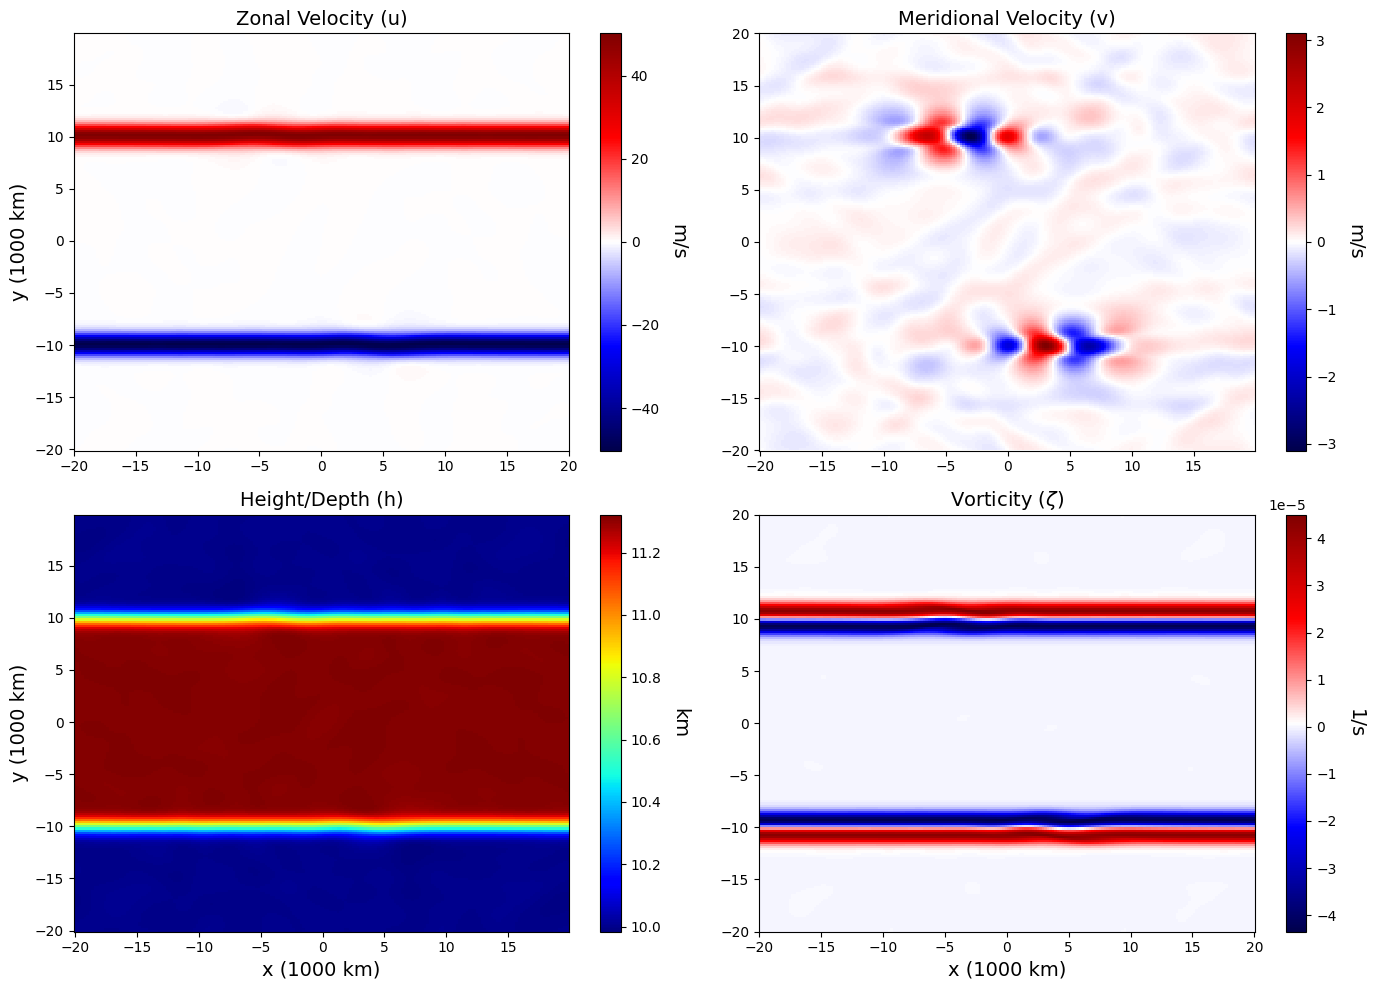

 
 Time iteration k= 1200  corresponds to time =  5.0  days


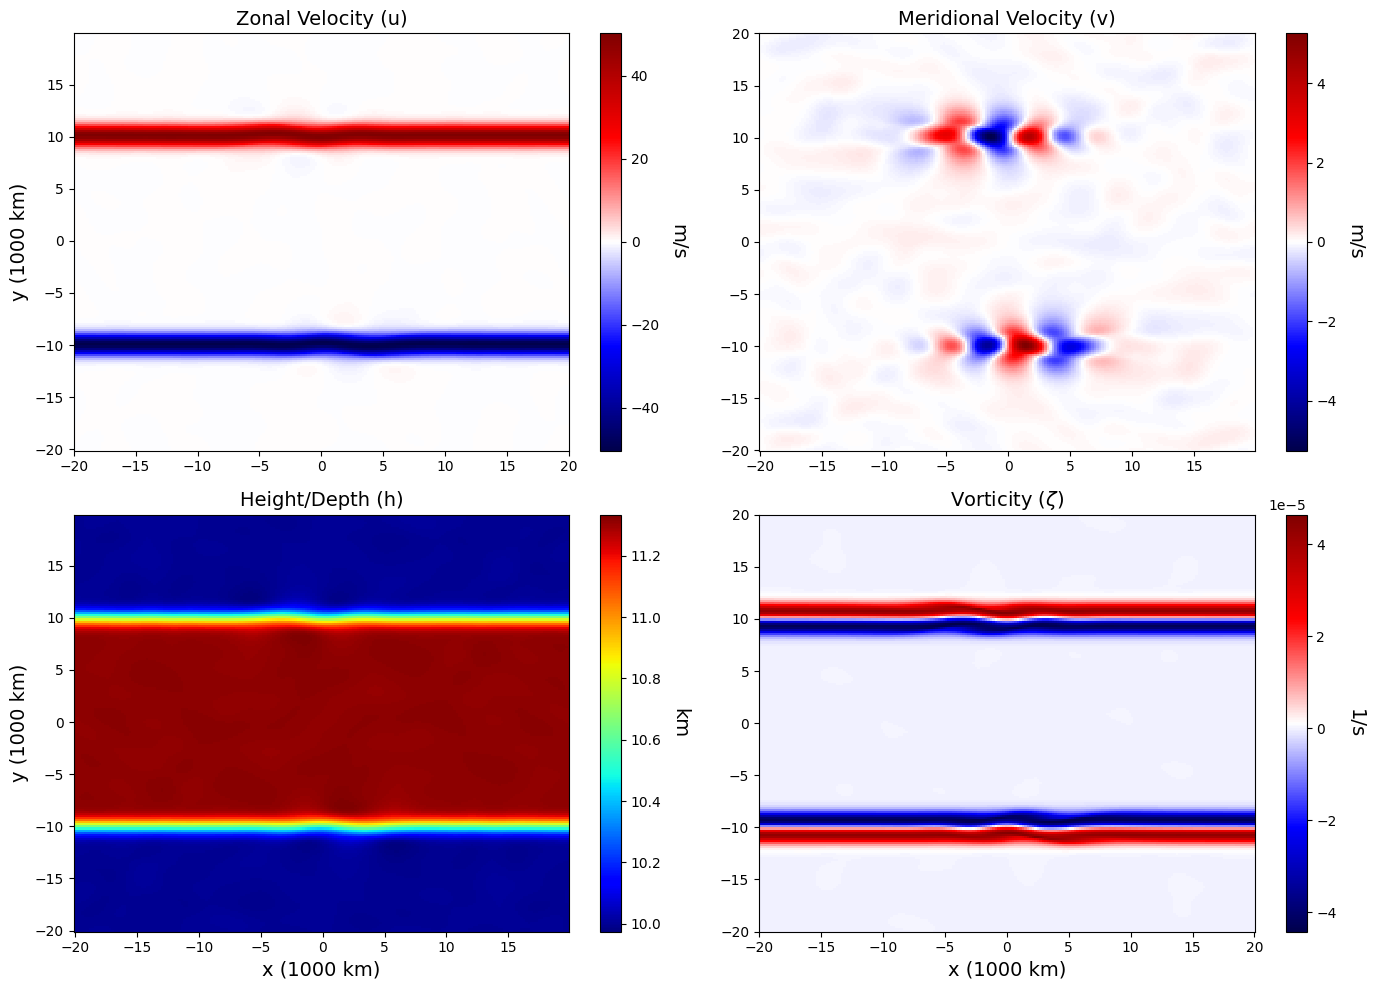

 
 Time iteration k= 1440  corresponds to time =  6.0  days


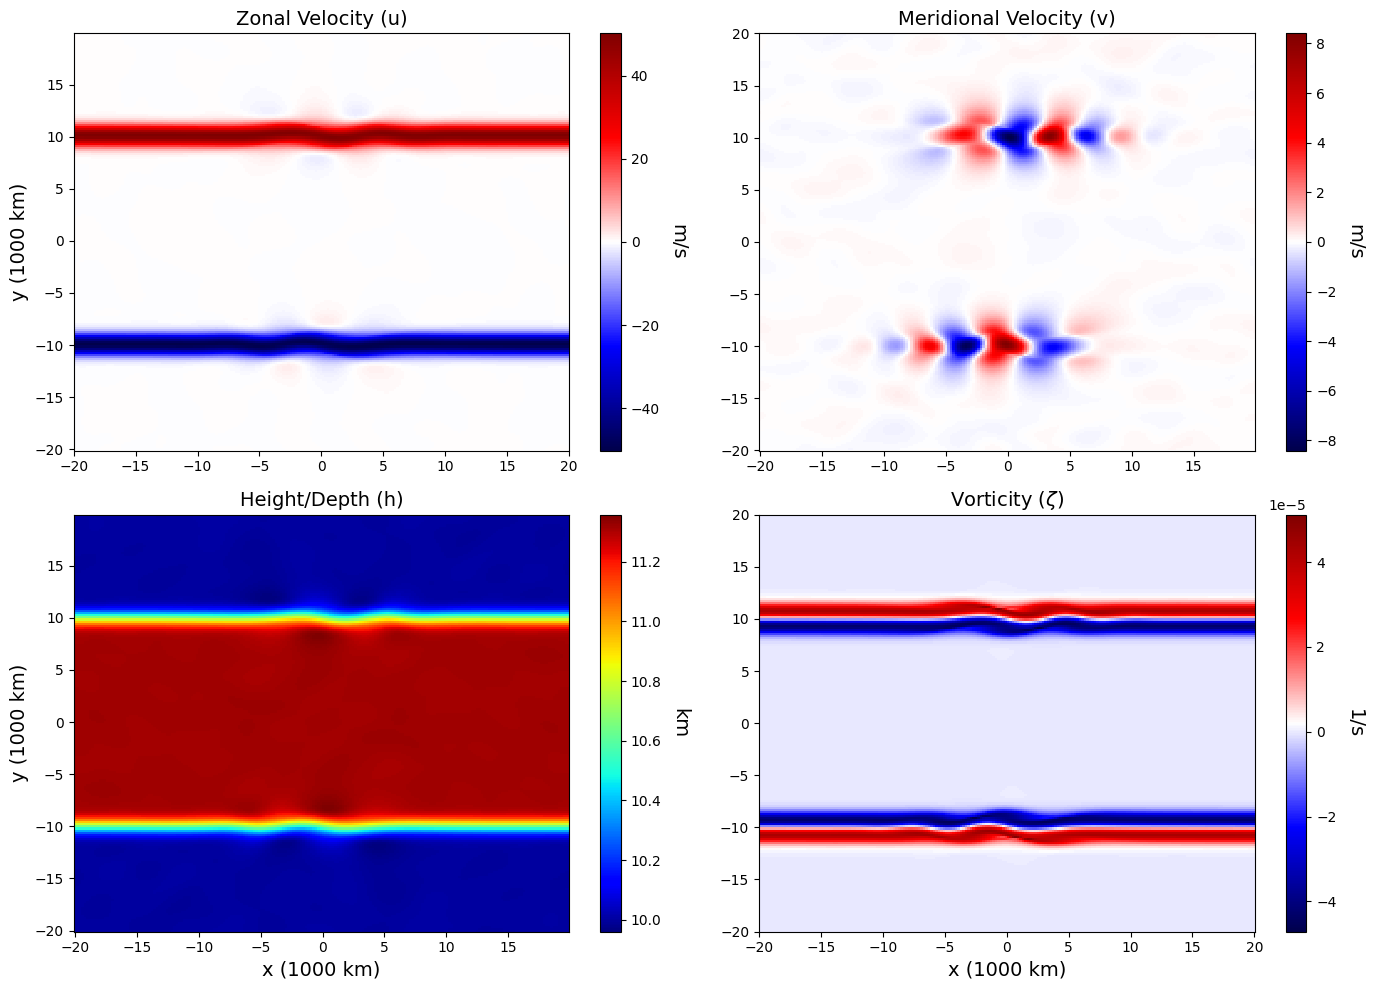

 
 Time iteration k= 1680  corresponds to time =  7.0  days


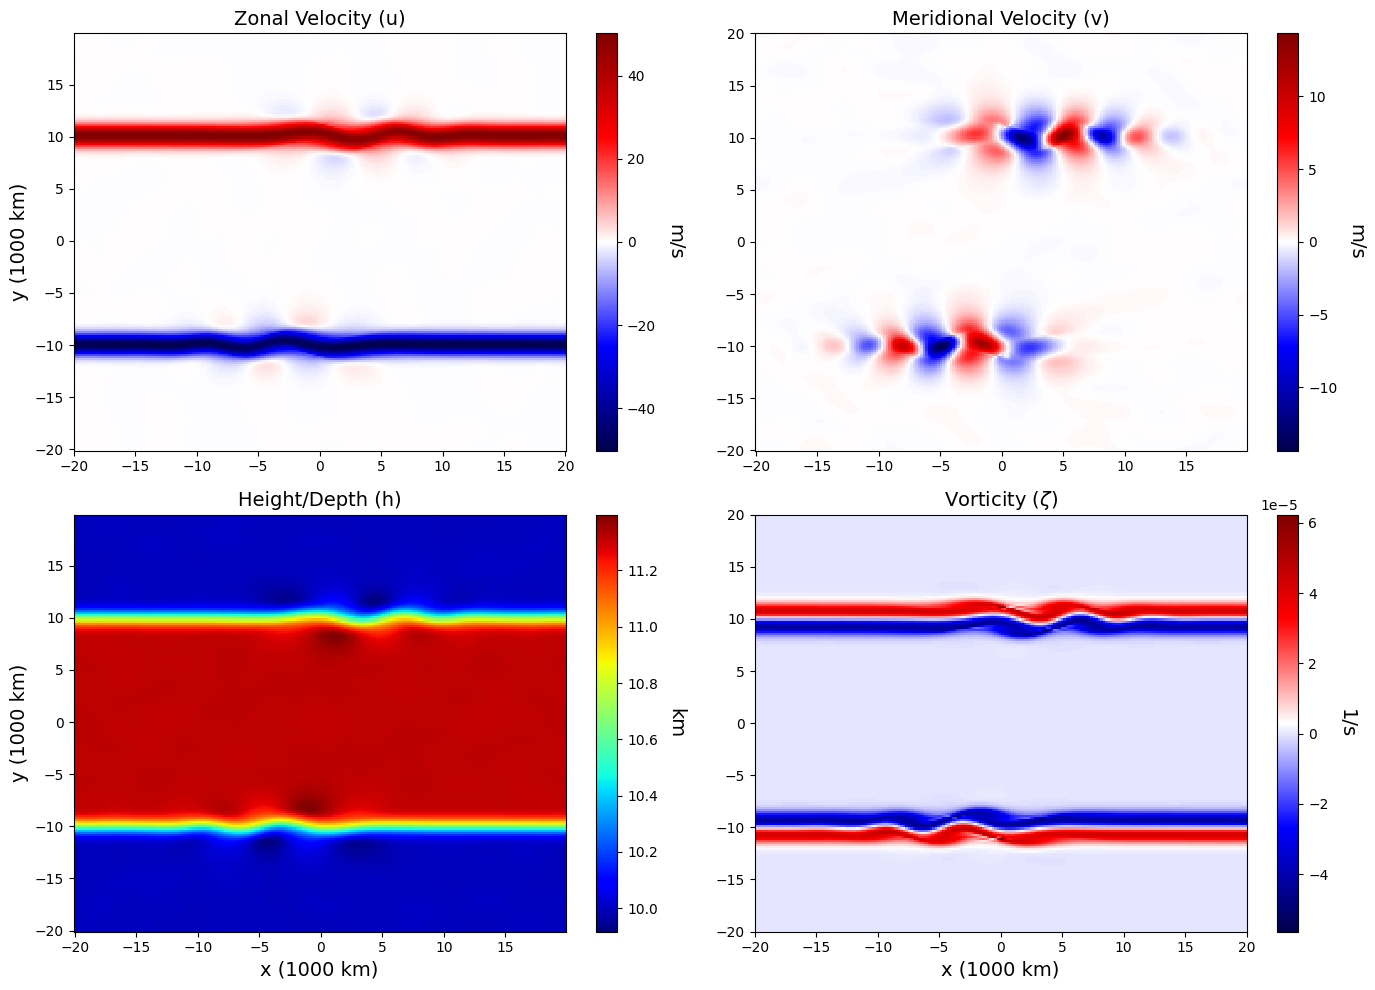

 
 Time iteration k= 1920  corresponds to time =  8.0  days


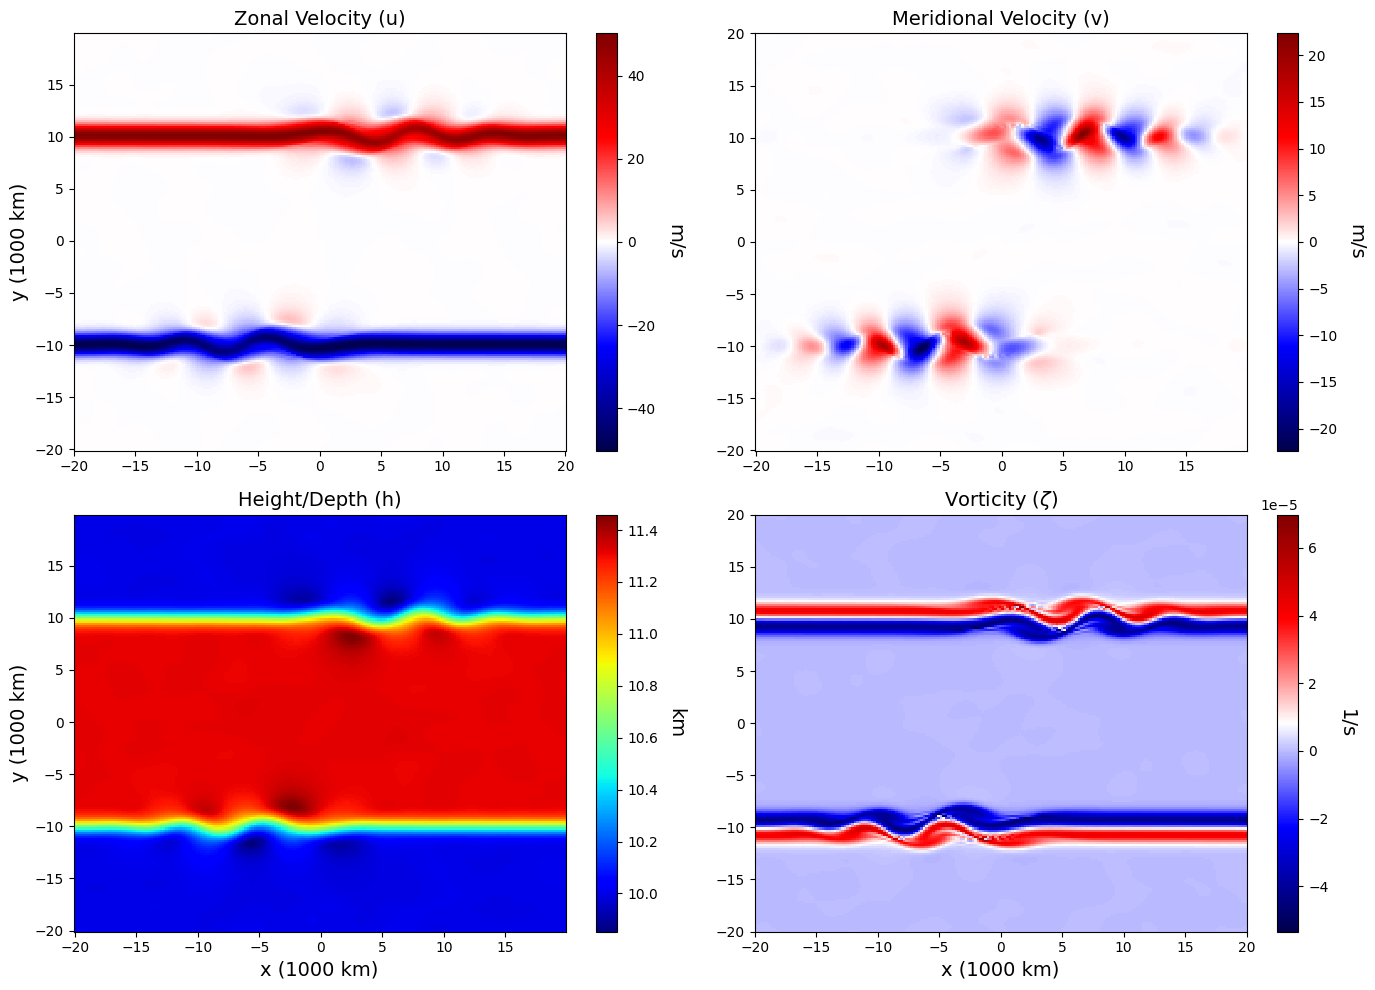

 
 Time iteration k= 2160  corresponds to time =  9.0  days


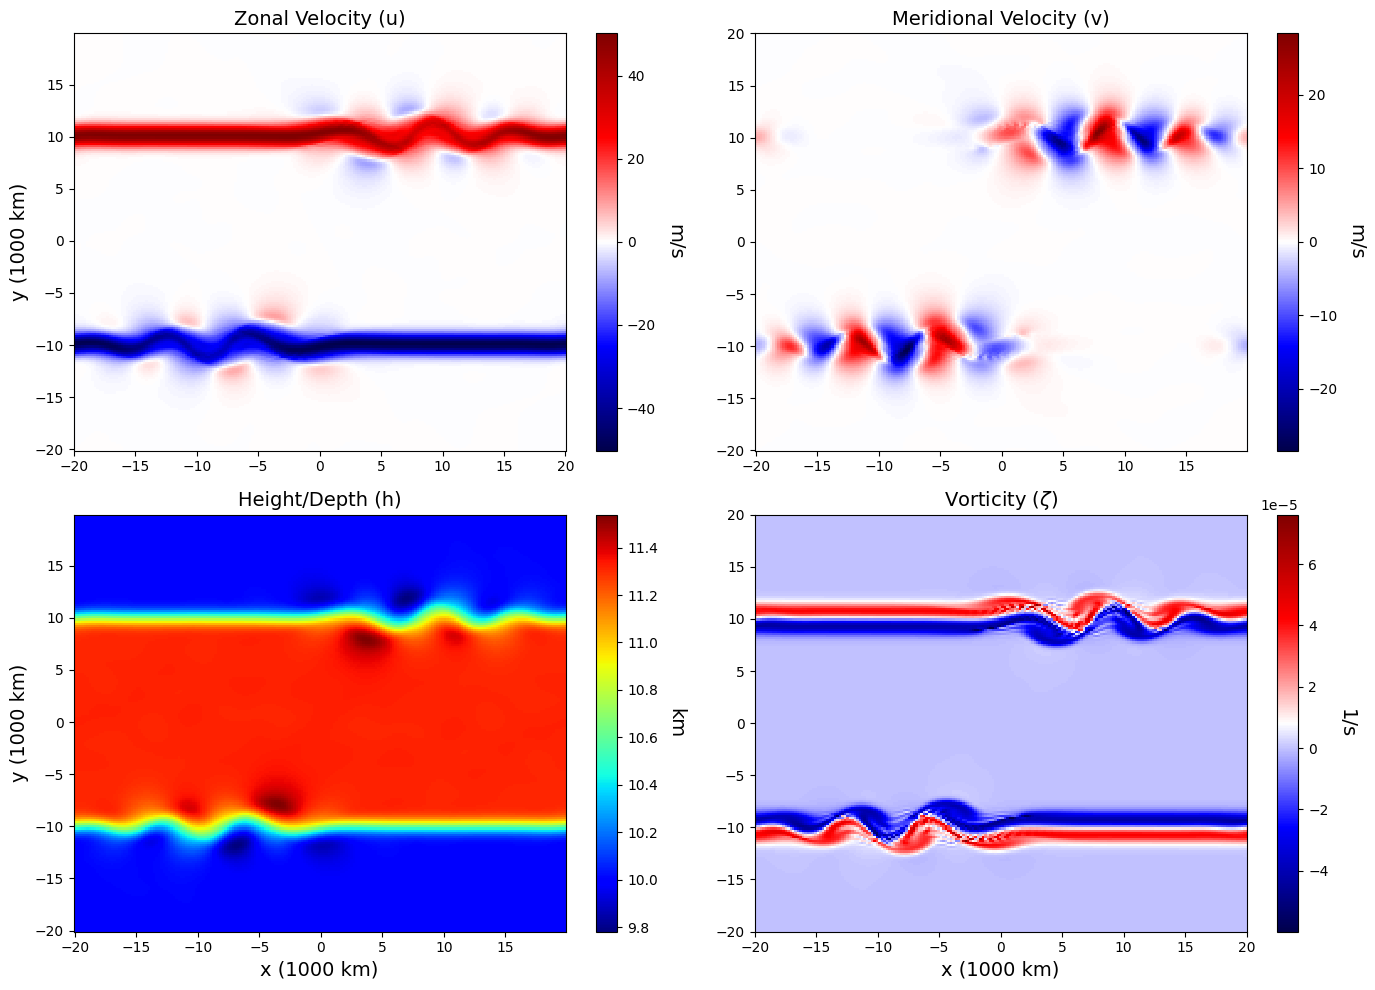

 
 Time iteration k= 2400  corresponds to time =  10.0  days


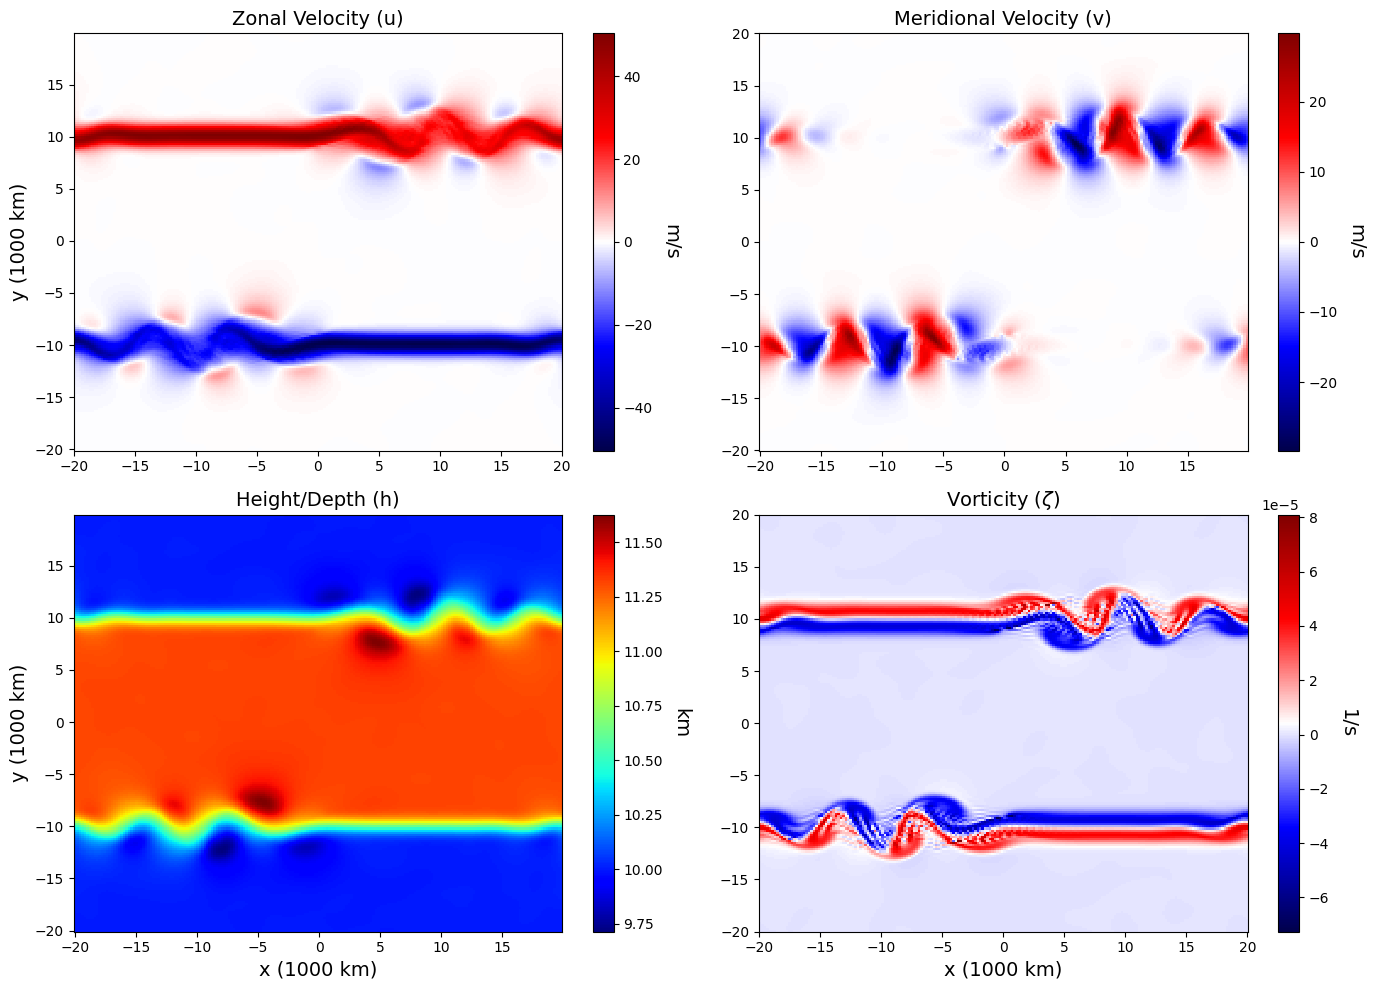

 
 Time iteration k= 2640  corresponds to time =  11.0  days


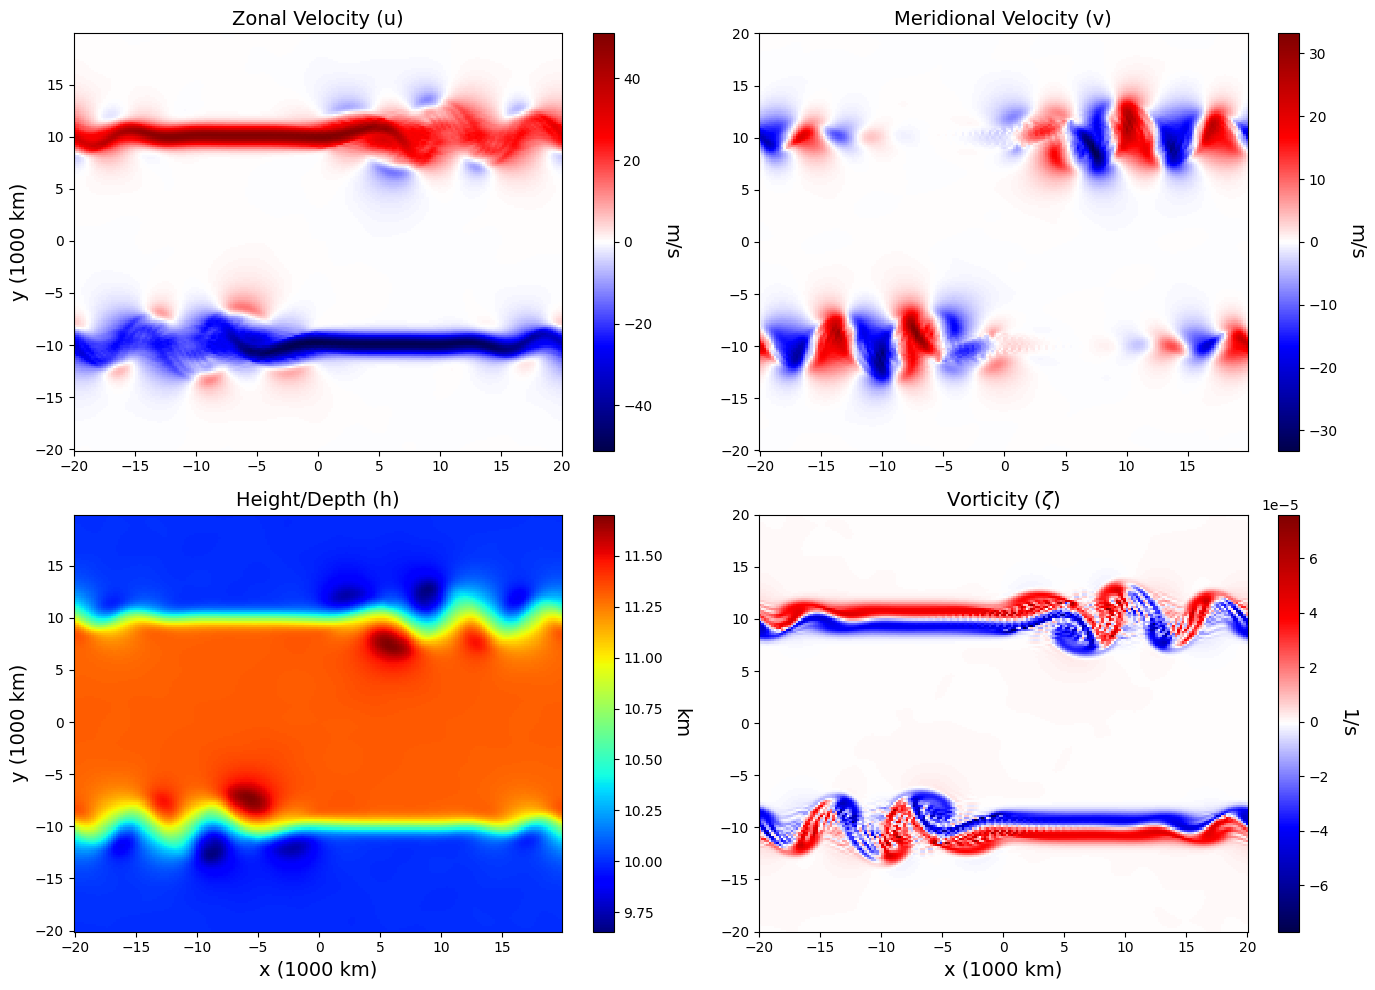

 
 Time final iteration k= 2880  corresponds to time =  12.0  days


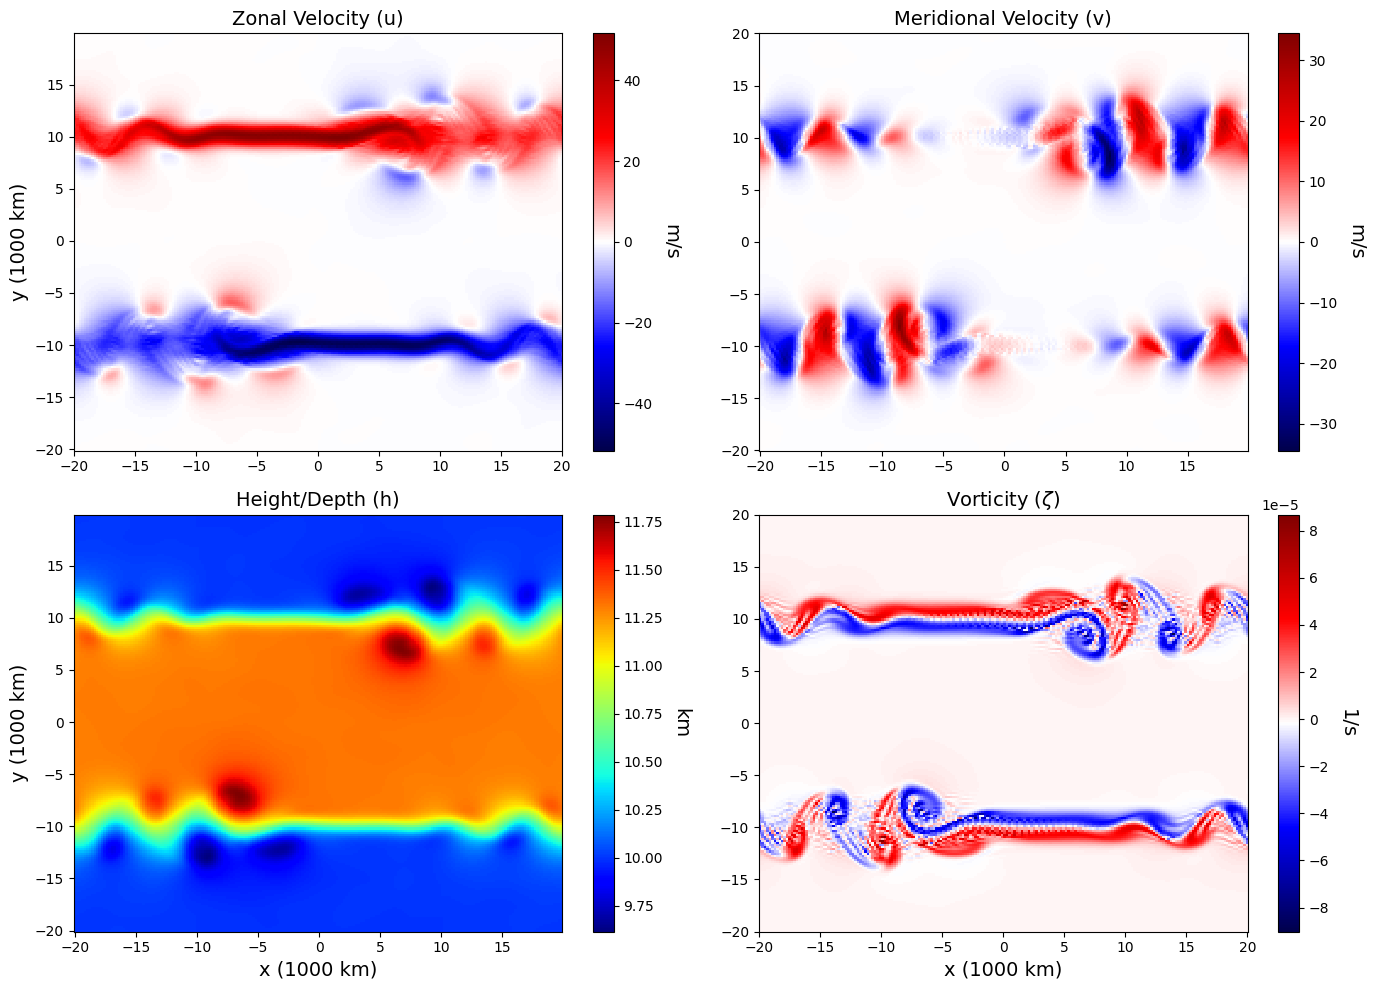

(array([[ 0.02526386,  0.04394847,  0.0627343 , ..., -0.02908646,
         -0.01132187,  0.00681398],
        [ 0.04095441,  0.05873279,  0.07698722, ..., -0.00915595,
          0.00705288,  0.02373305],
        [ 0.05684874,  0.07301628,  0.09011461, ...,  0.01304012,
          0.02706672,  0.04158735],
        ...,
        [-0.02373277, -0.00705259,  0.00915625, ..., -0.07698696,
         -0.05873253, -0.04095414],
        [-0.00681369,  0.01132216,  0.02908677, ..., -0.06273402,
         -0.04394819, -0.02526358],
        [ 0.00943422,  0.0282464 ,  0.04687644, ..., -0.04687614,
         -0.0282461 , -0.00943393]]),
 array([[-0.01756406, -0.02251528, -0.02738084, ...,  0.00180622,
         -0.00574645, -0.012105  ],
        [-0.05268287, -0.05708727, -0.06043169, ..., -0.029191  ,
         -0.03901272, -0.04677581],
        [-0.08757649, -0.09144925, -0.09333981, ..., -0.06031608,
         -0.07222168, -0.0812706 ],
        ...,
        [ 0.0875766 ,  0.0812707 ,  0.07222178, ...,  

In [ ]:
num_plots = 12
plot_ktimes = (np.arange(num_plots)/num_plots)*dom.nt
print(plot_ktimes, dom.nt)
time_int(p, plot_ktimes)


### Validação de convergência

🧩 Analise a convergência do método numérico proposto em relação a variações no passo de tempo e espaço.

Calculating dx based on given mx. dx =  800631.1178561744
Calculating dy based on given my. dy =  800631.1178561744
Domain set up:
 > f =  0.00014584
 > g =  9.80616
 > ini =  1
Gravity wave Courant number
0.3982580070298374
[0.] 15
 
 Time iteration k= 0  corresponds to time =  0.0  days


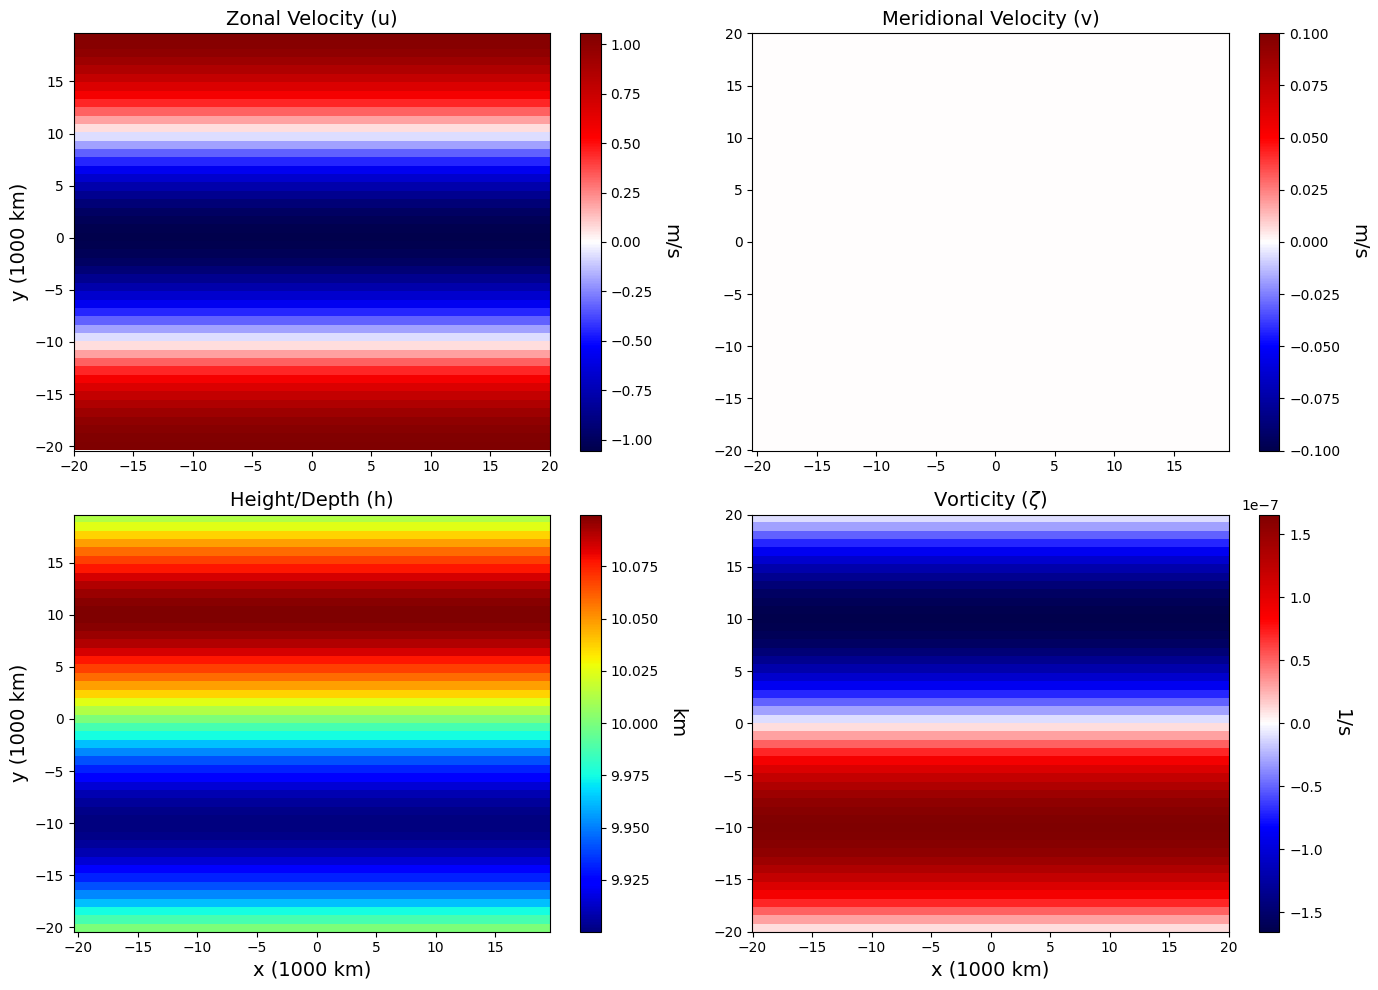

 
 Time final iteration k= 15  corresponds to time =  0.25  days


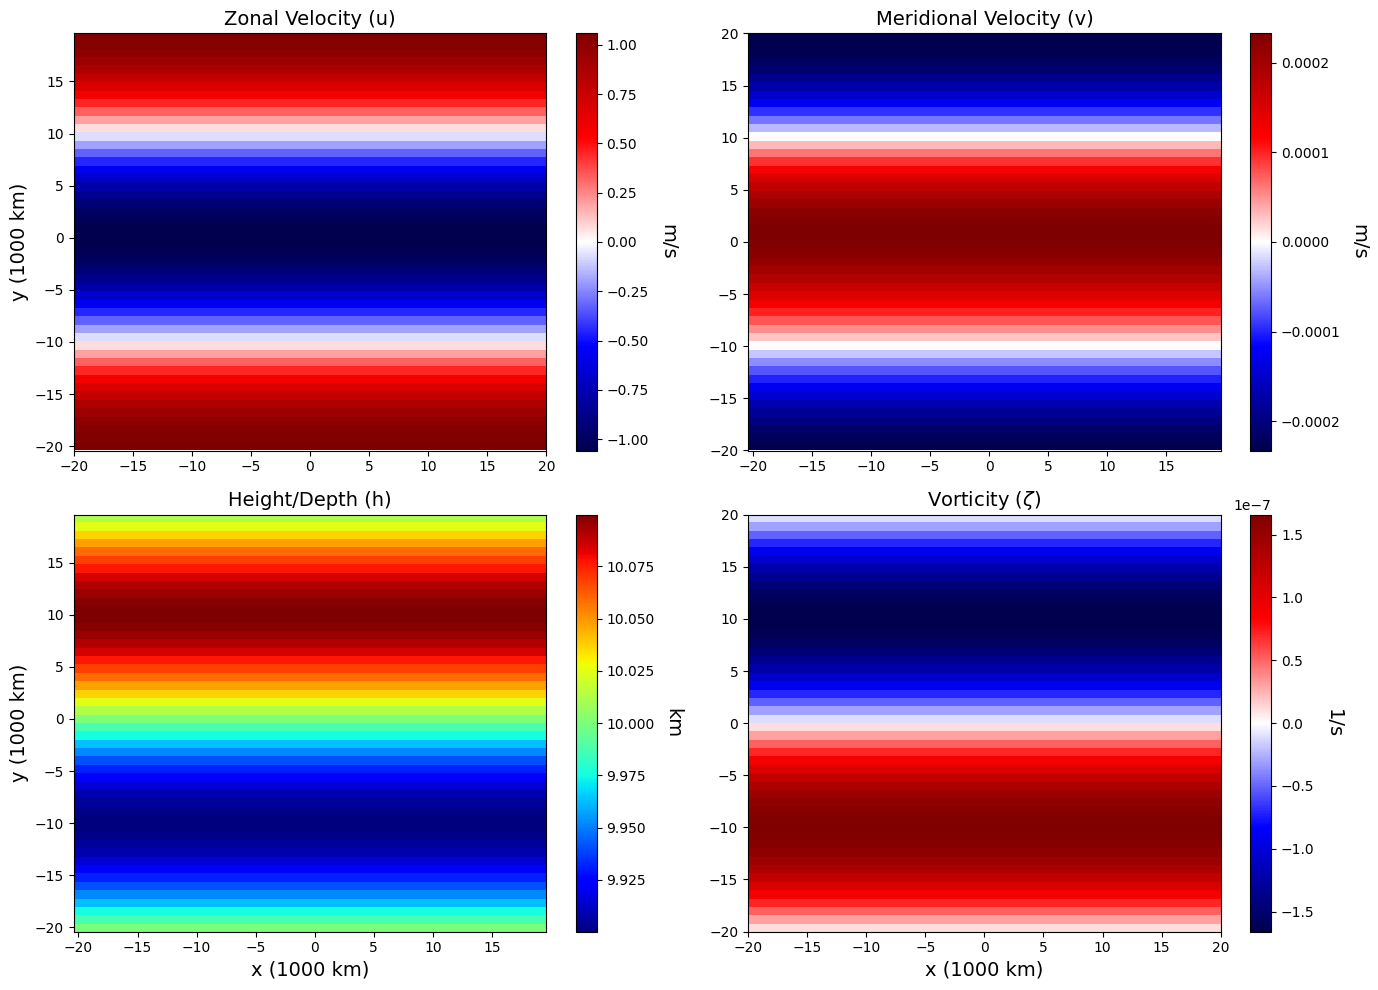

+-------------------+----------+-----------------------+------------------------+----------------------+
|      Dx (km)      | Dt (min) |         Erro u        |         Erro v         |        Erro h        |
+-------------------+----------+-----------------------+------------------------+----------------------+
| 800.6311178561743 |   24.0   | 0.0024762533272297826 | 0.00023260341577268848 | 0.027369162773538847 |
+-------------------+----------+-----------------------+------------------------+----------------------+
Calculating dx based on given mx. dx =  400315.5589280872
Calculating dy based on given my. dy =  400315.5589280872
Domain set up:
 > f =  0.00014584
 > g =  9.80616
 > ini =  1
Gravity wave Courant number
0.3982580070298374
[0.] 30
 
 Time iteration k= 0  corresponds to time =  0.0  days


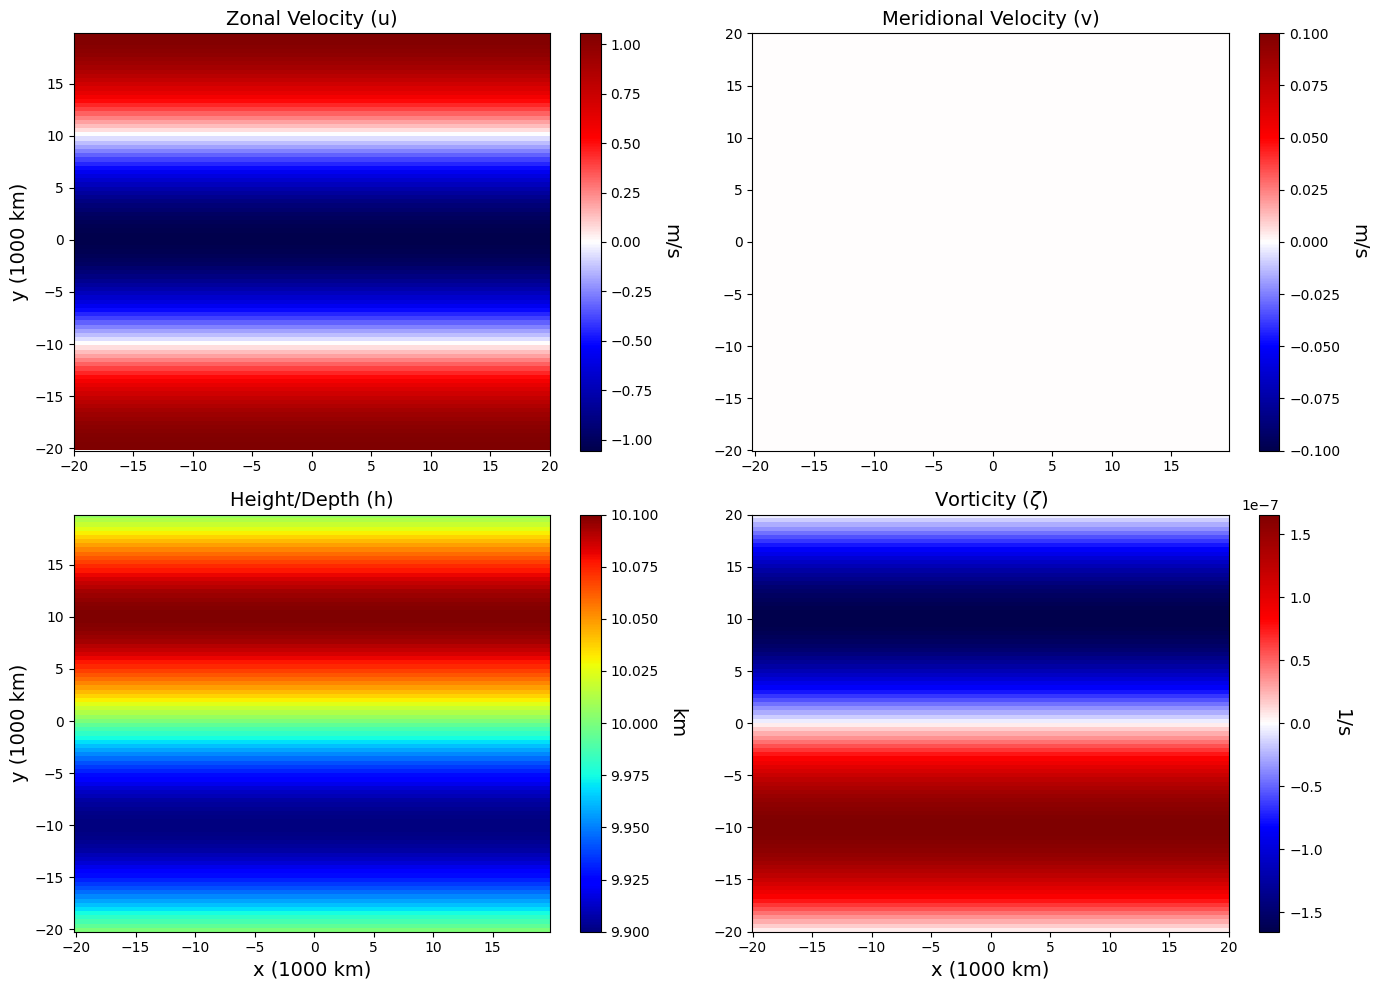

 
 Time final iteration k= 30  corresponds to time =  0.25  days


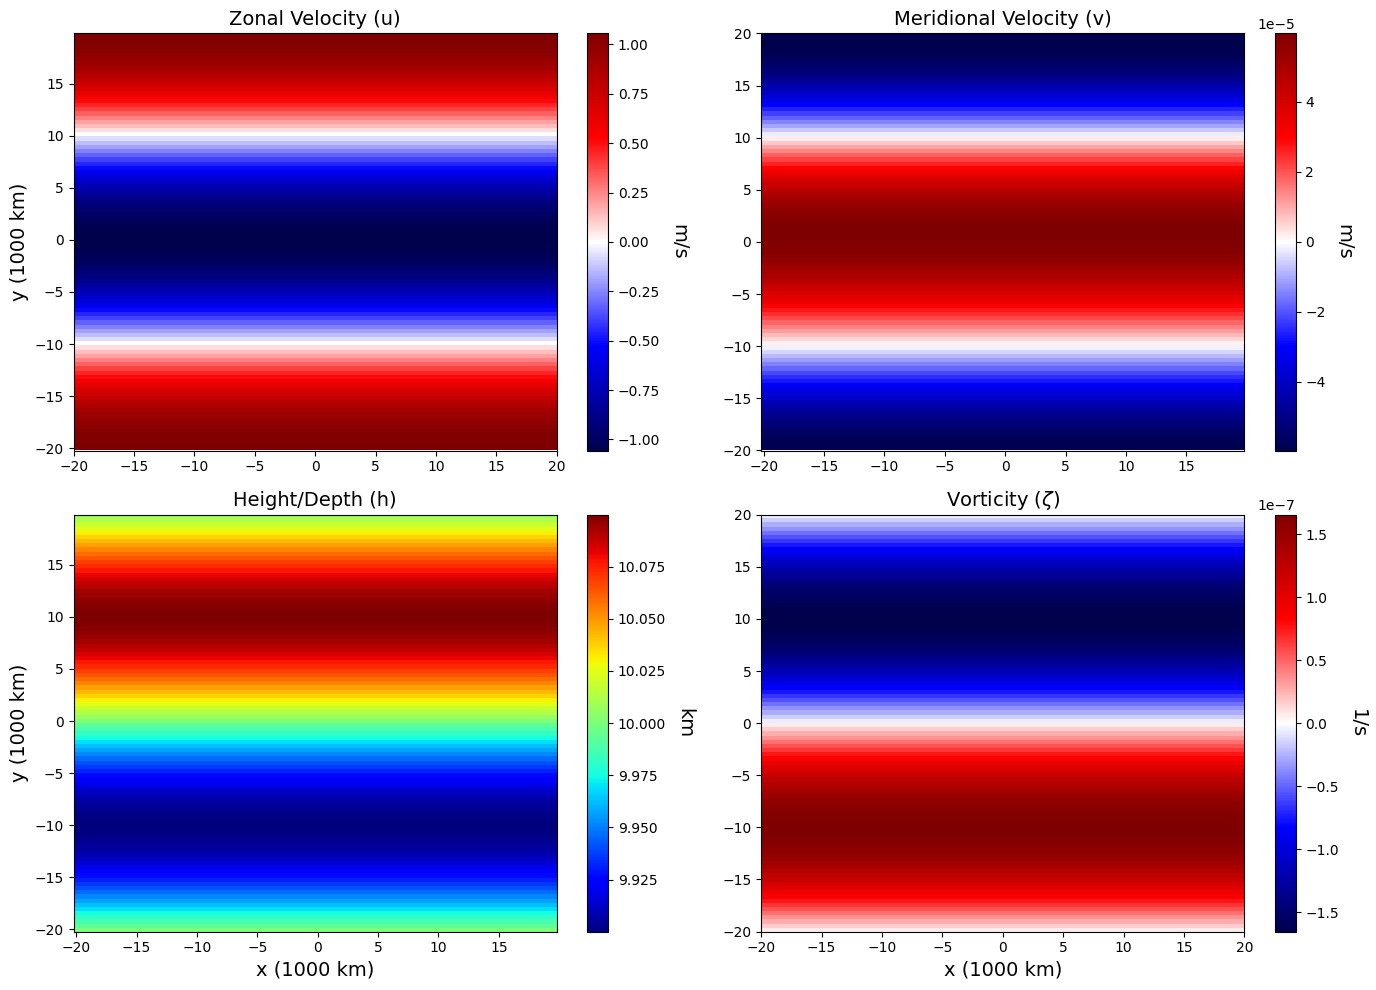

+--------------------+----------+-----------------------+------------------------+----------------------+
|      Dx (km)       | Dt (min) |         Erro u        |         Erro v         |        Erro h        |
+--------------------+----------+-----------------------+------------------------+----------------------+
| 800.6311178561743  |   24.0   | 0.0024762533272297826 | 0.00023260341577268848 | 0.027369162773538847 |
| 400.31555892808717 |   12.0   | 0.0006186079075474193 | 5.962384189977989e-05  | 0.006843835762992967 |
+--------------------+----------+-----------------------+------------------------+----------------------+
Calculating dx based on given mx. dx =  200157.7794640436
Calculating dy based on given my. dy =  200157.7794640436
Domain set up:
 > f =  0.00014584
 > g =  9.80616
 > ini =  1
Gravity wave Courant number
0.3982580070298374
[0.] 60
 
 Time iteration k= 0  corresponds to time =  0.0  days


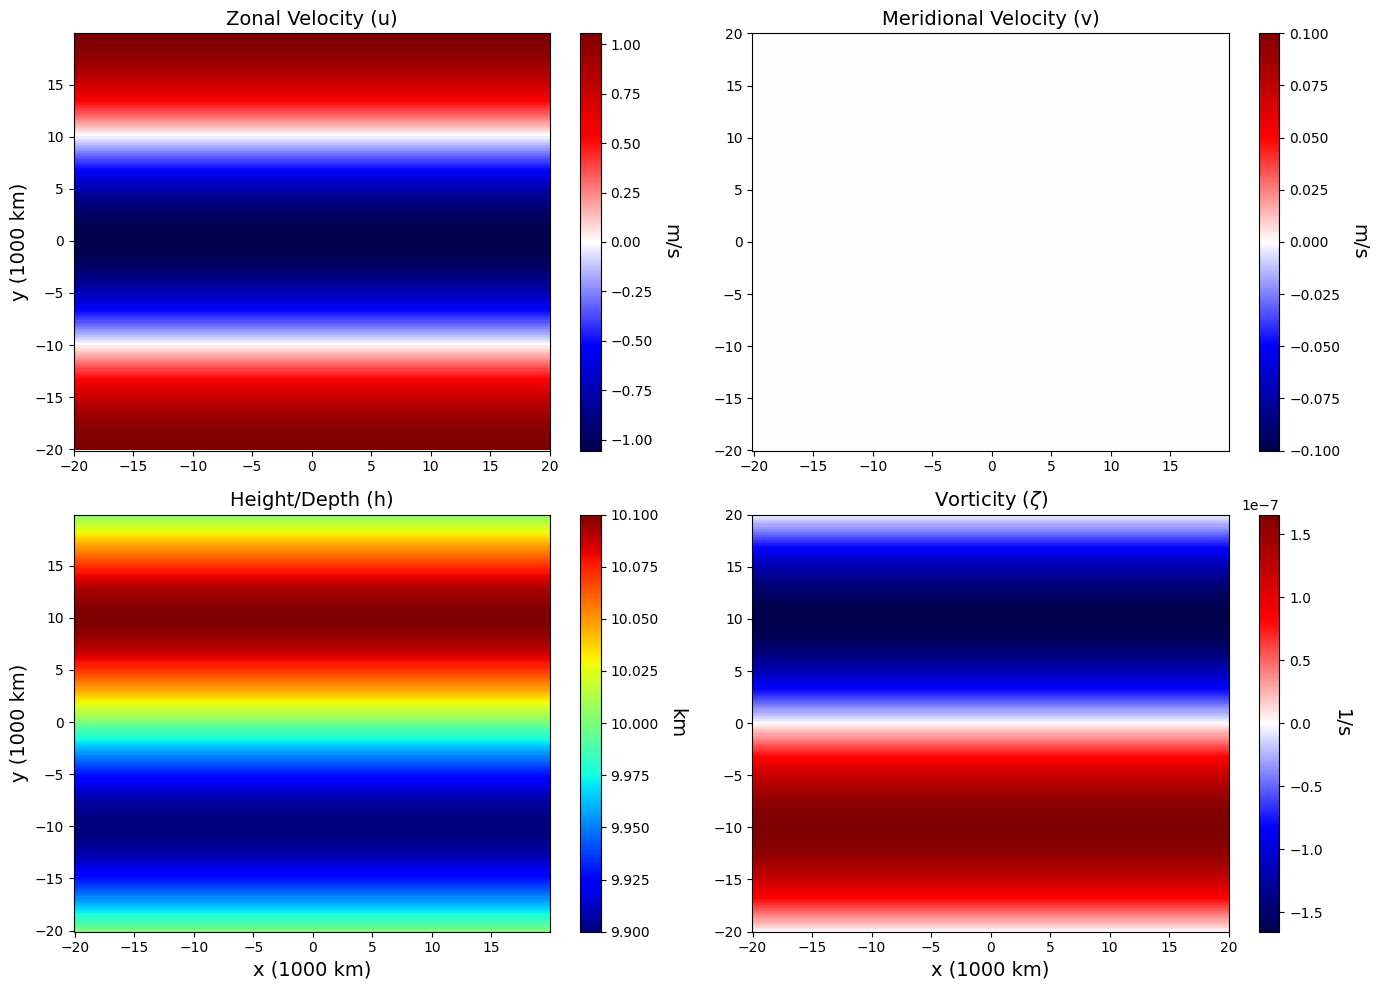

 
 Time final iteration k= 60  corresponds to time =  0.25  days


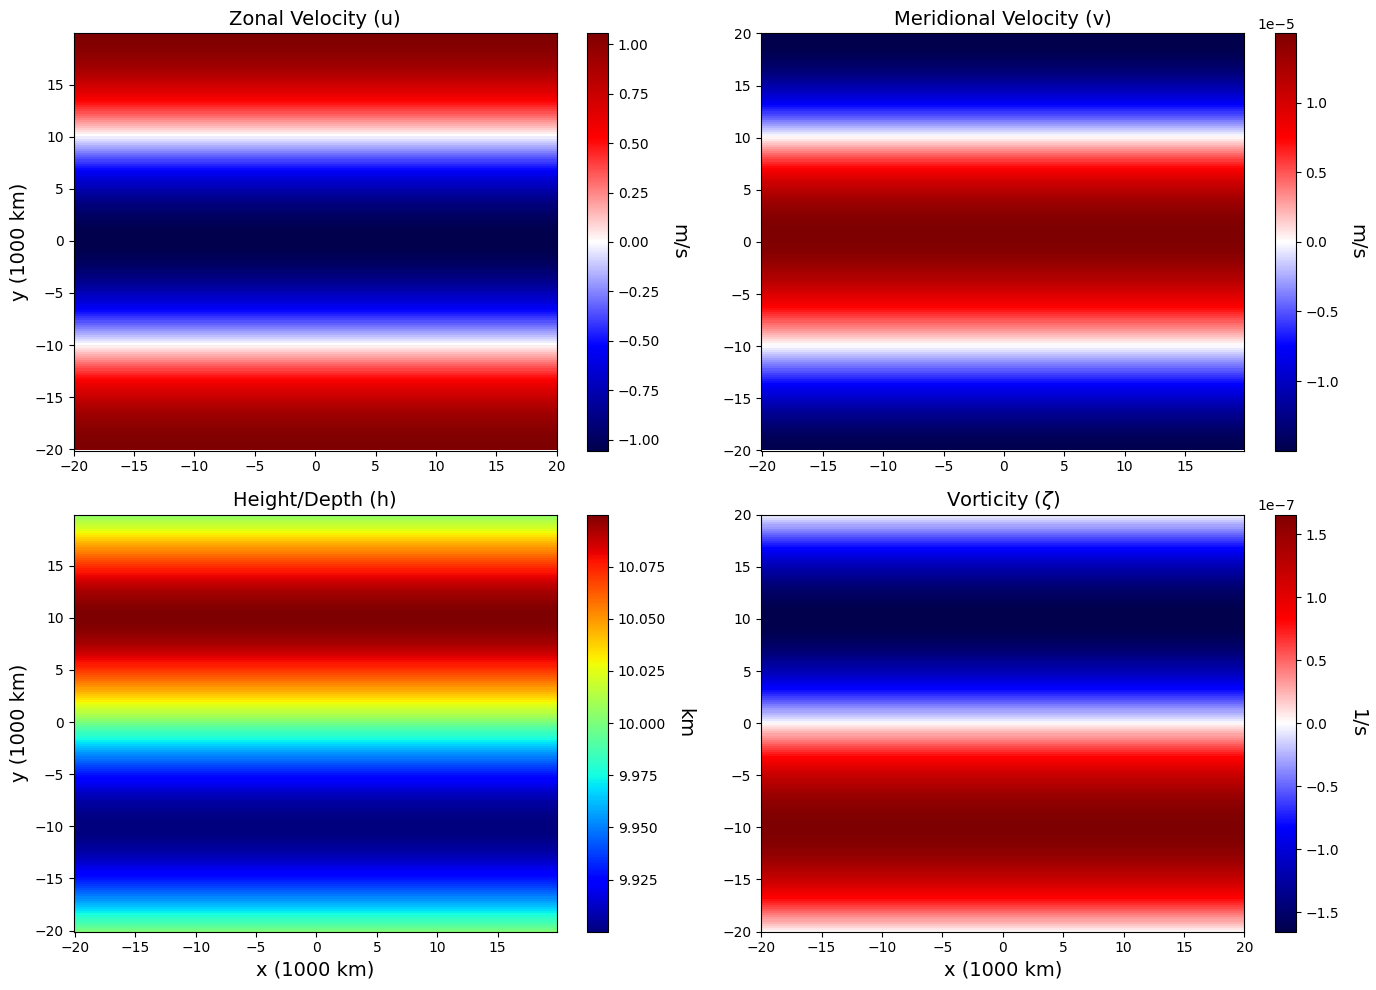

+--------------------+----------+-----------------------+------------------------+----------------------+
|      Dx (km)       | Dt (min) |         Erro u        |         Erro v         |        Erro h        |
+--------------------+----------+-----------------------+------------------------+----------------------+
| 800.6311178561743  |   24.0   | 0.0024762533272297826 | 0.00023260341577268848 | 0.027369162773538847 |
| 400.31555892808717 |   12.0   | 0.0006186079075474193 | 5.962384189977989e-05  | 0.006843835762992967 |
| 200.15777946404359 |   6.0    | 0.0001546145740665139 | 1.4996913162162616e-05 | 0.001709996487988974 |
+--------------------+----------+-----------------------+------------------------+----------------------+
Calculating dx based on given mx. dx =  100078.8897320218
Calculating dy based on given my. dy =  100078.8897320218
Domain set up:
 > f =  0.00014584
 > g =  9.80616
 > ini =  1
Gravity wave Courant number
0.3982580070298374
[0.] 120
 
 Time iteration k= 0  

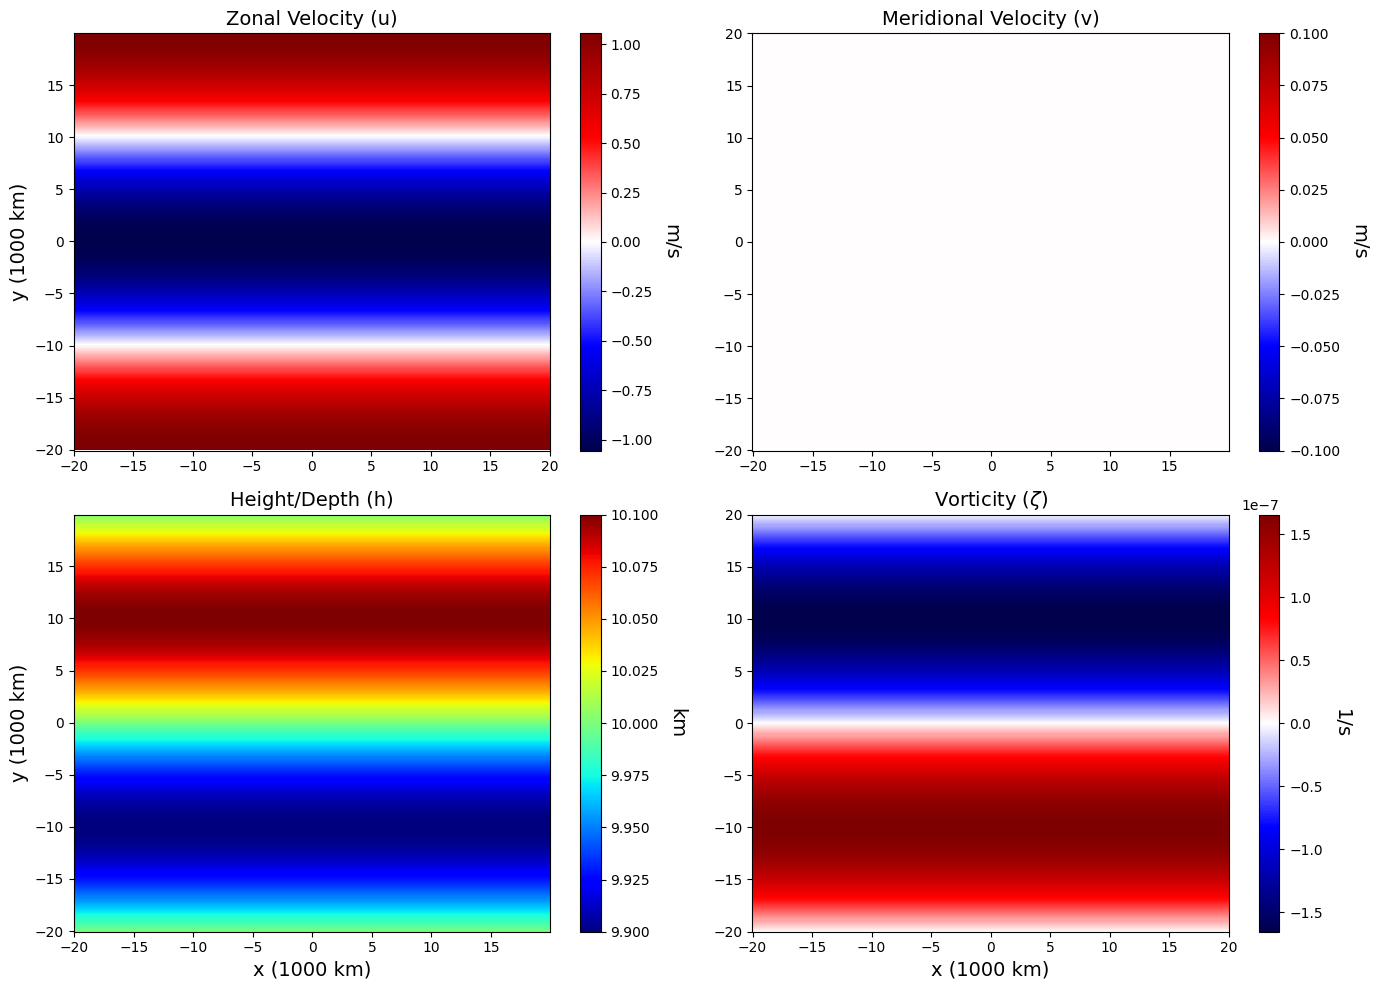

 
 Time final iteration k= 120  corresponds to time =  0.25  days


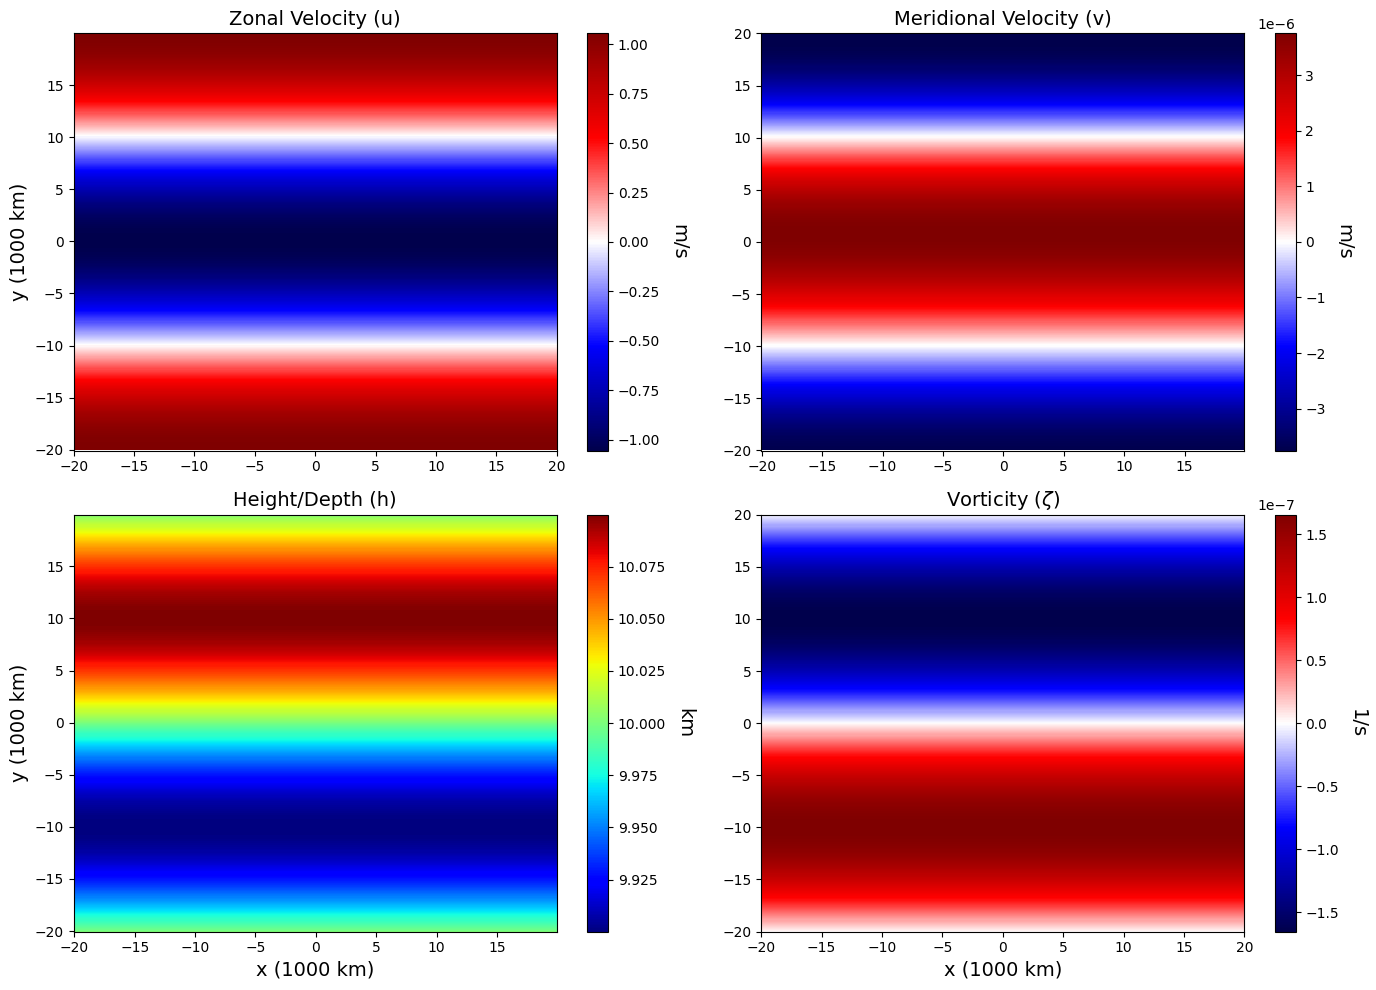

+--------------------+----------+-----------------------+------------------------+------------------------+
|      Dx (km)       | Dt (min) |         Erro u        |         Erro v         |         Erro h         |
+--------------------+----------+-----------------------+------------------------+------------------------+
| 800.6311178561743  |   24.0   | 0.0024762533272297826 | 0.00023260341577268848 |  0.027369162773538847  |
| 400.31555892808717 |   12.0   | 0.0006186079075474193 | 5.962384189977989e-05  |  0.006843835762992967  |
| 200.15777946404359 |   6.0    | 0.0001546145740665139 | 1.4996913162162616e-05 |  0.001709996487988974  |
| 100.07888973202179 |   3.0    | 3.865492242205448e-05 | 3.7548607335219104e-06 | 0.00042743443373183254 |
+--------------------+----------+-----------------------+------------------------+------------------------+


In [ ]:

m_list = [50, 100, 200, 400]
dt_list = [1440., 720., 360., 180.]
tab = PrettyTable(["Dx (km)", "Dt (min)",  "Erro u", "Erro v", "Erro h"])

for i in range(len(m_list)):
  m = m_list[i]
  dt = dt_list[i]
  # Discrete domain construction
  dom = Domain2D(t0=0.0, T=oneday/4, xi=-np.pi*erad, xf=np.pi*erad, yi=-np.pi*erad, yf=np.pi*erad, dt=dt, mx=m, my=m)
  dx = dom.dx

  # Shallow water 2D problem
  sw  = SWE_2D(hbar = 10000.0, f = 2.0*omega, g = grav, ini = 1, dom = dom)

  # Numerical method and operators
  p  = SWE_2D_num_method(dom = dom, sw = sw, equation = "swe")

  num_plots = 1
  plot_ktimes = (np.arange(num_plots)/num_plots)*dom.nt
  print(plot_ktimes, dom.nt)
  u, v, h = time_int(p, plot_ktimes)
  er_u = np.max(np.abs(u-sw.u0()))
  er_v = np.max(np.abs(v-sw.v0()))
  er_h = np.max(np.abs(h-sw.h0()))
  tab.add_row([dx/1000, dt/60, er_u, er_v, er_h ])
  print(tab)



---



## ❗Exercício ❗

Energia Total Numérica:
$$
E(t) = \frac{1}{2}\sum_{i}\sum_{j} \left(h (\overline{u^2}^x+\overline{v^2}^y)+gh^2\right)
$$

1. Verifique a evolução da energia total do modelo, fazendo um gráfico da evolução da energia para o caso do jato instável.
2. 🧩 Faça dowload do notebook para a sua máquina e experimente rodar o caso do jato instável com uma resolução espacial e temporal maior.



👉 Dica: Para facilitar a atividade, modifique o código da integração temporal para incluir cálulos de variáveis diagnósticas. No caso desta atividade, inclua no loop temporal o cálculo da energia. Mas note que já existe um operador discreto implementado para Energia Total que você pode aproveitar.



---



Resposta: